In [1]:
import konlpy

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import re
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 데이터 확인

In [3]:
import csv
f = open('r1_file.csv','r', encoding = 'UTF-8-sig')
rdr = csv.reader(f)
for line in rdr:
    print(line)
f.close()

['0', '말투 깬다', '1']
['1', '요즘 연앤들 싫은소린 아에 차단하고 듣기좋은소리만 들으려하는듯. 조금만 비판해도 악플러 법적대응이라니 돈써서 본인들이 위라는행동 참 ㅋ 오래가겠다', '1']
['2', '저 짧은 몇 마디에서 인성이 보이넴 ..', '1']
['3', '개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ', '1']
['4', '정신분열 잼 ㅋㅋㅋ', '1']
['5', '실력에비해 오래갔다', '1']
['6', '거만이 하늘을 찌르네. 뭔짓을 하든 묻지도 따지지도 말고 찬양만 하고 돈이나 바쳐라 이건가?', '1']
['7', '점점... 왜저러냐 리더라는게 맨날 표정관리 못하고 기분에 따라 행동하고말하는거 진짜 별로다', '1']
['8', '말하는거 저급해...', '1']
['9', '말투가 왜저래ㅋㅋ', '1']
['10', '아무리 그래도 그렇지 말투가 저게 뭐냐;', '1']
['11', '왜저래 비꼰데?? 힘들면 그냥 조용히 탈퇴하세요~ 요즘 보면 얼굴도 어둡고 기분대로 행동하고 표정 다 드러내더만 이제 내리막길 ..다들 얼굴에 생기가 없고 초심도 잃은거 같고 ..배부르지?? 그만하고 쉬어라 다들 ..팬 많지? 금방 썰물처럼 다 휩쓸려간다 ~너희 아무것도 아니다~ 배부른 소리하고 자빠졌네 ~비호감이네 진짜', '1']
['12', '아무리봐도 잘못 뽑은 것 같다', '1']
['13', '인기있을때 높은곳에 있을 때 말을 좀 조심할 필요가 있을 거 같네요 표현이 참;;;', '1']
['14', '인기도 좋고 다 좋은데 말투가 왜 그래요 어린 팬들도 많은 사람이', '1']
['15', '진짜 예민하네;', '1']
['16', '와...좀 깨긴 깬다 스트레스여서 그럴 수도 있는데 그래도 라이브 동영상에서 저런 말을 했다는게....당신이 그 자리에 앉아있는 것도 그런 관심 때문인 것을....ㅉㅉ', '1']
['17', '윽..진짜 말투 이런다고???', '1']
['18', '말 더럽게 싸

['8', '존경합니다', '0']
['9', '겸손과 배려가 넘치는 인성갑', '0']
['10', '그 누가 세게 흔들어도 우린 널 절대 놓지 않을꺼야.', '0']
['11', '사랑해 좋은것만 보고가자', '0']
['12', '귀여우면서도 어느새 어른스럽고 한거 너무너무 기특하고 사랑해', '0']
['13', '잘난척도 나대지도 않는 뼛속까지 진국인 사람', '0']
['14', '천사같은 사람', '0']
['15', '어떻게 이런 사람이 우리 곁에 왔을까', '0']
['16', '사랑스러운 사람 ', '0']
['17', '언제나 뒤에서 응원할게', '0']
['18', '사랑하고 또 사랑해', '0']
['19', '얼굴도 너무너무 멋지고 인성도 너무너무 멋져 몸도 너무너무 좋아', '0']
['20', '너무너무 멋져', '0']
['21', '너무 너무 사랑해', '0']
['22', '고생했다', '0']
['23', '기사 읽는데 눈물이 ㅠㅠ ', '0']
['24', '존재만으로 제 세상을 밝게 비춰요 ', '0']
['25', '너의 따뜻한 마음 모두가 알아, 선하고 부드러운 마음의 소유자, 다재다능 르네상스맨, 늘 응원할게,', '0']
['26', '사랑해', '0']
['27', '월드 슈스가 정말 저렇게 소탈하고 겸손하고 꾸밈없는지 믿기지 않을 정도', '0']
['28', '좋은 청년', '0']
['29', '사람됨이 되어있네', '0']
['30', '요즘 보기 드문 건실한 사람이구나', '0']
['31', '다정함과 배려가 몸에 배었네', '0']
['32', '사랑해 좋은것만 보고가자??', '0']
['33', '모든게 다 부러운 사람...', '0']
['34', '이런 사람들이 티비에 많이 나왔으면 좋겠어요', '0']
['35', '얼짱같아요><>< 보기 ', '0']
['36', '훈훈해요', '0']
['37', '얼마나 천사같은지...', '0']
['38', '실력과 인성으론 절대 까내릴수없지', '

['359', '평생 연예계 겉절이로 살다가 쓰레기이슈로 주목좀 받으니 스타된 기분인듯. 옛다 관심.', '1']
['360', '와아~  진짜  이런  사람이었구나소름돋는다  미친거  같아.', '1']
['361', '정신과 치료가 시급하다', '1']
['362', '싸이코 느낌....', '1']
['363', '진짜 불편하다. 저런얼굴 눈빛보는거', '1']
['364', '이야...얘 소름돋는다....', '1']
['365', '살짝 정신이...ㅠㅜ', '1']
['366', '나만 무섭냐?', '1']
['367', '정신병같아.....이런 사람인줄 몰랐다...', '1']
['368', '정신과 의사  님들 도와줘요', '1']
['369', '또라이', '1']
['370', '무서워', '1']
['371', '이젠 그냥 정상적이지 않다는 생각이든다..', '1']
['372', '진짜 누가 병원좀....', '1']
['373', '잘나가던 시절엔 참 인형처럼 예뻐보였는데.. 이번사건으로 사진보면 섬뜩; 소름끼쳐.. 무서운 사람인거같아. 보면 볼수록', '1']
['374', '분명 순한 얼굴인데 어딘가 표독스러워보이는 이유좀', '1']
['375', '정신 놓은거 같아...', '1']
['376', '제발 병원 좀 가라', '1']
['377', '나  병있다 홍보중  ~~  연예인은  이런것도 홍보하는구나   헐  ~~~   가족들은 뭐하나 저렇게  병있다고  홍보하는데  병원에 넣어주지   ㅉㅉ', '1']
['378', '정신적으로 치료를 좀 받으시길 안타깝네요 ㅠ 정말 이런 모습 놀라울따름이네요', '1']
['379', '이 아줌마 점점 이상해지네 ㅠㅠ', '1']
['380', '병원에 강제 입원 시켜라', '1']
['381', '보면 볼수록 피곤하다~ 질릴만도하네~~', '1']
['382', '병원부터 가보는게..', '1']
['383', '상ㄸㄹㅇ', '1']
['384', '윽 미저리같음 핸드폰 뺏으세요 가족들은

['413', '진짜 대한민국 원탑~~~!!!!!', '0']
['414', '살빼고 여신을 얻은케이스', '0']
['415', '이쁘긴 겁나이쁜데...  ', '0']
['416', '화이팅', '0']
['0', '안궁금', '1']
['1', '별루다?', '1']
['2', '희대의 여자 카사노바 작품에서 만난 남자배우 안 건드린 애가 없을정도..이병헌보다 더 했으면 했지 덜하지 않은~', '1']
['3', '이혼이 죄는아니다만  왜 생각없어 보이니', '1']
['4', '평생 혼자 살아라 남의 인생 망치지말고', '1']
['5', '퍼다 나르는...열일하시는구먼요.', '1']
['6', '스폰 ', '1']
['7', '이제는 비호감. 정상이 아닌듯', '1']
['8', '짙은화장과 명품으로 휘감을순 있어도 인상은 못바꾼다.. 예쁘다기보단 독한 느낌...', '1']
['9', '집안교육의 중요성', '1']
['10', '지겹도록  꾸준한 언론 노출..  노이즈마케팅 !배우 나이 40넘어가면  이제 연기력이  뒷받침되야지..  50되도  예쁘다소리에  전전긍긍  하지말길.', '1']
['11', '100년 묵은 여우같다.   탈세에도 수많은 댓글부대 덕에  맑고 깨끗한 이미지 유지했는데... 이젠 레얼 늙은 여우 같아...  속에 능구렁이 한 트럭 들어있는 느글거림이 있다', '1']
['12', '보기역겹', '1']
['13', '사진이 이상한건가 사람이 이상해진건가 뭔가 이상해 보여요', '1']
['14', '눈...탐욕에 희번득', '1']
['15', '꼴뵈기싫어', '1']
['16', '이혼 후 완전 극 비호감됨. 원래도 짜리몽땅 스타일 구리고 얼굴 하나로 미는 그런 애였는데...솔직히 연기 스탈도 항상 같고...', '1']
['17', '바람피다 걸린 주제에 뭘 잘했다고 ㅉㅉㅉ', '1']
['18', '좋아보이진 않는다', '1']
['19', '이젠 인상이 표독스러워 보인다 화장 빡쎈거 이상함 저런사진 올리는 지인도

In [4]:
dic = pd.read_csv('r1_file.csv',encoding = 'UTF-8-sig')
dic[:5]

,0,말투 깬다,1
0,1,요즘 연앤들 싫은소린 아에 차단하고 듣기좋은소리만 들으려하는듯. 조금만 비판해도 악...,1
1,2,저 짧은 몇 마디에서 인성이 보이넴 ..,1
2,3,개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ,1
3,4,정신분열 잼 ㅋㅋㅋ,1
4,5,실력에비해 오래갔다,1


In [5]:
dic.columns = ['0', 'comment', 'label']
dic[:5]

,0,comment,label
0,1,요즘 연앤들 싫은소린 아에 차단하고 듣기좋은소리만 들으려하는듯. 조금만 비판해도 악...,1
1,2,저 짧은 몇 마디에서 인성이 보이넴 ..,1
2,3,개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ,1
3,4,정신분열 잼 ㅋㅋㅋ,1
4,5,실력에비해 오래갔다,1


In [6]:
comment_data = dic[['comment','label']]
comment_data[:5]

,comment,label
0,요즘 연앤들 싫은소린 아에 차단하고 듣기좋은소리만 들으려하는듯. 조금만 비판해도 악...,1
1,저 짧은 몇 마디에서 인성이 보이넴 ..,1
2,개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ,1
3,정신분열 잼 ㅋㅋㅋ,1
4,실력에비해 오래갔다,1


In [7]:
print(len(comment_data)) # 댓글 개수 출력

9316


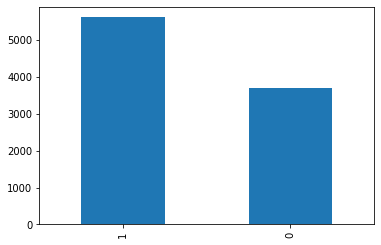

In [8]:
comment_data['label'].value_counts().plot(kind='bar') #data 분포 그래프를 통해서 확인하기

In [9]:
X_data = comment_data['comment']
y_data = comment_data['label']
print('comment 개수: {}'.format(len(X_data)))
print('rating개수: {}'.format(len(y_data)))

comment 개수: 9316
rating개수: 9316


# 불용어 제거 및 토큰화

In [10]:
normalized_text = []
for string in X_data.tolist():
    try:
        tokens = re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣]+", " ", string.lower())
    except Exception as e:
        print(string)
        break
    normalized_text.append(tokens)
print(normalized_text[:5])

['요즘 연앤들 싫은소린 아에 차단하고 듣기좋은소리만 들으려하는듯 조금만 비판해도 악플러 법적대응이라니 돈써서 본인들이 위라는행동 참 ㅋ 오래가겠다', '저 짧은 몇 마디에서 인성이 보이넴 ', '개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ', '정신분열 잼 ㅋㅋㅋ', '실력에비해 오래갔다']


In [15]:
comment_data.comment = normalized_text
for sentence in comment_data['comment']:
    print(sentence)

요즘 연앤들 싫은소린 아에 차단하고 듣기좋은소리만 들으려하는듯 조금만 비판해도 악플러 법적대응이라니 돈써서 본인들이 위라는행동 참 ㅋ 오래가겠다
저 짧은 몇 마디에서 인성이 보이넴 
개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ
정신분열 잼 ㅋㅋㅋ
실력에비해 오래갔다
거만이 하늘을 찌르네 뭔짓을 하든 묻지도 따지지도 말고 찬양만 하고 돈이나 바쳐라 이건가 
점점 왜저러냐 리더라는게 맨날 표정관리 못하고 기분에 따라 행동하고말하는거 진짜 별로다
말하는거 저급해 
말투가 왜저래ㅋㅋ
아무리 그래도 그렇지 말투가 저게 뭐냐 
왜저래 비꼰데 힘들면 그냥 조용히 탈퇴하세요 요즘 보면 얼굴도 어둡고 기분대로 행동하고 표정 다 드러내더만 이제 내리막길 다들 얼굴에 생기가 없고 초심도 잃은거 같고 배부르지 그만하고 쉬어라 다들 팬 많지 금방 썰물처럼 다 휩쓸려간다 너희 아무것도 아니다 배부른 소리하고 자빠졌네 비호감이네 진짜
아무리봐도 잘못 뽑은 것 같다
인기있을때 높은곳에 있을 때 말을 좀 조심할 필요가 있을 거 같네요 표현이 참 
인기도 좋고 다 좋은데 말투가 왜 그래요 어린 팬들도 많은 사람이
진짜 예민하네 
와 좀 깨긴 깬다 스트레스여서 그럴 수도 있는데 그래도 라이브 동영상에서 저런 말을 했다는게 당신이 그 자리에 앉아있는 것도 그런 관심 때문인 것을 ㅉㅉ
윽 진짜 말투 이런다고 
말 더럽게 싸가지 없게 하네ㅋㅋㅋㅋㅋ 니 성격대로 피코짓 하지말고 이제 힘든척 울지마 이 가식덩어리야
멘탈이 상당히 불안정한듯 제발 말과 글을 자제하고 행동을 조심해주길 
맨날 표정관리못하고 기분에따라 행동하고그리고 그만 우세요 
말은 조심히 써야 된다고 본다 그런 말투라면 모든행동이 가식적으로 느껴질거 같다 
어차피 이래저래 이미지 다 망가졌는데 열심히 쉴드 쳐라ㅋㅋㅋㅋㅋㅋ
인성 보소 
요즘 얘네 무슨 특권의식이 이렇게 심한지 모르겠음 회사 인성관리 한다고 하지 않았나 
깨진 건 너 얼굴이다
개돌았네
아 싼티나
언행이 참 가벼워보이네 ㅋㅋ 그렇게 안봤는데 벌레보

킹왕짱 
부럽다 사랑해주는 사람이 많아서 
본인이 다 잘해서 이렇게 잘되는거겠죠 ㅎㅎ
전생에 나라를 구했나봐요 ㅠㅠ 정말 빠질 곳이 없네요
성품이 좋아보이네용 
최고야
몸에 베인 배려와 따듯한 마음씨는 유명하죠
올해도 건강하게 행복하자 
너무 너무 사랑해
존재자체가 사랑이고 선물이지 
진심 다 안다 사랑해 멋진 사람 
인성 최고 
너의 진심을 모두가 알아 잡은손 절대 놓지말아줘 사랑해
따스함 넘치네
다정의 의인화 항상 세심하게 주변사람 챙기고 늘 본인보다도 팬들 걱정하는 따뜻한 사람인거 팬들과 스탭분들 다 아는 사실이죠 안보이는데서 더 진심과 최선을 다하는게 그저 대단하고 대견할 뿐입니다 더 사랑받고 더더 인정받는 년이 되었음 좋겠네요 사랑해
인성까지 훌륭한 뭐 하나 부족한게 없네 최고다 잘하고있어 
따뜻함이 느껴지는 모습
요즘 보기 드문 사람일세
초콜렛같은 사람
머리를 길러도 멋있고 잘라도 멋있고 뭘하건 다 멋있는 사람
내가 너무넘무 좋아해요
관종 
가슴도 없던데 ㅋㅋ
얜진짜 관종이야 
잊을만 하면 지랄해서 검색어에 이름 올리는거지 관심병걸린 왕따들이 한번 시선끌려할때 엄청 세게 꼴값떨고 웃고는 잊혀질만하면 또 한번씩 세게 꼴값떨고 다니지
혼자 즐겨라 애들도 다보는데 머하냐 ㅉㅉ
싸보이는 배우 위
아 진짜 얘도 구혜선처럼 피곤함
인기가 없으니 별짓 다하는구나 
천박한게 연예인이라고 참 한심하다살아가는 방법도 가지가지
야동 배우 하고 싶어하는듯싶다 
구혜선한테 밀린다는 느낌을 받은건가 
에휴 아이들이 이런 연예인들을 티브이 에서 보지않길 바래요 
저사람은 부모 가족도 없는건지 왜 저러고 다니지 저 사람도 법적 제제좀 가해야돼가족들이 불쌍하다
좀 애가 이상해 
본디 사람은 배워야하는 법 보고배운게 없니왜 ㅜㅜ 책좀읽고 교양과 상식좀 키우자 
볼거도 없더만 자꾸 왜이러냐
바바리맨이랑 너랑 다를게 뭐냐
이사람은 가족이 없나 부끄러운줄아세요 
정신상태가 이상함 노출증임
빤스랑 옷은 왜 입고 다니냐 걍 벗고 다니지
걍 다 벗고 살죠 정상 맞나요 역겨움
시선 가게 쳐만들

넘나 고급지다 
오래간만에 얼굴 봐서 좋습니다 역시 예쁩니다
화이팅
쑥쓰러워하는 느낌 이 귀여움 예쁨 
연기도 기대해 화이팅
진짜 자연스럽게 이쁘네 ㄷㄷㄷ
오늘도 미모가 열일하네 여신
대존예
진짜 살 엄청 많이 빠졌당 머리숱도 많아ㅜㅜ부럽
이쁘네
오랜만에 보니까 더예쁘졌다ㅜㅠ
진짜 진심 이쁘다 ㅠㅠㅠㅠ
요즘 활동 안하네 보고싶은데 
니가 탑이다 이뻐
다 대박침 광고도꾸준하고 짱이야 
제일 예뿌다 
매일 이쁘네ㅠ 빨리 드라마에서 보고싶다 열일해줘 
왜 아직까지도 원탑 연기자인줄 알겠다 
뭔가 끌어당기는 매력이 있어
볼수록 예쁩니다 
착해서 더더 예뻐보여 배가본드 빨리 보고싶다
진짜 대조녜ㅠㅠㅠㅠ
예쁘다 
짱 
와 아름다워라
얼굴만 예쁜게 아니라 마음씨도 착하고 따뜻함
얼굴작다 머리풀어서 그사이로 얼굴쏙 넘여성스럽게 난안되고ㅜㅠ 부럽다
슈스이긴 슈스넹 사랑해
너무 이쁘다 
이뻐 
진짜 핫하네ㅠㅠㅠㅠㅠㅠㅠ
아직까진 톱인거 같긴한데 경쟁자라 할 만한 애가 언제 나올려나 
진짜이쁜데 
남자들이 좋아하는 몸매 ㅋㅋ
넘 예쁨 성형 안한 얼굴은 질리지 않고 보기 편해서 좋음 
여신이다 진짜 예쁨
이게 진정한 원탑
국보급으로 이쁘다 
예쁘고 청순하고 섹시하고 귀엽고 다하네 이기적인 사람
또래의 평범한 여자같아서 좋음
ㅈㄴ예뻐 진짜
요새 완전 개여신임 ㅜㅜ 자연미 후덜덜에 지적이고 멋잇음
누가 머래도 내 워너비ㅠㅠㅠ졸라예쁨ㅠ
너무 예쁘더라 흑흑 언니가 많이 좋아해 ㅠ
이쁘고 인성도 좋고 항상 응원해
진짜 이쁘다
아름다워라
고급스럽다
뷰티나
여전히 이쁘네 저 여신머리 왤케 잘 어울리냐
나날이 갈수록 더 예쁘다
이야 사진 하나 올렸다고 이런 관심 참 감사합니다 ㅋㅋㅋㅋㅋㅋㅋㅋㅋ 역시 대스타 
청순여신
부럽
이번생에 실물로 보고 죽을거야ㅠㅠㅠㅠㅠ그래도 건강 잘 챙겨요 너무 마르면 골다공증온다구요 무대에서 많이보고싶어요ㅠㅠㅠㅠ
너무이뻐 얼굴도얼굴이지만 성격이 털털
배가본드 빨리 보고 싶다고 이쁜 수지야
수지언니 너무 예쁘다
아 진짜 너무 예쁘고 귀여워ㅠㅠ
최고의 여신
역시 존예
더 이

이쁘고 귀여워요
이쁘고 멋있어요
이쁘고 사랑스럽다
이쁜 청춘 응원해
지민이의 독무대는 전공자들의 감탄 및 전 세계 팬들의 극찬이 쏟아진다 
이전 이후로 어떤 역사의 대기록이남겨질 예술인 같아 진심으로 잘컷고 대견하고 존경스러워 다시는 이런 아이돌은 못나옵니다
이제 지민이 하면 확실히 믿음이 가는 아티스트가 됐어요
인성 실력 최고인 내가수 지민아 사랑해
정말 대단한 사람이네요 지금의 지민이 있기까지 여정을 보며 감탄했고 끝까지 쭉 응원하겠습니다
정말 대단해요
정말 멋있는 사람이네요 나의 수고는 내가 알면 된다는 지민의 인터뷰를 보고 너무 놀랐었는데 그런 마음들이 오늘의 지민을 만들어 가는군요 영원하길 
정말 멋있다는 말 한마디로는 부족할정도로 멋지고 감동스럽다
정말 멋지게 잘 컸다
정말 멋지네요 자랑스런 지민 늘 응원합니다
정말 멋진 사람 알면 알수록 정말 괜찮은 사람이라고 생각된다 항상 응원할께요
정말 멋진 사람이자 아티스트
정말 모든 면에서 완벽한 사람이네요
정말 사랑한다
지민 정말 사랑해
정말 사랑해 또 사랑해
정말 생각의 깊이와 열정이 대단한 사람이네요
지민 정말 세상 소중하다이런 사람 없다는 ㅠㅠ
정말 응원해
정말 존경스러운 사람
정말 존경스러워
정말 좋아합니다 
정말 차원이 다른 완벽 무대를 사랑합니다
지민 정말 최고가 될 수밖에 없다
정말 최고다 최고 
정말 프로중의 프로 
지금도 노력과 연습을 게을리 하지 않아서 오히려 걱정이예요
지금보다 더 훨훨 날자
지민 너 정말 아이돌력 은하계 최고다 사랑해
지민 때문에 너무 행복해 사랑해 지민아 엄청 아낀다 
지민아 뒤에서 널 응원하고 지켜주는 수많은 팬들이 있으니까 항상 힘내
지민이 때문에 열심히 살아야겠다 지민이 세상 멋지고 감동이야
지민이처럼 심하게 매력적인 사람이 난 좋아 
천재가 노력도 죽어라하니 그게 보여지고 멋짐 
천재가 노력하면 아무도 못 이긴다 지민이 어나더 레벨이지
천재의 피나는 노력 멋져요 
정말 콩깍지가 아니고 살다살다 이렇게 스타로써나 인간적으로 찐인 사람은 처음이고 앞으로도 다신 없

In [19]:
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']#불용어 제거하기

In [17]:
from konlpy.tag import Okt  
okt = Okt()

In [22]:
X_token=[]
for sentence in comment_data['comment']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    #temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_token.append(temp_X)

In [23]:
print(X_token[:3])

[['요즘', '연', '앤', '들', '싫다', '소린', '아', '에', '차단', '하고', '듣기', '좋다', '소리', '만', '들다', '하다', '조금', '만', '비판', '하다', '악플러', '법적대응', '이라니', '돈', '써다', '본인', '들', '이', '위', '라는', '행동', '차다', 'ㅋ', '오래', '가다'], ['저', '짧다', '몇', '마디', '에서', '인성', '이', '보이', '넴'], ['개념', '없다', '원래', '도', '비호감', '이다', '하다', '행동', '이나', '말투', '밉다', '상', '그', '자체', 'ㅋㅋㅋㅋㅋ']]


# 정수 인코딩 수행

In [26]:
max_words = 35000
tokenizer = Tokenizer(num_words = max_words) # 상위 35,000개의 단어만 보존
tokenizer.fit_on_texts(X_token) 
X_token = tokenizer.texts_to_sequences(X_token)

In [27]:
print(X_token[:3])

[[290, 809, 1638, 10, 100, 3324, 43, 6, 3325, 74, 1948, 24, 328, 63, 82, 1, 898, 63, 3326, 1, 2447, 2448, 1639, 264, 551, 329, 10, 2, 368, 318, 319, 64, 115, 493, 90], [52, 575, 1640, 1641, 77, 84, 2, 299, 3327], [552, 13, 369, 5, 125, 14, 1, 319, 238, 109, 378, 402, 75, 168, 351]]


In [28]:
word_to_index = tokenizer.word_index

In [29]:
vocab_size = len(word_to_index)+1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 6414


# 데이터 분리

In [54]:
y_data = list(y_data)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_token, y_data, test_size= 0.3, random_state=1234)

In [59]:
y_train = list(y_train)
y_test = list(y_test)

In [60]:
print(X_train[:3])
print(y_train[:3]) # 분리 여부 확인

[[106, 368, 6, 1419, 1234, 282, 712, 498, 440, 7, 383, 1, 135, 2, 64, 119, 24], [48, 32, 82, 1951], [43, 4, 793, 343, 91]]
[0, 1, 1]


# 전체 데이터 길이 분포 확인

train 리뷰의 최대 길이 : 124
test 리뷰의 최대 길이 : 88
리뷰의 평균 길이 : 7.2269590553596075


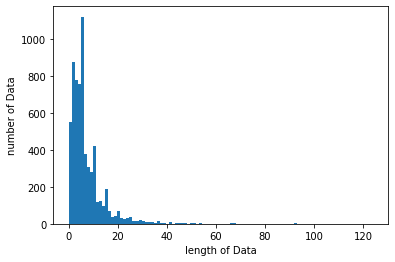

In [44]:
print('train 리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('test 리뷰의 최대 길이 :',max(len(l) for l in X_test))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=100)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [45]:
max_len = 124
train_data = pad_sequences(X_train, maxlen=max_len)
test_data = pad_sequences(X_test, maxlen=max_len)
print("train data shape: ", train_data.shape)
print("test data shape: ", test_data.shape)

train data shape:  (6521, 124)
test data shape:  (2795, 124)


# 모델 만들기

In [46]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

In [61]:
model = Sequential()
model.add(Embedding(max_words, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

ValueError: `validation_split` argument is not supported when data adapter is <class 'tensorflow.python.keras.engine.data_adapter.ListsOfScalarsDataAdapter'>. Received: x=[[106, 368, 6, 1419, 1234, 282, 712, 498, 440, 7, 383, 1, 135, 2, 64, 119, 24], [48, 32, 82, 1951], [43, 4, 793, 343, 91], [4, 56, 2, 106, 36, 165, 116, 2, 209, 13, 12, 42, 1, 757, 124, 7, 1198, 398, 291, 50, 267, 46, 183, 874, 16, 56, 2, 84, 73, 51, 73, 311, 18, 12, 15, 257, 26, 22, 1045, 76, 1141, 1863, 4, 1872, 5989], [293, 846, 6, 1214, 1, 285, 123, 489, 5, 1, 71, 3, 1560, 30, 480], [62, 8, 261, 173, 1, 151, 18, 717, 235, 17, 882, 6, 21, 193, 13, 2415], [2232, 332, 71, 130], [2497, 2263, 699, 2847, 1530, 1, 2848, 2848, 4292], [351, 109, 169, 169, 351], [83, 63, 8, 4610, 170, 468], [198, 44, 23], [280, 59, 15, 180], [2893, 2, 12, 197], [2062, 275, 220, 75, 431], [2615, 2610, 645, 3684, 3685, 212, 5, 68, 46, 2, 487, 106, 16, 679, 1196, 46, 589], [451, 220, 26, 6, 130, 34, 1], [367, 383, 365, 68, 463, 400, 232, 1554, 35, 832, 39, 528, 696, 5, 1020, 15, 279, 1555, 5, 98, 23, 50, 2, 23, 50, 2, 13, 15, 9, 160, 98, 35, 481, 383, 1, 124, 6, 438, 752, 46, 183, 1367, 353, 2, 233, 833, 47, 972, 77, 59, 371, 1, 116, 10, 73, 1367, 618, 481, 112, 1554, 93, 586, 2777, 1, 218, 828, 4113, 538, 34, 1], [105], [4, 29], [33, 614, 124, 314], [357, 4], [816, 1100, 196, 741, 1], [255, 417], [25, 102, 126, 80, 241, 4697, 127, 23], [2590, 2, 3634, 4, 141], [2808, 6, 5699, 364, 53, 268, 55, 1581, 31, 1], [106, 165, 1238, 1, 1238, 1, 8, 59, 45, 71, 130], [72, 347, 3], [94, 108, 8, 579, 307], [1659, 6, 61, 20, 21, 23, 604, 822, 398, 246, 6031, 267, 106, 6032, 116, 10, 236, 2221, 1, 214, 6033, 6, 118, 61, 47, 9, 140, 79, 571, 631, 33, 216, 140], [46, 26, 14], [1587, 16, 1587], [304, 25, 854, 264, 496, 4, 1960, 2, 61], [87, 834, 50, 58, 373, 55, 62, 1282, 834, 50, 58, 373, 36, 1825, 9, 2232, 195], [27], [181, 98, 35, 2905, 12, 195], [48, 83, 25, 179, 262, 119, 100], [132, 5580, 823, 110, 1210, 485, 127, 36, 5581, 1, 750, 80], [109, 8, 203, 9, 397, 112, 129], [107, 719, 4347, 36, 788, 113], [654, 6, 413, 1230, 764, 20, 2929, 2, 379, 97, 62, 22, 378, 2929, 18, 4478, 4479, 259, 1171], [1853], [94, 15], [94, 887, 1360], [1765, 3764], [1241, 11], [4, 5042, 2, 49, 103, 310, 20, 71, 2516, 19, 124, 2, 102, 1564, 1509, 3100, 39, 212, 447, 36, 2129, 1, 75, 9, 518, 11], [48, 19, 1, 265, 449, 1066, 70, 65, 91, 1166, 137, 128, 214, 1017, 416, 41, 128, 213], [1438, 266, 2716, 6, 478, 209, 1808, 86, 219], [2321, 138, 287, 906, 1893, 50, 35, 104, 1398, 286], [929, 1740, 9], [39, 2, 12, 1880], [2, 9, 83, 543, 742, 262], [1130, 4, 125], [49, 140], [31, 28, 549], [258, 108], [166, 409, 16, 15], [728, 22, 683], [45, 111, 82, 137, 3636, 237, 7, 1185, 21, 46, 110, 46, 14], [490, 628, 50, 35, 25, 2185], [117, 799], [116, 10, 18, 158, 179, 54, 1423, 63, 151, 2, 1648, 3, 101, 523, 264, 18, 859, 3496], [1970, 72, 131, 3360], [17, 12, 15], [251, 6, 82, 101, 67], [72, 131, 32, 72, 131, 69], [1599, 737, 27, 83, 764, 154, 449, 883, 536, 2190], [105, 642, 166], [172], [590, 124, 3810, 1524, 3811, 149], [539, 483, 113, 440, 22, 256, 3197], [421, 96, 194, 40], [89, 32, 284, 25, 81, 139, 88, 884, 439], [106, 368, 135, 858, 449, 457, 2, 61, 410, 111, 427, 12, 42, 1], [87, 1311, 78, 63, 123], [898, 795, 70, 21, 9, 2, 1262, 75, 3, 408, 84, 73, 4150, 2604, 2794, 2795, 36, 497, 9, 235, 7, 221, 66, 30], [476, 18, 982, 2, 2152], [56, 7, 663, 455, 14, 71, 256, 22, 469, 813, 1314, 275], [98, 29], [56, 17, 164, 332, 79, 9, 13, 140], [1222, 766, 285, 7, 486], [1399, 593, 58, 1924], [117, 127, 185, 92], [2422, 1926, 153, 1124, 14], [17, 42, 1], [34, 1, 89, 22, 218, 66, 64, 195], [233, 40], [20, 1595, 6, 216, 38, 1, 116, 10, 101], [2424, 11], [842], [394], [284, 10, 18, 57, 161, 272], [20, 2352, 1489, 250, 244], [317, 11, 39, 6, 1304, 5, 21, 640, 86, 666, 837, 5412, 170, 250], [125], [56, 106, 8, 1505, 199, 13], [2, 202, 33, 40, 299, 76, 37, 359, 67, 1, 30, 103, 288, 647, 288, 18, 23], [117, 127], [553, 76, 1393, 1114, 1407, 5381, 287, 553, 76, 2015, 245, 850, 2479, 2188], [352, 27, 11, 1714, 54, 61, 112, 1113, 128], [1007, 63, 82, 389, 418, 2, 12, 456, 24, 208, 960, 4, 141, 9, 2, 429, 329, 22, 75, 4447, 7, 16, 607, 14], [20, 141], [225, 1186, 1176, 1001, 247, 26], [737, 1331, 1206, 185, 28, 581, 74, 3826, 32], [2, 72, 556, 831], [4107, 43], [4374, 217, 2884, 36, 2069, 53, 4375, 4376], [1009, 796, 281, 989], [2, 27, 43], [5975], [5180, 121, 5181, 55, 227, 2333, 30, 23], [145, 240, 296], [4, 125, 30], [41, 138, 436], [388, 2077, 245], [14, 489, 1, 4778, 149, 9, 13, 631, 146, 906, 80], [26, 316, 36, 324, 17, 15], [1524, 209, 941, 123], [164, 18, 1317, 215, 10, 18, 101], [44, 953, 79, 434, 70, 65, 91, 246, 54, 2295, 167, 62, 313], [4, 442, 1299, 76, 91, 190], [68, 15], [200, 125], [147, 25, 65, 923], [289, 74, 24, 283], [1002, 1, 383, 365, 400, 2229, 2230, 47, 2217, 597], [1103, 6, 157, 123, 180, 53, 265, 81, 146, 133, 1164, 186, 1140, 2740, 103, 251, 776, 30, 4, 102, 95, 69], [158, 25, 158, 1400, 88], [52, 163, 133, 1777, 463, 6, 113, 117, 2, 180], [772, 20], [706, 523, 103, 109, 3, 52, 66, 57, 175], [114], [99, 10, 809, 1638, 10, 2, 72, 131, 97], [2, 187, 251, 3, 68, 1672, 67], [243, 27], [12, 15], [94], [3608, 526, 94, 14], [1363, 738, 5205], [145, 240, 19, 258], [136, 1055], [1245, 623, 72, 3029, 1, 83, 158, 551, 394, 342, 292, 5883, 97, 2182, 2183, 908, 1336, 3256, 5884, 1161], [150, 2, 232, 9], [40, 39, 73, 4879, 4880, 251, 1899, 354, 4, 233, 40], [800, 11], [6260, 50, 1602, 1413, 13, 67], [72, 347, 3, 447, 552, 206], [2633, 26, 14], [690, 544, 1775], [89, 32, 3, 186, 1102, 7, 265, 7, 1, 186, 121, 986, 262], [272, 54, 2, 333, 182], [44, 263], [1107, 35, 581, 1], [2492, 1990, 223, 2], [49, 969, 85, 4, 1079], [3068], [174, 699, 331, 206, 8], [15, 26, 2446, 36, 3173, 1], [12, 31, 28], [356, 24, 2397, 10, 2, 3085, 12, 180, 1830, 588, 6, 113, 749, 288, 2, 23, 3156, 2368, 30, 3157], [783, 6, 649, 1, 3731, 49, 1199, 3732, 3733, 294, 85, 60, 34, 1], [306, 216, 56, 2], [87, 38, 1], [4042, 50, 8, 982, 14], [89, 6, 787, 520, 2, 12, 6137, 173, 1, 56, 43], [4, 94, 15, 9], [105, 26, 22, 130, 14], [71, 3, 144, 95, 308, 701, 146, 297, 1, 785], [5828, 5829, 1656, 669, 189, 795, 716, 5830, 47], [93, 910, 142, 22, 225, 10, 18, 12, 46, 50, 1747, 60, 225, 63, 118, 630, 1022, 66, 3291, 6091, 3, 75, 51, 22, 1134, 55, 415, 22, 453, 7, 607, 142, 2, 59, 141, 24, 101, 70, 73, 933, 6, 416, 47, 2494, 36, 464, 76, 189, 22, 1355, 7, 118, 1864, 1, 210], [26, 14, 46, 14, 514], [642, 72, 131, 984, 6, 21, 27, 566, 78, 7, 156, 1026, 22, 5843, 7, 8, 30, 78, 14, 70, 13, 3239, 3, 13, 5844, 14, 351, 79, 2531, 6, 70, 7, 65, 91, 91, 631, 8, 375, 1017, 74, 387, 256, 2, 64, 1267, 5, 1267, 5], [307, 29], [104, 197], [105, 296], [1007, 63, 82, 46, 14, 134, 3, 491, 51, 86, 714, 6165, 1563, 1398, 797, 280, 261, 157, 6, 416, 81, 1, 152, 2, 3268, 6166, 22, 39, 56, 616, 2, 6167, 26, 790, 2, 349], [2004, 863, 32], [49, 445], [1130, 187, 10, 695, 128, 219, 121], [490, 18, 861, 7, 123, 1285, 19, 353, 206, 1113, 103, 412, 369, 1453, 2, 1881], [435, 5, 685, 616, 930, 6, 21, 100, 92], [110, 231], [37, 27], [966, 622], [57, 69, 616, 1754, 53, 72, 131, 69], [4316, 32, 1567, 174, 1166, 137], [4389, 73, 957, 427, 15, 108, 9], [71, 734, 22, 455, 73, 34, 14, 195, 2060, 38, 1, 172, 14], [247, 50, 58, 1045, 212, 5, 2442, 51, 1, 135, 2, 1504, 42, 30], [29], [948, 16], [1025, 1348, 2176, 27], [134, 50, 155, 6, 521, 35, 6018, 30, 410, 111], [897, 1947, 297, 705, 1408, 65, 4, 125, 14, 1408, 41, 138, 216, 264, 276, 3226], [105, 1089], [109, 62, 63, 249, 76, 1136, 286, 41, 128], [337, 915, 75, 168], [114, 67, 4950, 22, 4951, 23, 33, 20], [157, 19, 62, 63, 123], [277, 3, 713, 7, 280, 1434, 211, 321, 144, 2100, 7, 1, 1767, 2101, 31, 1, 3772, 3773, 19, 412], [57, 3, 20], [1762], [4368, 3, 4369, 287, 48, 19, 54, 7, 12, 20, 1, 33, 20, 1, 13], [49, 4, 29], [240, 36, 203, 1, 171, 86, 1, 193, 21, 45], [529, 878, 32, 4], [27, 1741, 22, 1969, 5812], [229, 229], [6, 323, 502], [337, 43, 41, 113], [272, 2694, 10, 515, 93, 10, 515, 4, 921, 10, 7, 1], [17, 46, 14], [109, 3, 41, 128], [406, 4, 258, 1, 1491, 305], [744, 14, 498, 4, 84, 565], [4, 29], [186], [261, 95, 10, 5, 171, 54, 1, 47, 1996, 5, 25, 513, 522, 1], [689, 1216, 348, 69], [89, 19, 17, 232, 332, 9, 183], [121, 4, 70, 512, 849, 315, 2125, 1391], [387, 110, 285, 6, 5980, 8, 804, 205, 366, 126], [17, 15, 9, 221, 133, 112, 17, 637, 9, 411, 81, 30, 87, 38, 1], [45, 94, 7, 1472, 1], [37, 72, 131, 297, 8], [49], [2288, 1, 61, 511, 238, 6, 204, 655, 2341, 1300, 1246, 299, 76, 356, 5265, 30, 271, 104, 143, 115, 157, 19, 306, 101, 271, 18, 306, 879, 2712, 143], [83, 25, 158, 551, 72, 131, 1056], [2730, 33, 61, 24], [646, 104, 174], [258], [12, 46, 589, 87, 38, 1], [248, 85], [1416, 158, 25], [15], [94, 227], [98, 35, 148, 1294], [1, 274, 25, 808, 366], [452, 454], [17, 56, 2, 19, 840, 2, 295, 236, 324, 790, 589, 79, 275, 7, 722, 193, 21, 295, 19, 1512, 65, 122, 297, 81, 1, 56, 2, 3, 731, 130, 71, 130, 318, 66, 17, 339, 87, 38, 1, 1036, 56, 17, 484, 34, 1], [4834, 90, 139, 88], [1332, 99, 49, 578, 197, 1286, 54, 7, 54, 127], [928, 1076, 17, 45, 427, 94, 2623, 76, 680], [4104, 10, 37, 4105, 55, 1356, 1444, 4106], [406, 71, 3, 8, 75, 395, 6379, 2339, 1409, 26, 55, 15, 165, 110, 8, 457, 2, 1044, 137], [8, 13, 150, 596], [136, 2085, 211, 28, 176, 27, 2093], [583, 70, 13, 1448, 210, 64, 948, 16, 2157, 10, 405, 670], [1020, 39, 528, 696, 5, 15, 34, 1], [1999, 171, 800, 35, 27, 30, 156], [43, 323, 4, 192, 634, 100], [1480, 49], [4, 72, 131, 69], [147, 3, 385, 78, 11, 240, 149, 9, 2, 13, 277, 776, 240, 36, 25, 149], [87, 84, 5, 4133, 5, 2218, 625, 6, 325, 9, 10, 427, 216, 78, 11], [4, 1644, 321], [89, 22, 772, 217, 1034, 18, 181, 62, 22, 455, 183], [147, 36, 65, 24, 11, 90, 1574, 147, 5, 65, 1893, 50, 35, 152, 481, 3004, 763, 503, 60, 9, 2, 416, 4674, 66, 30, 118, 4675, 1], [17, 111, 42, 1], [31, 28], [1577, 298, 1896], [51, 149, 189, 5, 246, 51, 149, 195], [114], [96], [256, 22, 6392], [375, 546], [56, 452, 339, 34, 1], [230, 1817, 583], [4, 28, 57, 211, 28, 201, 3880, 2, 102, 3881, 206], [92], [28, 153, 120, 16, 1], [737, 27, 695, 42, 82, 322, 3121, 1, 715, 101], [274, 8, 20, 1255, 1756, 707, 13], [31, 28, 3096, 580, 156, 111, 19, 118, 2371, 88], [356, 5, 4931, 260, 5, 704, 16], [342, 292, 991], [4, 12, 40], [242, 568, 2821, 1301, 174], [2580, 275], [61, 262, 4, 857], [87, 218, 78, 7, 38, 1], [461, 451, 220, 14], [490, 7, 8, 81, 2, 104, 2787, 138, 745, 2030, 74, 152, 232, 110, 677, 619, 9, 5, 21, 1, 145, 751, 371, 1560, 24, 605, 2788, 38, 1], [12, 339, 257], [2, 5761, 493, 2588], [62, 19, 5478, 1, 2, 353, 18, 5479, 1], [319, 73, 1874, 2, 1516, 11, 9], [4013, 50, 2748, 4014, 13, 54, 14], [388, 320, 1489], [674, 573, 6310, 319, 7, 391], [294], [49, 4, 29, 244], [27], [83, 513, 237, 2, 140], [2685, 1105, 69], [816, 77, 2465, 30], [222, 1, 20], [27, 6, 886], [1450, 2002, 41, 79, 16, 102], [159, 474, 286], [26, 94, 1510, 1], [49, 622, 11, 107, 1030, 4, 128], [49, 461, 4, 248, 14, 26, 14], [1565, 2722, 771, 101], [1322, 225, 1080, 825], [116, 1713, 12, 141], [105], [254, 5, 459, 14], [1036, 56, 160, 619, 20], [37, 1438, 32, 1490, 3795, 1522], [96, 132, 1976], [104, 229], [3676, 26, 245, 88], [694, 2709, 5, 517, 52, 617, 16, 692, 23], [49, 4, 45], [4, 12, 20, 3192, 317, 85], [68, 24, 87, 38, 1], [111, 46, 22, 2619, 14, 237, 2620, 864], [323, 79, 95, 83, 36, 41, 224, 5854, 37, 27, 591, 182], [951, 78, 10], [1033, 198, 2219, 75, 168, 32], [1249, 8, 96, 20], [37, 71, 4467, 6, 1101, 1234, 24, 509, 19, 4468], [5690, 1857, 2], [25, 912, 1, 1343, 73, 415, 7, 368, 1], [1786, 5359, 1809, 376], [817, 3485, 3486, 1458, 180, 80], [1934], [52, 163, 133, 1642, 183], [1136], [350, 9, 75, 168], [749, 635, 562, 40], [1579, 7, 2912, 1, 1, 2913, 4441], [1773, 185, 28, 239], [48, 19, 37, 222, 526, 40], [40, 4920], [96], [49, 94], [4471, 1098, 24], [268, 615, 3, 434, 8, 1027, 297, 266, 1174, 23, 1], [111, 26, 14], [8, 4876, 1046, 447, 2, 4877], [519], [189, 86, 788, 49, 8, 17, 51, 22, 340, 17, 12, 29, 38, 1, 26, 748, 60], [303, 134, 266, 6, 491, 51, 73, 311, 35, 247, 26, 279, 3, 30, 9], [148, 313, 302, 21, 286], [966, 20], [200, 102, 107, 55, 299, 32], [564, 81, 2, 400, 2213], [14, 268, 10, 998, 5710, 1040, 245, 507], [806, 2118, 290, 8, 33, 20, 12, 92], [310, 765, 276, 3081, 4961], [37, 27], [28, 1528, 220, 212, 121, 52, 39, 55, 301, 1, 45, 105, 39, 6, 2683, 768, 121], [80], [43, 4, 386, 61, 28, 176], [303, 155, 6, 101, 51, 7, 666, 181, 106, 77, 26, 3279, 174, 9, 218, 78, 2, 26, 69], [43, 357, 4084], [367, 383, 3, 309, 6, 1559], [274, 148, 25, 2333, 30, 78, 11, 98, 631, 30], [62, 177, 21, 2342, 184, 151, 18, 162, 78, 5, 2342, 1, 421, 284, 10, 18, 57, 161, 171, 177, 21, 2342, 1, 148, 6, 2333, 129], [20, 20, 1, 531, 68, 906, 1359], [37, 27], [1075, 531, 1127, 4713, 1647], [102, 4849], [460], [307, 1360, 270], [27, 323, 190], [2, 819, 26], [49, 4, 256, 53, 3734, 16, 391, 2636, 3, 49, 154, 118, 1011, 374, 3735, 32], [6387, 1], [89, 625, 6, 101, 9, 2, 416, 67, 37, 89, 3, 186], [392, 2513, 2, 3466], [48, 19, 180, 15, 115], [253, 1568, 25, 114, 41, 224, 213, 214, 863, 32], [64, 28, 942], [148, 6, 2326, 470, 321], [606, 77, 8, 3688, 46, 50, 14], [241, 2016, 251, 6, 82, 13], [48, 19, 572, 55, 70, 7, 87, 1369, 1], [1426, 872, 1010, 221, 211, 28], [41, 490, 858, 449, 796, 702, 3, 939, 534], [4551, 420, 93], [136, 1079, 259, 601, 22, 2081, 176], [256, 64, 844, 942, 4545], [150, 2, 123, 123, 53, 362, 469, 68, 46, 14], [659, 405, 63, 174, 300, 517], [3907], [20], [68, 108], [80, 84, 3387, 6, 3388, 1651, 25, 139], [189, 2, 66, 1008, 252, 165, 5, 904, 627, 534], [27], [261, 87, 173, 170], [2, 202, 25, 889, 243, 70, 213, 137, 11], [793], [5413, 378, 5414, 376, 2, 5415, 1, 39, 749, 609], [189, 5, 12, 487, 24, 9, 212, 59, 24, 9, 2, 30, 332, 1449, 152, 7, 788, 91, 729, 650, 711], [4, 130], [8], [42, 1697], [253, 150, 2, 390, 90], [285, 623, 960, 44, 2, 964, 1], [342, 2528, 342, 292, 1155, 179, 241, 302, 776], [144, 66, 130, 97], [401, 154, 75, 431, 90, 1253, 13, 388, 2, 23, 143, 3, 63, 4991, 2, 44, 50, 390, 53, 4992, 399, 9, 211, 545, 286, 37, 16, 2364, 1222, 129], [4, 662, 771, 40, 140], [94, 15], [146, 424, 20, 140], [48, 766, 470, 1, 23, 98, 2185, 89], [83, 210, 472, 798], [37, 100, 872, 132], [6, 1278, 2311, 127, 206, 758, 129], [2001, 529, 442, 436, 190], [56, 452, 34, 1], [839, 19, 518, 12, 897, 308, 42, 499], [547, 804, 205, 124, 2, 1373, 110, 231, 11], [37, 248, 75, 168], [367, 160, 46, 14], [727, 6, 9, 2, 13, 467, 3, 24, 47, 67], [96], [964, 59, 1243, 2348, 6, 148, 1891, 25, 196], [167, 504, 3011, 147, 3, 1226, 205], [259, 1575, 3, 16, 390, 90, 102], [145, 1873, 1037, 166, 1054, 2, 2358, 15], [71, 256, 22, 53, 1178, 75, 22, 111, 36, 3602, 1, 193, 21, 78, 18, 1179, 184, 1179, 14, 75, 22, 111, 217, 164, 7, 538, 8, 916, 586, 337, 6, 787, 1736, 34, 2, 21, 3603, 150, 35, 1180, 36, 1181, 19, 237, 2, 2037, 21, 2572, 463, 1072, 992, 1, 47, 3604, 11, 180, 2038, 22, 3605, 2, 21, 1003, 616, 3606, 22, 1473, 36, 3607, 538], [72, 131, 97, 140, 973, 730, 133, 773], [4431, 4432, 7, 4433, 1], [581, 7, 1, 115, 1458, 5, 508, 139, 88], [865, 50, 14, 3716, 24, 111, 1321, 1], [706, 8, 971, 1647, 78, 11], [32, 6345, 182, 1, 265, 8, 417], [870, 5, 13, 301, 77, 145, 150, 2927, 9, 927, 821, 3153, 301, 5, 23], [20, 156], [188, 18, 23, 78], [12, 24], [117, 127], [1965], [160, 98, 2, 1307, 2281, 40, 152, 7, 403, 1, 345, 112, 108, 9, 85, 60], [94], [2558, 8, 563, 3570, 3571, 90, 505, 3572, 76, 606, 6, 782, 58], [42, 1], [304, 740, 37, 854, 23, 4, 138, 197, 615, 5, 246, 304, 854, 569, 51, 74, 1785, 1, 135, 1586, 2, 30], [45, 1089], [554], [49, 45, 29, 160, 38, 1], [49, 98, 166], [6149, 6150, 247, 26], [2602, 50, 58, 6101, 36, 6102, 35, 3046, 178, 189, 86, 6103, 256, 1256], [15], [1189, 1], [2355, 609, 749, 640, 6, 340, 270], [41, 128, 20, 47], [27, 695, 479, 42, 322, 5928], [1491, 305], [1286, 423, 4, 277, 3, 1145, 25, 471, 223, 85, 241, 4222, 795, 21, 213, 163, 3, 437, 11], [1, 265, 1300, 13, 634, 6, 323], [37, 298, 121, 253, 1233, 364, 722, 66, 13, 439], [225, 2, 1186, 45], [84], [162, 669, 282, 4236, 797, 246, 180, 1, 235], [268, 175, 121, 5887, 76, 91], [278, 2, 41, 128, 329, 1029, 4693, 3, 209, 758], [535, 69, 3937, 123, 165, 91, 480, 984, 380, 693, 137, 480, 117, 127, 215, 3938, 139, 88, 391, 2, 122, 513, 241, 81, 1, 3939, 480], [25, 3427], [957, 2, 108, 685, 809, 533, 1584, 90, 9, 2, 2277], [132, 48, 226, 858, 449, 92, 2693, 117, 127, 11, 140, 338, 10, 43, 83, 179, 883, 1315, 8, 9, 18, 2327, 103, 226, 1224, 6, 718, 92], [915, 725, 93], [583, 43, 24, 37, 112, 269, 43, 70, 13], [301, 575, 12, 986], [1938, 7, 8, 1555, 5, 124, 7, 1198, 13, 248, 1, 9, 160, 15, 106, 195, 339], [34, 1, 2041, 152, 35, 116, 73, 1487, 149, 382, 3616, 6, 1, 1474, 7, 1737, 9, 2, 396], [192, 2241, 678], [260, 5113], [102, 988], [176, 45, 45, 4, 258, 1], [48, 19, 407, 41, 924, 407, 125], [39, 604, 3061, 60, 1927, 7, 1321, 1], [119, 219, 73, 1], [89, 63, 67], [283, 587, 206, 8, 301, 1287, 380, 2568, 2569, 3, 3595, 15, 45, 4, 42, 1], [831, 171, 1608, 226, 18, 41, 326, 52, 66, 1695, 206], [17, 45, 78, 11, 15, 38, 1], [49, 4, 96, 12, 40, 439], [116, 10, 2, 101, 344, 36, 221, 78, 11], [387, 5, 284, 2, 21, 414, 2105, 19, 241, 940, 144, 651, 230, 280, 1164], [28, 841, 999, 1, 468, 337, 43], [53, 542, 4252, 8, 4, 1143, 689], [2250, 281, 447, 4253], [441, 1], [68, 40, 15], [251, 36, 1506, 29, 1165, 29, 222, 146, 362, 16, 29, 9], [17, 683, 220, 130, 32, 116, 2, 287], [319, 18, 564, 257, 447, 1, 81, 18, 400, 2276, 1037, 2280, 34, 7, 345, 1096, 112, 24, 9], [48, 19, 39, 55, 2322, 3, 209, 37, 2322, 30, 53, 319, 238, 260, 7, 346, 11, 1607], [9, 2, 200, 102, 196, 716], [172, 14], [441, 1, 4], [12, 29], [150, 68, 596, 2091, 2650, 97, 47], [866, 2024], [335, 130, 52, 3567, 55, 1, 9, 13, 3568, 8], [223, 146, 2510], [1196, 298, 1715, 13], [423, 2110, 36, 203, 1, 222, 1534, 276, 75, 822, 676, 3, 685, 1176], [1650, 702, 11, 2313, 893, 284, 10, 18, 57, 1], [336, 573, 250], [452, 108], [26, 482], [785, 4598, 1363, 738, 1570, 89, 4599, 137, 4600, 519, 338, 1150, 4601, 706, 851, 83, 13, 48, 83, 25, 179, 4602], [738, 62, 5664, 220, 2383, 1231, 262, 3227, 16, 5665, 2, 381, 3228, 3, 480], [207, 7, 5806, 1681, 159, 441, 52, 122, 540, 24, 1095, 123, 621, 35, 880, 55, 213, 156], [167, 147, 4679, 55, 65, 30, 223, 7, 1523, 470, 147, 36, 65, 418, 2335, 2, 12, 437], [301, 35, 3703, 400, 8, 294], [806, 18, 535, 161, 52, 78, 10, 33, 876], [4555, 27, 6, 84, 86, 249, 76, 31, 28, 1], [612, 44, 31, 1288, 27, 4489, 74, 314], [594, 36, 767, 9, 2, 21, 677, 89, 206, 8], [4, 471, 341, 13], [2446, 6411], [369, 271, 2, 293, 4983, 48, 3, 27, 182, 182], [8, 882, 266, 4423, 4, 631, 171, 882, 11, 47, 9, 2, 21, 81, 10, 66, 376], [42, 1, 12, 42, 1, 1079], [27, 121], [3209, 22, 3210, 3, 708, 586, 5693, 795, 766, 8, 24, 2, 202, 119, 100], [94, 29], [4, 374, 1010, 3062, 1110], [620, 184, 26, 58, 126], [2, 245, 1885, 899, 379, 669, 162, 1643, 204, 290, 390, 61, 353, 1228, 2288, 74, 1, 191, 13, 565, 32], [49], [1085, 22, 867, 26, 22, 2431, 491, 51, 35, 242, 35, 59, 597, 9, 784, 38, 1], [1000], [256, 7, 3293, 1940, 52, 1030, 19, 134, 50, 58, 155, 73, 312, 7, 6229, 1, 826, 1418, 56, 2, 3, 2292, 173, 170, 17, 1738, 71, 744], [84, 86, 454, 57, 161, 545, 13, 42, 1], [105], [219, 1616], [1136, 109, 77, 84, 389, 1433, 212], [1607], [180, 180, 1986, 7, 2256, 2936, 2831, 75, 2136, 1572, 721, 5, 16, 940, 101, 9, 43], [196, 48, 83, 25, 158, 4781, 349, 2, 202, 179, 9, 628, 2, 59, 431, 205], [11, 335, 2896, 319, 35, 174, 367, 665, 506], [1015, 2, 2, 2704, 39, 165, 91, 47, 445], [4, 171, 143, 40], [5437], [5863, 466, 5864, 69, 684, 24, 5865, 53, 2772, 10, 7, 41, 540], [1287], [731, 77, 832, 145, 240, 1120, 4, 45, 9], [755, 28], [117, 127, 11, 95, 167, 418, 2, 385, 145, 418, 2335, 161, 3009, 31, 1, 2131, 9, 559, 149, 79, 2974, 12, 1129, 100], [89, 32, 341, 119, 33, 884, 62, 11, 186, 590, 323], [27, 288, 2], [49, 4, 15], [27, 190], [342, 292, 420, 93], [27, 811, 3, 21], [44, 953, 10, 22, 145, 4047, 7, 165, 21, 78, 11], [72, 1551, 6, 26, 27, 1310, 27], [652, 426, 57, 3045, 933, 30, 93, 18, 717, 14, 80], [53, 360, 3, 53, 360, 995, 1, 331], [253, 442, 40, 4], [70, 65], [96, 70, 512, 93], [5309, 917, 789, 11], [4, 248, 85, 60], [111, 118, 909, 139, 84, 24, 39, 118, 304, 3, 101, 16, 344, 3, 21], [1454, 1712, 2, 61, 80], [111, 36, 4, 53, 2034, 53, 2034, 1478, 562, 42, 1, 17, 46], [29, 1044, 166, 32, 60, 105], [52, 109, 8, 1136, 201, 724], [866, 8, 117, 2, 365, 205, 470, 147, 2825, 67], [558, 444, 1003, 39, 13], [856, 187, 447, 1382, 201], [49, 4, 108], [417, 223, 976], [106, 1038, 77, 67, 135, 5, 68, 257, 218, 120, 1043, 374, 615, 1421, 16], [194, 169], [1567, 8, 2208], [20, 157, 123, 233], [186, 37, 186, 2, 164, 6, 1264, 5, 209, 78, 11, 4086, 47, 57, 1], [1174, 185, 28], [392, 1221, 7, 555, 709], [4635, 10, 4636, 2993, 576, 4637, 1244, 1159, 755, 265, 4638, 500, 263, 30, 1892, 608, 208, 86, 255], [62, 308, 283, 55, 63, 4097, 42, 149], [20, 42, 1, 258, 258], [6162, 197, 744, 12, 15, 339], [20, 57, 1, 211, 269, 268, 3, 13, 176], [380, 33, 5944, 1, 98, 96, 93, 341, 18, 584, 1, 502], [146, 43, 292, 251, 36, 1497, 343, 2677, 7, 789, 584, 1165, 5810, 885, 3, 75, 1753, 13, 215, 10, 113, 885, 774, 2354], [285, 123, 366, 1, 375], [104, 8, 439], [2739, 4094], [29], [105], [96, 112, 1566, 447, 552, 1381], [46, 46, 46, 22, 3653, 451, 220], [3367, 30, 3368], [2, 5011, 297, 5012, 52, 78, 5, 260, 184, 6, 146, 137, 600, 5013, 86, 801, 5014, 486, 1855, 63, 174, 214, 95, 10, 18, 535, 297, 1], [68, 436], [420, 334, 334, 31, 28, 93], [15, 404, 20], [4062, 1006, 43], [414, 3, 735, 7, 203, 667, 118, 112, 21], [896, 170], [3526, 85, 479, 19, 80], [176, 27, 22, 393, 7, 174, 48, 1039, 21, 1061, 1118, 151, 5846, 422, 31, 998, 363, 151, 2163, 5847], [612, 33, 689, 57, 1, 692, 446, 43], [259, 783, 6, 107, 19, 39, 20, 726, 23, 1334, 221, 66, 396, 39, 20, 93, 18, 464, 63, 957, 2, 20, 107, 3, 4, 211, 269, 63, 53, 107, 318, 122], [40], [52, 901, 56, 485, 18, 785, 3295], [4250, 82, 692, 43], [4, 45], [96, 82], [811, 217, 155, 2, 487, 75, 78, 7, 6136, 179, 47, 106, 77, 404, 116, 10, 236, 3307, 66, 24, 67], [4, 223, 67], [1541, 1, 313, 39, 7, 16, 90, 343, 115], [60, 5097, 66, 143, 120, 599, 175, 3117, 107, 10, 64, 145, 1207, 6, 2123, 2, 101, 11, 268, 577, 1, 1406, 102, 1406, 120, 5098, 503, 115], [17, 42, 1], [26, 14], [109, 4, 169], [17, 29], [9, 168, 3, 430, 14], [125, 187, 724], [49, 79, 248, 354], [48, 5, 64, 43, 447, 81, 398, 1159, 115], [9, 18, 33, 419, 54, 2, 182], [519, 215, 69], [84, 3460, 1963, 62, 711], [570, 18, 401, 3103, 381, 1559, 1259, 80, 342, 292, 5049, 10, 1005, 1613, 80, 62, 107], [4912], [4, 1041, 428, 386, 5, 517, 95, 83, 485, 82, 83, 657, 262, 70, 65, 180, 99, 341, 405, 62, 65], [5161, 1796], [48, 558, 102], [26, 22, 106, 45, 242, 35, 1081, 63, 718, 172], [45], [490, 10, 950, 18, 1542, 5, 358, 149, 707, 3, 13], [64, 108, 9], [582, 510], [20, 363, 458, 2146, 5027, 133, 366, 95, 19, 435, 288, 2, 13], [4, 29], [26, 22, 1035, 6, 21, 181, 4134, 116, 618, 1553, 618, 481, 135, 12, 40, 2781], [3389, 976], [134, 3, 51, 86, 1, 435, 5, 1021, 193, 13, 54, 2, 182, 17, 45], [142, 18, 452, 257, 9, 2, 1751], [109, 41, 103], [337, 1526, 348], [6277], [108, 26, 429], [271, 18, 1246, 271, 212, 39, 2, 271, 74, 157, 5259, 781, 67], [2591, 151, 7, 516, 12, 12, 141, 181, 141, 538], [25, 363, 102], [56, 625, 6, 12, 141, 34, 1, 56, 43, 465, 484], [26], [54, 5, 39, 185, 108, 1], [109, 8, 3461], [421, 370, 25, 1285, 97], [550, 823, 140, 274, 387, 25, 808, 1075, 5, 1127, 504, 5, 65, 325, 6, 103, 4585, 149, 9, 435, 5, 13], [70, 65, 91, 235, 963, 494, 11], [2589], [461, 110, 231, 23, 431, 52, 995, 19, 31, 1, 277, 81, 1, 64, 272, 1511, 2, 13], [1164, 1094, 19, 41, 851, 600, 19, 801, 5119, 18, 401, 48, 5, 72, 347, 3], [284, 10, 52, 163, 133, 148, 7, 25, 4696, 30, 23], [890, 20, 2932, 390, 1479, 21, 8, 421, 721, 49], [1974, 1147], [64, 54, 1, 103, 201], [1371, 720, 1, 21, 242, 568, 720, 1], [574, 19, 24, 910, 6, 26, 270, 58, 78, 11], [17, 484, 366, 130, 16], [53, 2741, 70, 65, 24, 53, 4002, 282, 4003, 1, 909, 154, 59, 505, 90], [304, 5, 13, 811, 5, 312, 5, 13, 109, 86, 176], [1668, 111, 630, 25, 711], [136, 20, 190], [688, 76, 595, 23, 5662, 18, 370, 21, 1, 23, 395, 8, 1292, 59, 141, 305, 183, 54, 1, 8, 837, 47, 5663, 354], [1050, 1030, 1115, 2411, 1, 135, 5, 75, 3, 280, 51, 1, 174, 111, 6, 1333, 7, 6159, 403, 2, 17, 6160], [20, 20], [5367, 5368, 1, 15, 5369, 281, 584, 5370], [152, 68, 46, 14], [1084, 234, 3, 1664, 487, 1197], [17, 45, 3644, 1748, 5, 76, 217, 636, 103, 17, 12, 42, 1], [96, 68, 29, 140], [1094, 3, 3745, 220, 58, 2086, 121], [2159, 114, 93], [4899, 32], [45], [840, 77, 210, 2059, 153], [49, 12, 15, 4], [676, 3, 197, 128, 4867, 511, 146, 133, 4, 824, 4868, 635, 180], [20], [54, 5, 209, 2016, 136, 2688, 1673, 85], [38, 1], [49, 15], [194, 46, 14, 26], [89, 19, 17, 232, 332, 9, 183], [488, 1228, 4904], [9, 2, 92, 1195, 53, 16, 4, 2, 66, 550, 58, 252, 72, 347, 3, 75, 3040, 4817, 36, 1], [20, 105, 118, 499], [89, 84, 136, 215, 769, 759], [2067, 1309, 1485, 2, 21, 225, 2, 3697, 90, 986, 190], [2215, 2216, 17, 304, 217, 2784, 686, 4122, 296, 26], [1393, 612, 167, 2631, 33, 1, 71, 3, 4767, 4768, 91, 244], [117], [142, 10, 4, 1101, 76, 91, 239], [166, 3323, 146, 16], [3451, 1, 3452, 63, 1167, 7, 1290, 1], [1036, 56, 12, 332], [2, 9, 18, 12, 842, 11], [192, 634, 100], [17, 17, 17, 111, 42, 1, 17, 17, 17, 257, 87, 38, 1, 34, 1, 377], [523, 1330, 18, 21, 39, 401, 115], [237, 238, 1739, 46], [68, 46, 50, 58, 1123, 14, 34, 1], [336, 2043, 291, 2, 21], [12, 42, 1, 679, 5, 12, 24, 68, 24, 12, 762, 5, 24, 257, 250], [171, 5684, 1628, 9, 927, 113, 78, 1532, 375], [489, 1, 203, 391], [341, 18, 280, 141], [4, 29], [4413, 7, 1376, 4414, 11, 9], [547, 6, 1351, 88, 1732, 6, 2206, 93, 10], [136, 1344, 11, 348], [890, 20], [198, 44, 2, 23], [1339, 1762, 140, 159, 474], [111, 42, 1, 130, 19, 101, 868, 149, 130, 19, 13], [563, 18, 2, 120, 55, 668, 1], [59, 1401, 195], [3544, 109, 169, 4], [94, 1752, 457], [729, 149], [673, 1516, 53, 2475, 217, 3181, 3182, 531, 73, 1160, 35, 118, 1834, 18, 282, 829, 1323, 22, 108, 250, 2, 5423, 561, 1466, 5424, 609], [37, 27, 421, 395, 577, 90, 220, 2, 5881, 146, 1533], [27, 393], [306, 1989, 3403, 2, 101], [476, 6, 4741, 2, 67], [69, 89, 5, 113, 186, 21, 41, 113, 80], [375, 129, 2062, 380, 663, 444, 204], [4058], [68, 40], [1184, 10, 2, 104, 258, 74, 216, 365, 363, 408, 392, 693, 235], [110, 175, 97, 4258, 16, 444, 775], [12, 15], [1014, 5020, 1231, 1161, 48, 5, 27, 2147], [708, 837, 208, 3, 194, 1167, 53, 78, 11, 244], [1221, 183], [3835, 1, 209, 28, 49, 578], [27, 902, 32], [39, 596, 251, 1373, 75, 2078, 55, 39, 2620, 68, 1439, 562, 228, 209, 1901, 233], [136, 320, 239, 263, 689, 24], [23, 278, 102, 11, 472, 2532, 206], [3701, 3702, 99, 16, 34, 1], [4163, 205], [157, 36, 123, 558, 912, 5277, 1, 1285, 60, 651, 10, 5, 1695, 2, 21, 1908, 16, 67, 163, 55, 900, 1113, 241, 3153, 620, 1379, 5278, 1782, 146, 126], [592, 1725, 730, 495, 153, 1514], [2, 202, 99, 3, 1733, 65, 1653, 186, 8, 1210, 2130, 397], [226, 2, 102, 252, 9, 2, 102, 252, 336, 102, 67], [2, 163, 133, 25, 92], [68, 29, 1132, 135, 6, 598, 2, 59, 62, 19, 78, 11], [51, 1, 134, 242, 35, 174, 59, 101, 78, 10, 2, 933, 30], [9, 168, 3, 430, 58, 78, 11], [70, 65, 1166, 2, 789, 180, 443, 201], [118, 1260, 76, 257, 1835, 745, 319, 1], [24, 8, 407, 2969, 2119, 2, 102, 95, 11], [590, 450, 779], [29], [160, 647, 493, 493, 106, 77, 516], [430, 10, 76, 226, 326, 430, 1122, 815, 6290], [166, 19, 510], [560, 39, 401, 1892, 25, 1719, 32], [652, 6141, 68, 933, 30, 160, 38, 74, 21], [33, 6, 600, 297, 526, 894, 11, 67, 352, 102, 260], [4808, 61, 132, 102, 44, 2], [109, 1146, 23, 84, 86, 67], [2053, 284, 2, 427, 87, 38, 1], [105, 26, 14], [106, 449, 1362, 1904, 12, 15], [173, 170], [89, 330, 672, 78, 5, 177, 212], [49, 4, 29, 160, 38, 1], [41, 293, 987, 3, 767], [49, 84, 8], [228, 37, 99, 10, 2, 100, 519], [743, 2, 226, 7, 326, 9, 5, 102, 24, 1833, 354, 47, 309, 331, 23, 916, 5, 1624], [37, 701, 1, 48, 19, 4, 2850, 27], [111, 134], [157, 36, 123, 2304, 2, 104, 997, 2334, 18, 144, 120, 165, 386, 1, 171, 433, 262, 1, 30], [1036, 2228, 84, 86, 454, 57, 161, 545, 13, 296, 2228, 43, 42, 1], [187, 240, 42, 1], [26, 32, 60], [4, 29], [26, 22, 6026, 73, 455, 7, 276, 279], [124, 3198, 6, 1025, 5509], [5860, 7, 139, 88], [2542, 169], [5311, 984, 282, 293, 365, 5312, 121], [29], [56, 89, 17, 275, 686, 6176, 296, 34, 1], [1620, 41, 103, 113], [3456, 127], [105, 26], [662, 2, 1753, 76, 5444, 50, 58, 108, 250, 2, 21, 17, 20], [1349, 3961, 99, 71, 10, 2, 385, 37, 1804, 3962, 2526], [4, 89, 19, 12, 45], [1172], [3525, 238, 2019], [4424, 4425, 4, 584, 1165, 398, 427, 3, 4426, 1008, 126], [43, 12, 40], [219], [253, 12, 15, 51, 2, 457, 170, 173, 170, 38, 1], [84, 8], [44, 2, 25, 203, 2724, 11, 309, 18, 5626], [259, 2, 202, 153, 1124], [835, 189, 75, 810, 6, 21, 23], [64, 45, 29], [4, 219], [610, 777], [2189, 1070, 357, 82], [4, 1005, 1613], [296, 71, 130, 34, 1], [188, 23, 11], [2, 202, 92], [48, 19, 57, 3, 1240, 180, 1, 8, 333, 180, 53, 841, 1755, 65, 21], [104, 484, 34, 1], [2, 187, 102], [2123, 6, 2691, 27, 320, 2, 10, 2692, 382, 2080, 875, 1053, 1755, 65], [134, 50, 155, 422, 1596, 74, 1561, 47, 419, 398, 51, 1, 142, 181, 38, 1], [98, 35, 40, 1402], [2499, 151], [757, 1923, 170], [12, 15], [153, 1907, 13, 957, 22, 388, 73, 108, 250, 2, 3226, 5658], [219], [105, 356, 3, 575], [105, 166, 22, 135, 173, 170], [84, 86, 454, 57, 161, 545, 13, 296, 42, 1], [56, 81, 1, 45, 54, 2, 1462, 3284, 1994, 13, 218, 579, 2, 6152, 563, 22, 56, 7, 21, 53, 78], [993], [850, 1382, 121, 219, 2857], [194, 1267, 35, 90], [37, 96, 252], [404, 4, 857, 107, 16], [45, 483, 282, 1480], [846, 4203, 223, 86, 4204, 1502, 16], [406, 865, 3667, 17, 45], [39, 2, 3316], [383, 365, 5, 13, 299, 76, 145, 3453, 2515, 6, 109, 19, 402, 170, 250], [39, 18, 20, 2837, 3, 25, 102], [766, 8, 46, 50, 14, 12, 42, 1, 1675, 257], [285, 623, 82, 27, 10], [128, 9, 12, 1329, 188, 50, 58, 9, 2, 23, 1318], [334, 2, 1968], [230, 5715, 979, 3220, 11, 2756], [290, 119, 1815, 9, 14], [1543, 44, 953, 22, 83, 36, 8, 71, 3], [3898, 2485, 91, 136, 1709, 446, 43], [26, 184, 6, 26, 245, 88], [4394, 687, 975, 5, 4395, 1, 4396, 2231, 681, 2, 104, 510, 59, 4397], [2168, 23, 1657, 77, 844, 900, 1049, 801, 2303, 74, 243, 52, 467, 55, 801], [418, 1808, 127], [172], [775, 129], [46, 46, 46, 399, 26, 113, 827, 7, 3639, 2054], [488, 3, 1501, 1590, 56, 26], [2, 446, 22, 1069, 424, 93, 10, 2, 1770, 2133, 532, 10, 695, 52, 10, 1356, 20, 254, 7, 1, 136, 5099, 1005, 464, 76, 1200, 77, 62, 1208, 592, 182, 938, 133, 320, 239, 5100, 1114, 252, 31, 28, 107, 3, 101, 882, 795, 3118, 19, 112, 33, 67, 5101, 88], [403, 3441, 474, 32], [158, 25, 139, 444, 4, 605, 86, 79, 469, 426, 25, 375, 67, 246, 293, 8, 27, 11, 95, 4, 164, 145, 63, 1240, 1543], [73, 1, 3075, 1, 4938, 36, 794, 271, 18, 64, 31, 143], [20, 20], [89, 186, 435, 5, 124, 2303, 33, 1], [272, 2171, 656], [1476, 13, 778, 26, 32, 60], [8, 8, 110, 8, 195, 377, 34, 1], [98, 1036, 56, 18, 1085, 275], [2334, 1183, 1314, 2221, 358, 1], [15], [2, 198, 158, 165, 91, 158, 1315, 52, 1034, 5, 842, 185, 67, 574, 277, 19, 936, 1750, 574, 5624, 1688, 58, 2236, 21, 107, 63, 62, 1936], [987, 3, 767, 57], [990, 248, 85, 161, 22, 492, 183, 534, 1135, 190], [57, 503, 5811, 2], [68, 15], [129], [84, 5, 30, 9, 2, 1056, 48], [1683, 1995], [167, 147, 25, 65], [17, 108], [132, 1057, 528, 496, 252, 241, 144, 109], [632, 40, 4], [96, 93, 129], [5814, 1813, 55, 451, 220, 72, 131, 32, 176, 37, 2006], [69, 2656, 4, 28, 2656], [4, 15], [681, 2, 20, 232, 358, 1364, 1015], [37, 395, 4559, 23, 188, 11, 47, 286, 98], [2142, 2100, 14, 1343, 418, 687, 31, 1], [12, 42, 1, 46], [164, 77, 306, 564], [2, 122, 194, 2680, 1792], [1279, 159, 782, 208, 6270], [167, 504, 2, 437, 385, 4582, 14], [1014, 41, 490, 572, 6, 588, 2398, 428, 667, 414, 1056, 5286, 23], [26, 429], [237, 2, 140, 105], [1858, 1526], [476, 63, 8, 4, 107, 331, 23, 268, 10, 5, 1209, 39, 23, 144, 39, 5, 21], [48, 19, 37, 44, 2, 102, 2160, 991, 428], [106, 77, 87, 548, 7, 1088, 282, 26, 36, 174], [905], [54, 1, 66, 64, 159, 234, 137, 244], [342, 292, 53, 2524, 342, 292, 2525, 503], [29], [141], [573, 27, 272], [9, 2119, 179, 1679, 8, 31, 53, 81, 7, 464, 76, 21, 129], [395, 175, 691], [1261, 341, 18, 89, 540, 1095, 7, 82, 75, 3916, 2, 517], [188, 18, 23], [167, 6, 470, 1, 147, 36, 1], [87, 38, 1, 647, 141, 729, 1, 1475, 149, 296, 26], [2601, 88, 181, 419, 398, 38, 1, 34, 1, 87, 931, 118, 481], [102, 102], [1322, 1152, 1078, 160, 595, 530, 63, 21, 24], [59, 20, 286, 931, 240, 42, 1, 87, 295, 930, 77, 24, 111, 104, 149], [16, 42, 1, 80, 2580, 3620], [600, 204, 192, 119, 100, 549, 437, 120, 55, 273, 91, 122, 175, 866, 185, 549, 593, 5195, 10, 2, 643, 81, 1, 549, 437, 95, 10], [26, 22, 106, 85, 60], [1913, 2, 4967, 1374, 266, 1252, 22, 4968, 76, 310, 3, 242, 1049, 33, 2364, 210, 230, 529, 310, 3, 633, 66, 23, 99, 10, 1616, 2, 633, 1435, 4969, 10, 43, 44, 25, 1093], [68, 45, 173, 170], [2009, 5, 848, 115], [54, 458], [616, 3823, 22, 2667, 206, 17, 2120, 170], [5093, 88, 180, 28, 1788, 1378, 314], [639, 3, 979, 9, 661], [215], [1525, 886], [49, 15], [278, 2], [4, 29], [52, 5291, 900, 100, 140, 228, 17, 354, 575, 143, 107, 3, 5292, 740, 33, 900, 114, 52, 1382, 55, 52, 2399, 2080, 875, 1053, 5293, 1244, 1461, 78, 10, 16, 1319, 63, 1603, 590], [5949, 19, 2283, 6, 5950, 1502, 769, 621], [407, 125, 85, 477], [989, 7, 5724, 701, 289, 1, 369, 2425, 246, 2425, 8, 740, 300, 209, 142, 11, 5725, 1330, 690, 151, 792, 5726, 2943, 99, 3, 2425, 8, 335, 229, 265, 5727, 1922, 5728, 5729, 89, 5, 1098, 149], [739], [17, 173, 725, 9], [46, 46, 105, 296], [5287, 74, 5288, 2273, 11, 115], [333, 860, 1, 28], [68, 223, 848], [342, 292, 1463, 515], [294], [2918, 36, 2541, 279, 58, 78, 211, 286], [52, 122, 72, 347, 3, 176], [243, 605, 2460, 90, 842, 35, 67, 3489, 773, 252], [94], [15, 37, 15, 6362], [479, 42, 82, 322, 176], [108, 9], [386, 123, 1394, 187], [75, 395, 5, 2052, 13], [421, 4, 421, 140], [39, 119, 100, 57, 3, 622], [4463, 1034], [1058, 255, 323], [194, 110, 231], [659, 18, 2323, 2, 92, 11], [658, 658, 2, 2227], [39, 18, 401, 894, 19, 174, 1166, 2, 228, 5067, 360], [17, 493, 2025, 237, 2, 2057, 493, 2058, 60], [20], [40], [1059, 1450, 2002, 100, 328, 19, 1948, 100, 264, 63, 496, 91, 12, 234, 210, 153, 328, 1948, 100, 37, 151, 1, 641], [81, 5, 4514, 133], [508, 139, 88, 25], [64, 232, 1109], [37, 182, 689, 343], [125, 284], [125, 14], [747], [6353, 6354, 11, 108, 15, 162, 252], [284, 618, 2, 93, 25, 481], [384, 13, 383, 74, 687, 149, 47, 21, 384, 5, 794, 624, 384, 36, 516, 963, 59, 4652, 576], [301, 2051, 91, 254, 1, 381, 7, 159, 310, 69, 1659, 242, 77, 381, 7, 159, 1723, 77, 273], [29], [419, 398, 108], [31, 28, 64, 441, 1, 190], [278, 92], [254], [207, 5, 459, 85, 424, 424, 387, 19, 151, 5, 23, 41, 224, 885, 2018], [635, 1603, 749, 40, 218, 640, 16, 30, 1879, 39, 58, 78, 11], [4, 272, 256, 942], [225, 1186, 105, 46, 14, 514], [1402, 445, 187], [406], [192, 394, 10], [387, 19, 37, 177, 23], [136, 320], [5692, 1, 942], [29], [1935, 39, 580, 897, 68, 678], [119, 100, 1106, 1106, 129], [264, 254, 327, 1], [1144, 1330, 5, 13, 999, 5, 31, 74, 113, 1097, 36, 497, 64, 1766], [23, 2, 187, 19, 41, 924, 298, 2, 66, 83, 3148, 5258, 502], [242, 568, 1192, 580], [42, 8], [40, 40], [610, 4, 203, 9, 2, 571, 216, 89, 185, 114, 95, 36], [622], [27, 10, 1826, 99, 4071], [254, 1681, 527, 909], [109, 3, 12, 169, 1, 1433, 182, 91, 163, 55], [117, 127, 27, 79, 337, 22, 950, 18, 1542, 62, 920, 463, 5931, 1745, 8, 3244], [17, 34, 1], [2495, 818, 69], [49, 1972, 1146, 428, 32, 60, 111, 5, 17, 42, 1], [557, 20], [706, 8, 198, 44, 23], [89, 19, 17, 232, 332, 9, 183], [17, 46, 14, 247, 50, 58, 1045, 3, 30, 193, 199, 13], [45, 1081, 63, 718], [253, 41, 20, 833, 47], [12, 20], [635, 1603, 40, 12, 40], [71, 130, 26, 69], [157, 1606, 814, 66, 21], [1700, 35, 301, 1, 33, 2270, 699, 55, 301, 1, 1435], [1975, 8, 666, 241], [5139, 1, 549, 585, 252], [639, 36, 667, 263, 552, 73, 1549, 1200, 22, 1427, 2, 5, 3, 1404, 341, 18, 280, 150, 52, 5815, 213], [3665, 872, 3666], [20, 2428, 38, 1], [407, 4688, 85, 891, 30, 44, 247, 4689, 1], [89, 5, 37, 489, 1, 489, 203], [181, 38, 1], [241, 1975, 5, 23, 153], [856, 1349], [290, 475, 5, 465, 42, 1, 4, 720, 1], [367, 26, 22, 1528, 58, 126], [760, 63, 3442, 169, 511, 661, 48, 5], [549, 6, 1118, 3117, 15, 254, 797, 785, 1412, 1777, 1, 1169, 11, 98, 52, 66, 15, 40], [132, 1976, 817, 774, 19, 122, 632, 770, 80], [4831, 44, 23], [48, 41, 138, 113], [111, 36, 12, 42, 1], [262, 359, 148, 638, 99, 8, 295, 5, 416, 505, 638, 59, 197, 314], [251, 1672, 299, 32, 1660, 77, 306, 54, 104, 61, 95, 23, 109, 557, 169, 176], [708, 178, 462, 3341, 48, 3, 330, 2, 306, 249, 132, 1959, 3342, 1657, 495, 1960, 61, 313, 84, 843, 2, 49, 1658, 213, 754, 973, 151, 974, 23, 121], [198, 44, 2, 23, 325, 6, 9, 2, 13, 274, 2071, 25, 3052, 1383, 893], [81, 13, 1566], [98, 294, 14], [42, 1697, 342, 292, 93], [52, 785, 239, 203, 301, 61], [672, 2690, 518, 759, 28, 8, 121, 28, 878, 21], [105, 1390, 52, 1355, 77, 144, 1146, 7, 4609, 13, 110, 258, 132, 425, 70, 2, 48, 405, 385, 2711, 14], [109, 169, 1], [166, 16, 250, 2, 87, 15], [705, 327, 536, 1133], [15, 1877, 38, 1], [2, 202, 1579, 2267, 711, 425, 894, 2854], [257], [105, 62, 105, 157, 561, 88], [23, 2, 2763, 4198, 2, 83, 25, 2824, 224, 4199, 1106, 59, 128, 23], [109, 12, 169], [68, 436], [37, 27, 136, 273, 231], [1545, 4029, 6, 273, 8, 27, 10, 85, 114, 98], [26, 22, 130, 32, 60, 649, 2, 3633], [4, 96, 8], [34, 2612], [96, 44, 418, 1462, 65, 8], [2804, 116, 1372, 36, 1911, 9], [450, 779, 3560, 77, 3561, 2553, 283, 3562, 149, 47, 3563], [72, 131, 32, 37], [215, 565, 1310, 565], [978, 522], [283, 1], [57, 69, 95, 378, 2728, 32, 153, 378, 2094, 78, 10, 16, 8], [16, 24], [270, 5, 108], [79, 859, 312, 6, 744, 14, 110, 2897, 330, 5, 6234, 74, 6235, 367, 17, 218, 120, 16, 497, 268], [1111, 4180, 227, 346, 322, 1111, 2814, 1, 641, 48, 552, 223], [54, 18, 820, 75, 9, 235, 753, 31, 1, 554, 286, 129], [117], [162, 1852, 7, 889, 103, 4975, 197, 41, 985, 159, 474], [81, 2, 575], [109, 812, 121, 333, 28, 54, 1], [114, 93], [89, 32, 602, 1153, 99, 32, 8, 627, 9, 10, 1274, 1274, 144, 913, 35, 403, 1, 1157, 22, 223, 2, 67], [98, 29], [4, 778, 18, 565, 14], [2, 122, 1243, 4777, 74, 489, 1598, 1, 122, 11, 537, 167, 148, 505, 90, 2999, 2], [39, 4, 119, 100], [71, 130, 87, 38, 1], [1832, 2789, 7, 8, 181, 98, 53, 1307, 2, 67, 75, 152, 118, 2790, 30, 21, 1370, 11], [106, 63, 42, 1, 23, 84, 86, 26, 58, 9], [41, 434, 43, 323], [172], [117, 411, 758], [17, 81, 22, 3180, 217, 311, 2, 45, 9, 85, 60], [310, 5, 207, 14, 72, 3010], [990, 2351, 23], [4, 301, 165, 3681, 859, 1479, 181, 720, 1, 172], [12, 12, 34, 1], [43, 4, 219], [5885, 960, 128, 1513, 2400, 357, 1351, 93, 10], [336, 59, 1715, 21, 191, 7, 146, 365, 203, 60, 1710, 145, 34, 74, 145, 240, 3166, 267, 1485, 30, 828, 349, 1295, 1099, 1366, 11, 336], [1082, 104, 1], [571, 34, 1], [1284, 84, 2, 299, 32], [4, 12, 40, 923], [5021, 5022, 2, 54, 2, 25, 1992, 16, 480], [207, 1], [48, 5, 4690, 804, 3007, 804, 413, 205, 198, 44, 23], [2170, 223], [249, 16], [12, 29], [694, 2, 128, 214, 8, 96, 107, 328, 723], [359, 147, 36, 65], [253, 25, 15, 81, 1716, 159, 474, 19, 122, 41, 14], [198, 44, 464, 76, 113], [1774, 210, 49], [303, 155, 6, 859, 51, 142, 22, 1414, 311, 2, 6055, 26, 22, 279, 36, 1484, 6056], [20, 4, 20], [39, 6, 2753, 2754, 165, 91, 280, 118, 4035, 471], [1399, 593, 10], [791, 1055], [147, 3, 802], [835, 744, 3, 23, 11, 34, 73, 70, 73, 6110, 65, 135, 63, 8, 636, 887, 233, 81, 1, 2049, 559, 1420, 237, 55, 1942, 210, 75, 810, 960, 1866, 5, 82, 346, 9, 106, 77, 729, 8], [33, 182, 289, 1, 539, 416, 113, 13], [29], [208, 12, 419], [46, 85, 60], [162, 95, 14, 80], [679, 194, 24, 94], [15, 450, 2, 2375, 163], [1711, 1], [504, 65], [509, 149], [17, 145, 1239, 164, 77, 113, 11], [249, 212], [329, 973, 730, 133, 144, 913, 22, 319, 35, 4332, 698, 947, 321, 300, 113, 329, 1581, 823, 812, 193, 13, 2224, 228, 142, 11, 107, 55, 4333, 30, 100], [268, 211, 28], [192, 119, 100], [49, 4, 94, 14, 1905, 51, 1, 113, 135, 2, 4, 45, 29], [222, 143, 33, 20], [1683, 661], [146, 423, 188, 18, 23], [64, 232, 1960, 2, 108, 9, 14, 297, 766, 413, 462], [408, 456, 56, 2, 19, 488, 3, 324, 108, 9], [105, 166, 32, 60, 68, 15], [99, 11, 1455, 36, 41, 516], [619, 135, 17, 24], [7, 16, 2371, 63], [132, 440, 405, 559, 149, 539, 1250, 1935, 1, 201], [2, 163, 133, 72, 347, 163, 3, 23, 164, 7, 4747, 19, 1298, 212], [269, 262, 399, 20], [191, 614, 806, 211, 28], [29], [48, 32, 19, 222, 1, 192, 119, 100, 243, 100], [1079], [5128, 6, 2662, 699, 25, 1678, 2769, 1689, 66, 5129, 143, 1067, 372], [761, 2, 685, 439], [1103, 426, 5039, 179, 5040, 2847, 1, 5041, 3, 70, 213, 252, 8], [1524, 25, 124, 3868, 1, 2136], [782, 284, 1731, 184, 12, 42, 1, 762, 5, 12, 24], [478, 1, 9, 63, 478, 1, 1320, 5064, 1, 1409], [164, 6, 469, 178, 393, 86, 826, 3596, 33, 3597, 111, 36, 12, 12, 118, 8, 3598, 1], [26, 245, 88], [2148, 515, 57, 175], [1509, 4724, 39, 212, 4725, 915, 170, 67, 344, 25], [683, 220, 134, 275], [52, 163, 133, 2987, 23], [243, 1393, 32, 190, 190], [71, 256, 22, 2290, 1179, 267, 455, 14], [207, 74, 1051], [96, 48, 570, 119, 5, 100, 4], [203, 9, 2, 138, 40, 28, 869, 21], [195, 377, 137, 12, 24, 141, 2587, 1, 3630, 10, 135, 6, 63, 843, 2, 3631, 30], [688, 682, 451, 220, 14, 1391], [258], [380, 8, 588, 6, 224, 4661, 1, 30, 121, 52, 107, 3, 57, 1, 70, 13, 115], [104, 25, 646, 149, 8], [3347, 630, 238, 139, 176], [1131, 2400, 966], [177, 14], [29], [83, 513, 25, 104, 1541, 71, 3, 41, 5782, 2198, 115], [152, 22, 649, 30, 1738, 135, 12, 24], [3028], [590, 71, 39, 2, 52, 2693, 14, 4, 3923, 100, 115], [121, 336, 208, 3, 169, 169], [94, 877, 15], [674, 70, 512, 2, 1881], [52, 78, 5, 49, 578, 3909], [337, 22, 760, 7, 1497, 343, 91, 81, 7, 469, 35, 2135], [715, 1], [440, 22, 681, 2, 145, 4654, 55, 209, 1461, 1686, 7, 6, 16, 4655, 288], [194, 20, 244], [421, 176, 207, 1], [70, 90, 224, 629, 179, 775], [20, 29], [28, 41, 103, 379, 191, 21], [414, 308, 194, 2617, 1, 8], [166, 19, 166, 32, 60], [545, 222, 213], [114, 179], [1006, 4323, 57, 432, 120, 276, 1575, 7, 33, 276, 1575, 63, 21, 26, 14], [6, 323, 200, 41, 128, 201, 5225, 6, 501, 3, 209, 39, 18, 5226, 3141, 282, 271, 18, 5227, 55, 5228, 577, 201, 5229, 19, 1621, 776, 21, 5230, 200, 1131, 55, 5231, 97, 478, 3, 64, 5232, 62, 1830, 5233, 13, 151, 220, 5, 23, 402, 212, 201, 819, 3, 5234, 52, 163, 55, 275, 1639, 111, 5, 228, 249, 1269], [2359, 77, 1549, 1409, 55, 268, 10, 2, 1, 214, 75, 2676, 260, 7, 1, 61, 64, 13, 299, 76, 1144, 67], [2, 48, 950, 18, 25, 158, 1827, 1324, 816, 1100, 14], [1683], [898, 3522], [260, 73, 5224, 36, 2473, 1, 2853], [1848, 50, 35, 204, 2762, 18, 57, 175], [373, 3, 15], [301, 8, 1314, 41, 237, 2, 789, 60, 439, 46, 1], [307], [17, 45, 31, 1, 13, 2629, 2630, 60], [3023, 35, 751, 7, 668, 1, 4861, 1, 13, 751, 55, 90], [3635, 2, 1317, 9, 85, 172, 1], [39, 18, 31, 28, 51, 18, 258], [1289, 11, 320, 239, 28, 4, 31, 28], [1968, 3356, 187], [535, 847], [4, 15], [25, 1849, 40, 47], [72, 131, 507, 349, 1764, 162, 380, 663, 508, 327, 5, 23, 33, 20, 67], [157, 82, 353, 10, 2, 17, 104, 216, 1065, 1471, 1, 46, 2, 429], [68, 20, 127, 62, 317, 14], [111, 11, 47, 82, 61, 493, 139, 123, 132, 1963, 1, 154, 3, 30], [4, 1201, 211, 28, 636, 1, 1019, 64, 115], [546, 2004, 2], [71, 130, 1734, 141, 3301, 2, 30], [582, 40, 109, 217, 383, 3, 2890, 87, 1586, 2, 396], [1835, 59, 40], [52, 822, 676, 76, 945, 33, 74, 57, 1], [892, 2, 409, 14, 299, 432, 54, 432, 1852, 833, 47, 4209, 33, 1, 128, 154, 449, 1189, 4210, 823, 75, 2154, 55, 128], [17, 45, 728, 368, 14], [72, 131, 158], [24, 109, 19, 23, 1], [1268, 1481, 77, 3924, 2694, 10, 18, 3925, 55, 326, 343], [856, 1997, 121], [37, 8, 994, 32, 64, 100, 994, 66, 346, 291, 2, 21], [626, 13, 462, 90, 43, 216], [256, 2, 2, 163, 133, 555, 1267, 23, 253, 978, 907, 362, 144, 107, 3, 5767, 18, 557, 42, 90, 5768, 3, 5769, 876, 446, 10, 2, 21, 122, 115], [172], [34, 1, 34, 1, 34, 1, 34, 1], [186, 83, 1108, 75, 358, 1515, 48, 83, 33, 8], [195], [293, 489, 1, 557], [465, 169, 176], [1629, 5579], [15], [2399, 24], [2, 122, 165, 3112, 90, 9, 53, 3173], [381, 1565], [26], [81, 2, 400, 687, 975, 5, 1120, 373, 168, 3, 17, 15], [57, 69, 2, 1767, 18], [34, 1], [24], [259, 2015, 3, 171, 3234], [159, 234], [683, 220, 35, 20], [1925, 62, 308, 1, 2256, 1], [2701, 238, 318, 215, 3946, 14, 1218, 2151, 4, 416], [430, 10, 133, 3318, 11, 95, 862], [3542, 2020, 530, 2, 1262, 52, 163, 478, 30], [307, 439, 12, 40], [56, 2, 3, 34, 2, 101, 116, 618, 6215, 6216, 3, 400, 1356, 36, 1876, 1, 30, 11, 1036, 56, 56, 17, 38, 1, 729, 650, 1, 91, 384, 11, 283, 1045, 482, 34, 1, 56, 43], [17, 27, 95, 414], [69, 3, 5675, 154, 333, 165, 5676, 112, 20, 81, 18, 413, 5, 31, 205, 71, 124, 2, 672, 140, 2681, 60], [2363, 2020, 977, 1118, 23, 52, 66, 189, 260, 411, 1, 214], [3902, 211, 28], [358, 6, 386, 2357, 227, 123, 24, 161, 91, 2474, 136, 3, 381, 7, 1127, 554, 554, 660, 3154], [315, 182], [537, 25, 551, 46, 14], [1371, 4853, 123], [509, 1], [247, 50, 58, 620, 58, 305, 80], [52, 39, 55, 137, 113], [75, 163, 55, 1138, 1977, 119, 24, 47], [423, 4, 72, 131, 69], [49, 53, 4694, 6, 358, 532, 10, 5, 33, 92, 4695, 92], [172], [251, 19, 1148, 2476, 306, 31, 28, 363, 306, 330, 670, 17, 103], [2304, 7, 884, 345, 5, 156, 1566, 447, 552, 58, 52, 78, 10, 502], [450, 863, 66, 779, 184], [6404, 6405, 140, 108], [26, 184, 6, 26], [207, 10, 5, 459, 85, 4229], [198, 44, 23, 964, 3245, 5798, 1202, 547, 3246, 1142, 547, 1852, 804, 1226], [87, 38, 74, 173, 1], [700, 4], [410, 22, 1419], [159, 234, 2010], [29, 108], [40], [1349], [5721], [41, 293, 743], [840, 77, 1973, 488, 3, 1318], [46, 65, 2638, 1290, 792, 154, 5, 33, 1755, 1756, 55, 16, 8], [53, 1175], [488, 19, 56, 354], [180, 57, 63, 1, 1545, 1224, 6, 273, 381, 397, 981, 1993, 156, 1291, 159, 256, 300, 2187, 23, 1103, 6, 4024, 1809, 1441, 532, 36, 592, 2750, 91, 530, 2, 49], [150, 2, 1471, 237, 2, 1324, 189, 301, 8], [1102, 267, 91, 2922, 2, 764], [29], [640, 1000], [357, 190, 124, 343], [117, 127, 606, 1481], [455, 899, 711], [203, 197, 144, 2100, 7, 497, 193, 21], [194, 15], [70, 7, 392, 104, 707, 55, 1, 73, 1, 4664, 511], [653, 10], [226, 5498], [508, 25], [15], [1979, 261, 40, 95, 10, 977, 764, 3371, 95, 10, 18, 1646, 3372, 121], [16, 24], [4, 4, 45, 17, 865, 50, 14, 172], [12, 20], [806, 11, 20, 226, 7, 204], [647, 141, 646, 1], [610], [395, 8, 597, 153, 247, 58, 22, 34, 59, 104, 65, 130, 3, 30], [3405, 1991, 90, 769], [3238, 360], [26, 32, 245], [107, 695, 1158, 76, 486, 252, 1311], [27], [1217, 689], [554], [124, 2, 2951, 57, 3, 20, 158, 25, 61], [3319, 5, 42, 1], [29, 1728], [910, 235], [3397], [610], [336, 845, 994, 97, 47, 845, 24], [16, 118, 499], [29], [96], [312, 1745, 2050, 1, 2, 819, 22, 642, 130, 32, 60], [4, 29], [122, 64, 436, 115], [111, 5, 42, 1], [381, 1825, 381, 137], [595, 135, 2, 12, 24, 67], [27], [1121, 263, 135, 38, 1], [284, 10, 18, 57, 1, 412, 333, 8, 188, 2, 23, 128, 241, 999, 36, 4575, 97, 156, 41, 33, 808, 2319], [6019, 772, 6, 6020, 686, 1931, 1372, 1756, 53, 1050, 7, 497, 9], [33, 20], [128, 540, 123, 1095, 2, 1212], [1092, 2104, 35, 264, 496, 8, 45, 152, 391], [408, 408], [1254, 52, 875, 656, 382, 161, 1230, 21], [71], [4315, 10, 2860, 88, 1, 557], [49], [307, 15], [4152, 11, 772, 232, 2498], [48, 92, 190, 702, 796, 8, 11, 95, 41, 128, 4], [339, 84, 4385, 108, 9], [4, 15], [1693], [20, 20, 1845, 7, 8], [75, 320, 239, 28, 3457, 3, 1, 3458, 2, 3, 3459, 97], [3034], [4984, 11], [27, 1969, 2463, 390, 235, 184, 3357, 109, 3, 64, 13, 286, 2464, 19, 2463, 1, 109, 161, 161, 3, 1144, 462, 149, 140], [17, 79, 275, 2, 21, 112, 98, 173, 170, 163, 22, 84, 7, 90, 56, 43, 6218, 66, 34, 1], [333, 8, 43, 1042, 63, 669], [557, 40], [120, 1251, 19, 2385], [266, 768, 132, 1057, 528, 496, 1686, 841, 1, 11, 286], [29], [161, 63, 42, 1, 134, 328, 723, 31, 1, 13], [37, 28, 322, 80], [881, 23, 47, 115, 115, 352, 747, 480], [761, 709, 900, 392, 37, 479, 297, 6, 323], [4, 188, 2, 23], [219], [567], [3884, 19, 57, 175, 1201, 3885, 3], [68, 20, 269, 43, 21, 317, 2, 1605, 13, 87, 38, 1], [2321, 138, 1954, 546, 164, 6, 33, 627, 9, 13, 627, 221, 43, 1064, 76, 543, 742, 262], [1, 162, 95, 10, 532, 463, 6, 57, 3, 82, 1701, 842, 354, 3443, 614, 135, 61, 122, 8], [134, 56], [75, 167, 5838, 385, 67, 80, 451, 220, 110, 231, 16], [17, 232, 527, 9], [699, 3, 33, 20, 1885, 43], [514], [27, 1924], [114, 255, 179, 5867, 71, 313, 11, 107, 184, 6, 533, 315, 54, 5, 517, 617, 2, 1619, 99, 486, 1774, 856], [4765, 2, 138, 92, 1353], [302, 101, 148, 147, 707, 205], [871, 130], [581], [37, 81, 2, 639, 77, 4259, 36, 33, 2471], [460], [3390, 2486, 82], [114], [4216, 36, 442, 1376], [166, 22, 1631, 3], [2764, 324, 91], [1498, 184, 22, 1498, 14, 1089], [1132, 15, 135, 246, 2036], [423, 3558, 2551, 864, 25, 103], [259, 83, 586, 181, 5540, 2167, 5541, 1377, 1255, 10, 2, 785, 7, 977, 21, 694, 2, 1156, 81, 1, 1123, 18, 2012, 112, 13, 132, 1515, 103, 5542, 2, 5543, 156, 138, 3082, 50, 58, 2345, 5544, 18, 1933, 259, 1789, 1212, 304, 5, 5545, 372, 5546, 2, 30], [84, 169], [964, 1], [835, 358, 247, 77, 304, 21, 23, 134, 50, 58, 155, 6, 108, 1748, 86, 527, 311, 73, 51, 22, 665, 506, 142, 18, 300, 350, 9, 14], [708, 178, 1033, 2, 12, 12, 101], [79, 5935, 62, 82], [2350, 266, 2, 1060, 76, 2748, 2, 1060, 76, 228, 5789, 22, 117, 35, 8, 261, 50, 1537, 1465, 35, 2917, 9, 6, 577, 1808, 50, 35, 419, 57, 79, 78, 10, 98, 219, 445, 258, 3244, 44, 591, 10, 92], [145, 191, 6, 2275, 74, 44, 50, 568, 336, 1121, 78, 11], [53, 6095, 23, 191, 93, 998, 7, 32, 225, 63, 118, 630, 35, 1942, 210, 958, 1256, 19, 452, 46, 50, 14], [1787, 16, 1647, 343], [255, 2396, 5, 281, 655, 1123, 5], [24, 341, 1308, 7, 65, 150, 232, 664, 527, 34, 1078, 9, 295, 19, 87, 38, 1, 34, 1, 221, 97], [20, 4217, 8, 71, 124, 426, 1791, 28], [2733, 245, 4522, 88], [1069, 693, 32, 121, 334, 334], [560, 230, 188, 18, 23], [108, 719, 403, 2, 499, 106, 19, 3267, 51, 35, 1484, 1, 625, 6, 59, 45], [581, 376, 351], [890, 430, 1122, 815, 814, 122, 69], [547, 804, 205, 2248, 53, 66, 23, 1448, 167, 1024, 79, 107, 74, 211, 935, 3055, 113, 442, 447, 4856], [87, 38, 1], [52, 66, 241, 260, 515, 37, 2099, 1028, 421], [1888, 64, 4611, 32, 261, 4612, 37, 148, 147, 25, 65, 2983, 1], [134, 3, 51, 86, 797, 26, 3, 30], [56, 17, 26, 3, 30, 193, 199, 13], [581], [2, 353, 132, 25, 92, 4496, 76, 103], [29, 9], [457, 1, 193, 199, 13], [2, 187, 148, 6, 324, 1, 23], [1254, 187], [1140, 64, 1521, 211, 28], [4, 248, 492, 11], [4, 117, 127], [44, 953], [2429, 991, 142, 34, 1], [215], [1884, 2950, 3, 59, 853, 1328, 354], [4, 169, 1], [433], [337, 1526, 348], [4, 728, 849, 315], [350], [2737, 69, 5, 459, 14], [44, 418, 25, 65, 8], [96, 9], [547, 3265, 97, 379, 1266, 5939, 183], [2405, 18, 2405, 2406, 637, 2404, 143, 1031, 144, 2394, 77, 226, 326, 1029, 204, 344, 19, 222, 213, 1380, 67, 1393], [284, 2, 13, 4617, 1890, 10, 18, 57, 74, 21, 4618, 593, 36, 171, 2325, 74], [15], [39, 18, 12, 31, 28, 90, 1042], [772, 6, 2907, 4455, 2754, 71, 3, 306, 216, 772], [17, 46, 85, 60], [117, 23, 72, 347, 126], [1493, 22, 27, 402], [4, 15], [24], [45], [102], [3159, 32], [37, 3677, 14], [125], [25, 370, 1213], [52, 226, 5678, 18, 2269, 460], [642, 72, 347, 126], [547, 238, 1, 2087, 215, 775], [29], [229, 746, 2, 101, 454, 9, 2, 429], [4903, 39, 438, 495, 24, 4], [423, 17, 188, 18, 23, 1, 190], [254], [4, 28, 425, 32], [45, 1365, 1366], [423, 407, 41, 293, 2972], [256, 2, 57, 3, 16, 1989, 170, 5966, 2, 13], [1842, 2, 1565, 960, 103], [441, 1, 17], [17, 42, 1, 1486, 7, 1083, 304, 25, 213], [748, 52, 157, 6, 612, 128, 362], [4814, 537, 167, 1891, 36, 205, 366], [2269, 3039, 69], [17, 38, 1], [444], [114, 255], [4, 44, 50, 35, 302, 21, 8], [189, 44, 467, 3, 188, 2, 23, 11, 338, 10, 18, 41, 224, 162, 120, 741, 1, 412, 338, 69, 196, 4666, 4667, 88, 188, 5, 23, 95, 17, 39, 8, 47, 1, 4668, 380, 7, 4669], [2203, 4], [27, 255], [242, 568, 2, 24, 111, 246, 2072, 17, 46, 14], [316, 36, 324], [46, 14, 34, 85, 60, 17, 45, 130, 32, 60], [757, 110, 231, 11, 328, 69], [158, 25, 83, 204, 52, 353, 147, 65, 41, 771, 483, 246, 693, 397, 4, 1237, 494, 11], [3951, 43, 79, 37, 186, 2703, 3, 517], [207, 5, 459, 85, 48, 19, 2422, 1926, 125, 14, 151, 659, 8, 180, 59, 151, 185, 1406, 61, 305, 1, 192, 2], [12, 15, 248], [111, 17, 42, 1], [329, 39, 6, 499, 81, 1, 17, 41, 128, 1548, 119, 100], [15], [355, 2742, 198, 164, 7, 1090, 4115], [43, 898, 721], [49, 94], [1916, 1602, 3184, 1541], [25, 2969, 2119, 2, 1211, 102], [4, 330, 2, 24, 78, 11], [2, 3098, 64, 700, 700], [4, 254], [46, 14], [2049, 337, 2586, 2, 616, 126, 45], [29], [606, 6, 1075, 25, 1127], [229, 101], [377, 34, 1], [17, 42, 1, 46, 14], [37, 1027, 93], [1047, 3, 21, 278, 6], [564, 20, 24, 122, 16, 139], [17, 118, 8, 94, 3704, 36], [24, 239, 20, 244], [1548, 119, 100, 656, 368], [12, 24], [106, 77, 533, 1749, 487, 1372, 55, 2372, 53, 56, 1749, 55, 2790, 686, 26], [57, 1, 44, 2, 964, 1, 11], [251, 25, 432, 107, 63, 682], [951], [138, 204, 59, 633, 221, 76, 204], [233], [325, 6, 961, 4677, 351, 274, 25, 808, 8, 763], [17, 46, 14], [162, 48, 3, 3241, 1297, 297, 3242, 1, 379, 1894, 97, 121, 508, 24], [255], [48, 5, 919, 44, 50, 35, 104, 261, 8, 1, 33, 1, 2512, 7, 31, 1], [225, 1190, 71, 3, 41, 103, 1], [739, 4790], [4, 1544, 562, 20, 1391], [337, 215, 1644, 1], [26, 191, 193, 1200, 482], [56, 18, 106, 77, 1495, 597, 1946, 2, 349, 87, 38, 1], [109, 5, 442, 66, 3380, 32, 80, 116, 2, 37, 99, 2477, 55, 67], [1058], [2363], [291, 2, 840, 7, 914, 2874, 21, 2875, 153, 22, 193, 36, 518, 75, 598, 2, 200, 59, 2278, 472, 14], [529, 31, 8], [51, 22, 2207, 217, 745, 2207], [195, 142, 42, 1, 21, 172], [2138, 750, 4, 836, 41, 434], [817, 625, 2, 23, 916, 3], [187, 158, 25, 1], [583], [3028, 22, 665, 506], [355, 168, 3, 46, 14], [68, 159, 474, 282], [94, 421, 4, 29, 294, 2633], [316, 36, 324], [567, 94], [430, 7, 6292, 1436], [49, 4, 441, 1022, 54, 2, 138, 118, 499, 9, 18, 99, 3, 717, 14, 547, 27, 1417, 86, 610, 4, 99, 3, 296, 53, 365], [891, 30, 546, 16, 3001, 167, 504, 147, 65], [2191, 4243], [1172, 98, 255, 6269], [529, 555, 96, 252, 23, 978, 2, 979, 252, 109, 1974, 1147, 32, 473], [105, 2465, 440], [4, 450, 779, 4, 1381], [26, 14, 1674, 16, 46, 725, 828], [12, 31, 28, 89, 3, 293, 31, 28, 9, 10, 6, 787, 3783, 28, 11, 456, 31, 28, 9, 10, 18, 241, 940, 175], [24, 67, 47], [341, 18, 57, 1, 341, 5, 1225, 851, 13, 163, 99, 434, 4645, 8, 332, 277, 4646, 2257, 2, 328, 1860, 341, 2, 42, 1, 42, 1, 1, 47], [289, 7, 5730, 283, 283, 192, 394, 10, 380, 8, 121, 256, 24, 574, 97, 48, 3, 23, 5731, 36, 794, 289, 5732, 3237, 168, 3, 1343, 259, 90, 971, 2, 21, 5733, 36, 230, 3237, 1, 280, 287, 171, 592, 595, 21, 1223, 58, 362, 182, 1263, 508, 592, 88, 5734, 10, 43], [334, 2, 466, 110, 334, 1], [94, 2, 932], [52, 4784, 8, 25, 92, 48, 284, 795, 888, 6, 21, 24], [4, 70, 591, 206], [861, 267, 57, 76, 794, 33, 40], [325, 6, 9, 2, 13, 8], [44, 263], [269, 588, 137], [46, 75, 168, 181, 38, 1, 71, 130], [4913, 1323], [251, 20], [735, 542, 974, 227, 803, 118], [49, 457], [4, 4, 15], [547, 6, 3243, 86, 115], [1676, 43, 223], [167, 1891, 36], [16, 2103], [12, 6250, 580, 430, 1122, 815, 2, 79, 39, 494, 175, 708, 178, 224, 490, 20, 57, 99, 1, 228, 153, 1124, 1269, 3137, 438, 3152, 4, 440, 6251], [155, 6, 84, 6, 1122, 815, 86, 1591], [612, 44, 31, 1288], [1028, 1456], [5941, 6, 5942, 1669, 1328, 354], [817, 2, 241, 522, 1155, 69, 37, 3421, 97, 819, 6, 914, 227, 12, 436, 82], [468, 179, 2182, 281, 256, 11, 129], [46, 2, 429], [45], [16, 72, 131, 97, 57], [317, 2, 781], [1059, 2, 1393, 224, 298, 5267, 32], [1460, 372], [17, 303, 54, 1303, 403, 1, 1063, 2, 13, 94, 14, 94], [207, 1995], [4901, 59, 20, 20, 1077], [728, 3617], [1071, 48, 1293, 109, 94, 417], [94, 140, 17, 173, 170, 54, 2, 61, 163, 55, 108, 15], [96, 196, 301, 6, 25, 61, 641, 95, 10, 713, 422, 302, 21], [4, 34, 2803, 65, 118, 1345, 1585, 2152, 140], [583, 393], [2098, 3766, 211, 28], [17, 15, 51, 1, 135, 173, 170], [4, 317, 411, 1, 1249, 413, 8, 24, 17, 40], [44, 467, 804, 25, 205], [49, 29, 15, 9, 85, 60], [291, 2, 840, 7, 914, 2874, 21, 2875, 153, 22, 193, 36, 518, 75, 598, 2, 200, 59, 2278, 472, 14], [442, 31, 28], [4033, 460, 71, 3, 102], [4067, 255], [272], [4788, 4789, 95], [1571, 1898, 875, 54, 2, 49, 1319], [34, 74, 104, 4142, 76, 38, 1], [570, 777], [12, 24, 67, 9], [44, 2, 102, 23, 369, 431, 1502, 561, 80], [244, 68, 46, 50, 83, 377], [4, 45, 172, 172, 26, 14], [4, 29], [29, 45], [48, 4, 72, 347, 126, 243, 370, 269, 97], [1761, 88, 42, 1, 42, 1, 1, 4, 58, 345, 221, 76, 393, 7, 156], [367, 232, 696, 118, 221, 97], [2811, 620, 1, 91, 91], [24, 492, 35, 1217, 49, 2129, 75, 270, 75, 1928, 517], [39, 2, 20, 57, 161], [12, 20, 39, 5, 39, 1171, 330, 2, 4897], [1436, 3171], [166, 19, 45, 15], [12, 622], [70, 65, 70, 25, 276, 171, 700, 64, 237, 1147, 16, 502, 1163], [622, 1077], [43, 71, 3, 387, 185, 264, 101, 40, 733, 4, 675, 398, 408, 2708, 1776, 432, 145, 240, 432, 57, 432, 371, 1, 113, 244, 64, 57, 3, 545, 171, 692, 185, 314], [76, 4196, 23, 4197], [775, 10], [54, 5, 17, 582, 1559, 12, 42, 1, 1504, 33, 216, 21, 539, 38, 1], [2, 39, 55, 5463, 5464, 1], [105, 225, 353, 2, 124, 2634, 2078, 6, 90], [49, 4, 29], [181, 791, 266, 2, 487, 11], [79, 151, 110, 13, 683, 220, 6163, 2586, 55, 332, 6164, 1, 139, 60], [1097, 23], [4, 1135], [208, 3031, 67, 23], [37, 25, 92], [2, 187, 200, 102, 140], [5299, 53, 66, 96, 1737], [96, 270, 291, 1079], [4, 28, 322, 1170, 31, 28], [108], [96], [153, 96, 162, 120, 83, 297], [258, 1, 100, 12, 40, 244], [674, 4400, 97, 480], [89, 783, 6, 104, 595, 391], [27], [259, 150, 5672, 5673, 1, 261, 154, 33, 434, 127, 62], [27], [602, 194, 603, 80], [3177, 10, 3315], [39, 5, 250, 1266, 93, 1, 312, 5, 1140, 2454, 24, 1660, 55, 273, 103, 1661, 1662, 10, 2, 280, 101, 264, 104, 496, 463, 844, 16, 54, 74, 214], [381, 159, 2493], [383, 217, 4124, 3, 4125, 1367, 10, 236, 377, 1, 12, 408], [5756, 53, 5757, 1113, 59, 61, 139], [17, 34, 1], [2083, 2083, 94, 14], [266, 768, 357, 80], [705, 327, 2, 302, 3, 23, 4, 52, 39, 2, 20, 12, 54, 960, 6257, 6, 1518, 2, 6258, 74, 1, 938, 1269, 20, 1, 478, 3081, 843], [1800, 4, 79, 9, 14, 450, 779, 96, 11], [926, 1201, 2092, 11], [837, 67, 567], [2, 202, 5450, 1350, 61, 188, 354], [53, 360, 3, 4015], [159, 474, 76, 27, 11, 1856, 16, 115], [37, 298, 80, 222, 1049, 19, 1189, 1358, 5114, 57, 1, 121], [17, 46, 14, 237, 238, 32, 60], [295, 236, 174, 2800, 34, 455, 4162, 404, 98, 7, 2232, 118, 112, 1092, 2552, 295, 3, 827, 2, 396, 24, 81, 7, 104, 1], [386, 7, 1270, 55, 123, 112], [3690, 33, 61, 873, 3691, 25, 8], [198, 44, 23, 656], [6346, 6347, 251, 3, 2003, 1672, 299, 32], [142, 105, 26, 14], [1120, 312, 6, 84, 5, 108], [48, 5, 102, 64, 1363, 347, 126], [25, 169], [1, 319, 2, 1125, 92, 8, 47], [43, 17, 15], [11, 819, 6, 269, 66, 396, 12, 3626, 267, 195], [251, 3, 979, 428, 1316], [865, 3719], [52, 66, 57, 69, 157, 432, 234, 5, 104, 62, 76, 44, 467, 5, 33, 24, 286], [110, 231, 2853], [142, 18, 26, 3193, 99, 16], [2326, 470, 209], [81, 2, 400, 687, 975, 5, 1120, 17, 229, 746, 2, 101, 9, 85, 60], [368, 422, 425, 1232, 11, 529, 300, 572, 2, 1, 1844, 2238, 326, 1844, 2238, 5076, 43, 920, 594, 2340, 21, 121], [1329], [17, 38, 74, 91], [56, 1388, 6169, 19, 6170, 10, 22, 457, 3011, 358, 247, 116, 10, 22, 3309, 2, 6171], [750, 4, 136, 747], [71, 654, 22, 1195, 73, 393, 18, 56, 2, 8], [53, 360, 1718, 1], [738, 62, 770, 3241, 1297, 318, 2116, 5, 13, 110, 1297, 88, 227, 442, 3242, 1, 351, 180, 3243, 184, 351, 5787, 1616, 990, 70, 18, 70, 841, 16, 213], [148, 1354, 1], [8, 579, 49, 318, 54, 63, 61, 17, 492, 11, 9], [880, 55, 1403, 1411, 1, 386, 1, 23, 5132, 697, 3125, 480], [888, 6, 230, 91, 9, 235, 73, 2293, 6, 533, 518, 91, 9], [613, 65, 112, 72, 131, 57, 175, 54, 1], [49], [611, 10, 442, 436, 176, 1695, 1998, 66, 146, 175, 535, 3, 1696, 75, 1160, 364], [951], [117, 127, 16], [694, 2223, 4144, 47, 1033, 2, 25, 101], [27, 22, 734], [4, 1109], [1461, 114, 265, 114, 191, 84, 2, 215, 16, 2168, 97], [4, 45, 4, 454], [284, 618, 18, 41, 1822, 675, 5, 209, 148, 147, 3, 1226, 205], [29, 94], [1013, 50, 981, 93, 430, 2195, 3077, 1105, 69, 83, 551, 694, 883, 86, 6337, 1843, 576, 264, 496, 64, 6338], [72, 131, 829, 5977], [165, 63, 21, 1034, 7, 180, 1, 9], [421, 52, 39, 55, 333, 8, 2088, 2646, 182, 938, 32, 1014, 1205, 47, 757, 1679, 2, 171, 1516, 518, 1012, 50, 35, 31, 28, 27, 1015, 503, 281, 11, 68], [6326, 897, 2021, 119, 100, 2, 202, 1046, 1836, 6327], [176, 54, 1, 850, 980, 4, 3366], [54, 3487, 234, 2010, 190], [110, 88, 2, 93, 43, 33, 689, 57, 1], [4, 39, 954, 26, 69, 1627, 2018, 217], [46, 94], [44, 50, 35, 302, 3, 21, 67], [490, 549, 21], [26, 22, 340], [98, 20], [27, 115, 115], [62, 63, 92], [138, 367, 9, 927, 650, 191, 1], [87, 38, 1], [17, 15, 339, 56, 160, 38, 1], [37, 96, 93, 661], [254, 85], [2, 122, 625, 6, 6352, 1, 248, 11, 4, 29], [39, 136, 1513, 170, 736, 61], [4466, 5, 33, 876, 11, 89, 19, 80], [72, 347, 66, 560], [134, 50, 155, 422, 1596, 74, 1561, 47, 419, 398, 51, 1, 142, 181, 38, 1], [284, 10, 2, 141], [289, 2, 57, 203, 119, 63, 24], [402, 886], [224, 2770, 137, 41, 128, 214, 473], [41, 138, 436], [4, 799, 473, 590, 323, 272, 68], [430, 1122, 815, 1086, 136, 3, 595, 6256, 1, 191, 13], [70, 65, 91, 283, 322, 54, 1, 47, 253, 572, 576, 155, 35, 70, 25, 65], [1888, 477], [64, 676, 197, 67, 64, 700, 115, 1632, 5644, 374, 368, 6, 1922, 115, 188, 628, 954, 25, 103, 901, 362, 23, 1016, 47, 67, 1016, 47, 67, 78, 5], [12, 29], [96, 93, 424, 57, 1, 2121, 424, 3263, 59, 2630, 88, 424], [690, 544, 175], [1302, 509, 41, 1531, 60], [253, 435, 2381, 2, 13, 41, 171, 3091, 171, 143, 90, 3110, 290, 698, 774, 161, 3008, 103, 23, 415, 2, 440, 3111, 510, 67, 230, 91, 412, 25, 419, 310, 1535, 154, 5082, 335, 12, 877, 2, 487, 135, 249, 235], [37, 483, 113, 1682, 335, 9, 236, 1733, 1104, 576], [96, 1352, 66, 96, 386, 5, 517, 82, 413, 733, 164, 103, 113, 2196, 13, 98], [101, 9, 236, 46, 7, 2059, 9], [48, 19, 409, 13], [107, 10, 16, 48, 216, 4, 613, 65, 4, 31, 1260, 76, 678, 48, 507, 5023, 19, 3098, 101], [40], [164, 15, 9, 4, 29], [1395, 122, 11], [102, 4, 628, 565], [1377, 77, 2833, 25, 149], [3435, 78, 10, 1163], [951, 1396, 196, 558, 624], [1368, 176, 24, 5388, 32, 473], [44, 953], [222, 526, 697, 78, 11, 79, 9, 10, 18], [26], [48, 5, 64, 3384, 197, 3385, 18, 2482, 3, 64, 101], [1340, 123], [2049, 8, 2461, 908, 744, 103, 1596, 74, 1941, 51, 35, 454, 6135, 7, 346, 33, 216, 13, 4], [157, 19, 261, 173, 74, 229, 91, 279, 32, 60], [5722, 18, 5723, 2265, 2011, 97], [207, 183], [52, 2347, 2684, 7, 4816], [20, 1900], [855, 5, 459, 14], [106, 77, 309, 7, 484, 47, 89, 36, 38, 1, 34, 1], [71, 3, 1153, 333, 71, 4405], [289, 2, 940, 19, 23, 41, 81, 13, 67], [46, 14, 17, 42, 1], [5886], [37, 5940, 55, 27], [1279, 22, 208, 3, 517, 33, 726, 9, 11, 299, 32], [468, 243, 361, 6, 470, 25, 321], [218, 133, 77, 1878, 918, 11, 428, 10, 2, 229, 1, 91], [602, 7, 104, 603, 80], [54, 18, 1651, 1053, 551, 30, 8, 103, 109, 1262, 218, 319, 2, 842, 50, 35, 389, 11], [17, 15, 87, 38, 1], [125], [253, 891, 30, 387, 5, 72, 131, 69], [94, 98, 111, 68, 42, 1, 645, 5, 2632, 1177, 118, 1, 393, 86, 116, 10, 7, 569, 3718, 7, 16, 1, 20, 152, 6, 46, 14, 679, 10, 5, 294, 294, 294], [17, 218, 133, 77, 350, 9, 85, 60], [4, 12, 12, 332], [20], [12, 12, 15], [153, 949, 83, 33, 204, 1798, 73, 647, 816, 36, 569, 24], [317, 270], [5083, 5084, 14, 445, 2813, 10, 18, 5085, 2, 2145, 387, 19, 33, 2145], [107, 10, 112, 382, 52, 5345, 35, 1382, 5346, 88, 174, 118, 8], [572, 2324], [52, 261, 453, 7, 1562, 1, 3305, 53, 56, 1388, 734, 7, 181, 38, 149, 91], [12, 100, 98, 151, 184, 6, 48, 3, 524, 378, 402], [1914, 77, 310, 3, 260, 6, 2365, 101, 12, 104, 2365, 1, 209], [1589, 2, 12, 108, 6029, 463, 6, 1112, 42, 2037, 56, 1239, 786, 50, 58, 3282, 22, 403, 686, 2, 21, 11], [117, 127, 11], [17, 49, 79, 248, 354, 91], [12, 40, 23, 2408, 5435], [456, 75, 168], [2, 284, 18, 16, 378, 402, 902, 58, 126], [72, 1550, 79, 72, 131, 13], [117, 127, 110, 88, 4183, 126], [41, 171, 54, 7, 1, 81, 2, 898, 18, 575], [117, 182, 2932, 2, 202, 8, 1292, 59, 1, 11, 288, 103, 62, 273, 231, 16, 812, 503, 1, 288], [157, 19, 31, 936], [355, 168, 3, 1498, 813, 1946, 257, 291, 902], [616, 2, 21, 2, 27, 10, 25, 1822, 149, 4038, 4039], [6261, 32, 2, 2551, 3057, 3, 6262, 704], [225, 18, 1820, 998, 16, 258], [15, 296, 514, 1746, 1746, 2589], [4, 20], [871, 130, 22, 1484], [304, 5, 848, 274, 8, 849, 2467, 345, 1271], [172], [4720, 4721, 196, 716], [124, 6, 634, 13, 66, 97, 132, 116, 10, 405, 475, 1, 3361, 176], [352, 20, 156, 150, 5, 1758, 57, 1, 70, 18, 13, 1222, 309, 6, 2817, 959, 1844, 2238, 36, 326], [40], [3258, 219, 5897], [2421, 601, 2, 202, 1255, 1373, 208, 3211, 33, 287, 37, 136, 1131, 601, 360], [46, 14, 427, 294, 24], [963, 364, 3008, 44, 50, 35, 177, 28, 11, 1600, 62, 148, 313, 80], [4, 388, 2077, 245], [52, 163, 133, 277, 3, 42, 31, 667], [301, 68, 2639, 66, 42, 8, 1080, 825, 1002, 139, 60], [278, 5, 188, 18, 23, 11, 590, 4619], [2, 1341, 72, 131, 175], [45], [4, 169, 2456, 205], [49, 37, 248, 492, 8, 11, 241, 1422, 11], [307, 20], [44, 2, 102, 252, 41, 145, 3, 821, 283, 1114, 54, 2971, 13, 283, 821, 283, 274, 821, 283, 1, 71, 3, 971, 478, 53, 122, 69], [144, 44, 263], [4, 557, 20], [1233, 85], [166, 1118, 820, 448, 22, 2323, 61, 3122], [31, 28, 120, 197], [2088, 178, 280, 3166, 2, 548, 7, 16, 1, 1940, 389, 46, 22, 553, 14], [786, 50, 364, 1790, 1584, 2, 90], [561, 1507, 3686, 213, 237, 7, 535, 3687, 110, 165, 21, 138, 20], [4, 29, 54, 458], [25, 114], [49, 15], [2, 2330, 2, 1, 260, 310, 3, 1, 861], [1691, 1692, 2, 446, 10, 43, 140], [49, 4, 31, 28, 89, 80, 1332, 199, 31, 263, 1268, 1481, 1771, 227, 1772, 676, 2519, 62, 3784, 21], [62, 19, 32, 3, 339, 2786], [228, 601, 154, 178, 12, 100, 280, 908, 1330, 50, 1234, 5536, 1956, 146, 66, 264, 496, 5537, 1, 601, 5538, 175, 282, 5539, 217, 24, 191, 1022, 78, 5, 208, 240, 1073, 1416, 1073, 1745, 286], [52, 3071, 2, 306, 118, 499, 20], [312, 73, 51, 6, 522, 810, 3, 12, 1052], [44, 247, 3, 102, 23], [33, 40], [1873, 4436, 4437, 4438, 1187, 1872, 4439, 1187, 4440, 604, 2911, 63, 898, 2787, 2299, 874, 2300, 40, 54, 74, 81, 1, 723, 8, 1386, 182], [891, 30, 177, 354], [24, 956, 35, 2242, 191, 2243, 61, 193, 19, 13, 53, 365, 7, 68, 2819, 1147, 16], [2597], [1038, 5, 298, 209, 368, 2855, 298, 25, 986, 391], [122, 95, 348, 200, 531, 68], [164, 77, 306, 564], [15], [294], [72, 131, 175], [4543, 326], [109, 77, 84, 1674, 58, 16], [17, 119, 100, 872, 100, 100, 40, 580, 4533, 63], [124, 1807, 273, 4862, 2822, 1137], [3150, 433], [454], [5446, 11], [374, 838], [39, 18, 40, 699, 3, 33, 40, 75, 353, 85], [1032, 59, 1052, 2606, 30, 9, 364, 520, 82, 11], [664, 13, 3379, 13, 286], [64, 45, 26, 32, 60], [20], [541, 732, 58, 155, 73, 521, 237, 2, 1834, 561, 210, 9], [62, 48, 25, 102, 11], [37, 1118, 329, 10, 18, 2383, 364, 81, 1], [329, 1282, 3406, 11, 190], [1600, 62, 167, 6, 413, 313, 203, 1357, 62, 359, 21, 9, 2, 188, 1231, 146, 1244, 117, 127, 297, 723, 4660, 2, 23, 11, 816, 50, 35], [4, 136, 254, 137], [3374, 2], [27, 10, 43], [917, 62, 19, 420, 2503], [134, 22, 1944, 19, 51, 15], [142, 22, 116, 1397, 1313, 826, 1941, 51, 73, 311, 6, 87, 46, 53, 6142], [4, 400, 5440, 53, 278, 73, 673, 1516, 53, 1802, 282, 829, 1323, 22, 609, 3182, 303, 3086, 5441, 1499, 5442, 350, 5443, 1339, 2027, 2028, 7, 2029, 1], [27, 22, 393, 7, 165, 91, 8], [3017], [121, 442, 770, 72, 131, 3], [159, 234, 2010], [5086, 77, 672, 433, 1621, 2761, 6, 830, 146, 19, 511, 125], [38, 1], [72, 347, 345, 112, 153, 131, 32], [138, 84, 270, 312, 16, 1043, 899, 4377, 140], [94, 15], [79, 117, 127, 11, 95, 719, 41, 741, 1, 338, 10, 43, 756, 44, 25, 464, 76, 1632, 55, 25, 2272, 5904, 5905, 220, 2, 643, 91], [27], [46, 75, 168, 14, 379, 97, 156, 9, 7, 2043, 827, 2, 21, 1], [1611, 3048, 179, 137, 96, 11, 89, 83, 353, 158, 543, 742, 1896], [1145, 156, 72, 131, 32], [39, 33, 67, 1892, 1719, 32], [755, 137], [89, 5, 72, 131, 14], [37, 46, 7, 1523, 450, 75, 168, 69], [43, 4, 12, 40, 564, 140], [12, 12, 45, 873, 58, 587, 184, 6, 587, 3692, 88], [17, 283], [134, 76, 155, 5, 2051, 137, 186, 51, 1, 9, 525, 108, 9], [92], [4, 20, 335, 54, 584, 3, 385], [254], [14, 11], [4280, 1, 4281, 4282], [489, 1], [660, 1230, 238, 1, 107, 3, 753, 41, 79, 659, 34, 7, 31, 65], [48, 4, 117, 182], [2347, 6381, 16], [27], [739, 32], [761, 53, 16, 392], [908, 2744, 616, 2182, 2183, 4008, 378, 82, 115], [5972, 10, 2], [247, 744, 32, 60, 728, 22, 327, 267, 6154, 482, 155, 73, 51, 2, 666, 189, 22, 56, 2, 21, 87, 116, 10, 81, 1, 152, 619, 189, 75, 810, 77, 1561, 47, 498, 9, 2, 232, 408, 152, 6, 59, 38, 1, 30], [108], [1364, 22, 2210, 87, 2211, 1, 325, 9, 481, 160, 329, 1829, 116, 10, 675, 1, 232, 9, 494, 116, 10, 73, 1553, 618, 16, 112, 710, 2, 349, 33, 67, 59, 98, 73, 548, 7, 16, 1, 887, 45, 1365, 1366, 59, 929, 1032, 2212, 93, 2, 396, 24, 34, 1], [150, 20, 637], [15, 9, 85, 60], [49, 109, 442, 169], [146, 25, 519, 1447], [383, 3, 400, 2, 714, 154, 178, 826, 389], [4276, 1457, 115], [48, 19, 110, 41, 924, 660, 2640, 2401, 19, 132, 13, 1162, 53, 5297, 1647, 91, 8], [636], [3490], [124, 92], [1987, 584, 3400, 192, 394, 14, 121], [138, 388, 320, 233], [1431, 974, 3501, 282, 3502, 77, 104, 851, 193, 21, 1295, 3503, 576, 2531, 77, 2014, 3504, 19, 611, 10, 817, 79, 913, 35, 2014, 394, 3505, 1714, 24, 78, 267, 3506, 1072, 860, 3507, 19, 33, 179, 3508, 3509, 238, 438, 3510, 185, 435, 1715, 5, 13, 78, 7, 3511, 35, 861, 346, 78, 1716, 2, 66, 59, 2016, 50, 58, 78, 18, 710, 183], [105, 26, 390, 6, 1964, 2582, 69, 49, 2048, 377], [17, 216], [29], [46, 14, 87, 38, 1], [108, 45], [49, 4, 46, 73, 2039, 14, 45, 172, 172], [357, 1351, 1463], [207, 1440, 88, 207, 7, 139], [3071, 838, 16, 140, 4910, 461, 1001, 4911, 60, 983, 140], [26, 32, 60, 1089], [356, 3, 243, 3321, 85], [966, 20], [17, 45, 720, 1], [39, 18, 96, 37, 1202], [31, 229, 234, 2527, 19, 502], [152, 2, 12, 232], [134, 944, 51, 944, 337], [138, 62, 236, 46, 7, 276, 469], [394, 342, 292, 420], [34, 1], [5140, 71, 124], [87, 20, 658, 1048, 1056], [2882, 34, 1], [45, 54, 199, 1491, 305], [1286, 266, 768, 403, 1063, 2, 52, 122, 199, 209], [4, 29, 105, 315], [890], [45, 15], [3941, 3942, 91, 28, 690, 544, 3943], [166], [829, 2991, 1799, 1886, 50, 1799, 11, 4628, 188, 35, 33, 67, 418, 281, 4629, 12, 365, 205, 415, 2, 929, 31, 1, 2992, 1, 135, 67, 4630, 78, 11, 1343, 7, 4631, 55, 4632, 135, 86, 299, 76, 196, 440, 10, 405, 1272, 158, 811, 977, 167, 147, 25, 65, 4633, 825], [188, 18, 23], [453, 10, 2, 161, 617, 2430, 30, 958, 7, 8, 116, 10, 5, 452, 1313, 141], [284, 4709, 18, 57, 1, 148, 25, 876], [6, 323, 1138, 109], [48, 5, 2176, 85], [17, 29], [52, 163, 133, 361, 470, 147, 707], [68, 1, 105, 315, 14], [1600, 3, 385, 67], [430, 1122, 815, 11, 328, 1, 755, 2439, 585, 187], [4501, 2, 5, 4502, 28], [542, 54, 2, 934, 26, 14, 2624, 99, 16, 38, 74, 34, 1], [71, 93, 539, 6, 79, 70, 512, 19, 17, 469, 8, 79, 95, 83, 19, 2, 202, 158, 25, 61, 24, 17, 219, 736, 61], [1628, 93], [56, 2, 3, 538, 130, 22, 453, 619, 152, 311, 404, 75, 36, 1929, 1, 155, 73, 51, 56, 22, 106, 3, 197, 6211, 7, 276, 344, 19, 6212, 75, 22, 98, 2, 2281, 21, 1555, 5, 75, 22, 791, 266, 7, 6213, 1, 50, 2, 13, 625, 411, 81, 1], [778, 45, 304, 5, 1728, 1302, 22, 153, 2, 30, 11], [5965, 536, 1079], [1157, 236, 316, 36, 477], [171, 3552, 865, 1426], [119, 2937], [181, 962], [225, 90, 156, 1287, 343], [892, 2, 409, 14], [766, 8, 29], [2346, 49, 4839, 2, 1280, 13, 299, 32], [5390, 5391, 55, 61], [276, 33, 497, 925], [2664, 3817, 2654, 2105, 2118, 206, 8, 104, 518], [437, 302, 21, 11], [97, 3252, 53, 16], [15], [12, 100], [857, 29, 79], [3232, 814, 669, 727, 6, 2424, 11, 9, 63, 101, 8, 289, 53, 66, 302, 3, 23, 1279, 1818, 782, 208, 3, 302, 349, 644, 1037, 59, 431, 646, 1, 416], [4, 736, 61], [247, 50, 58, 130], [450, 6409, 49, 760, 2, 3266, 2184, 907, 246, 8], [33, 614, 124, 314], [679, 514, 1182], [928, 1076], [26, 22, 867, 2595], [2643, 305, 1, 1691, 532], [2061, 94, 14, 26], [572, 177], [233, 374, 6355, 170, 45], [27], [254, 5, 459, 14], [40], [31, 28, 144, 120, 55, 2260, 1], [17, 17, 714, 154, 178, 33, 20, 50, 2, 13], [3132, 3, 13, 71, 124, 586, 194, 3133, 11, 1617, 145, 388, 6, 113], [4, 31, 28, 164, 77, 306, 31, 28, 78, 11], [488, 11, 4, 55], [31, 28], [228, 48, 3, 12, 770, 533, 27, 10, 2, 145, 466, 12, 1992, 32], [5028, 5029], [39, 22, 2410], [108], [48, 32, 19, 25, 104, 359, 95, 10, 11, 44, 50, 35, 98, 35, 147, 65, 546, 438, 752, 103], [628, 565, 14], [468, 27, 110, 1195, 85, 444], [94, 15, 38, 1], [84, 86, 350, 89, 875, 355, 87, 856, 1182], [12, 101, 649, 2, 30, 355, 14], [144, 913, 4334, 70, 2832, 146, 19, 593, 3, 287, 4335], [358, 6220, 374, 6221, 7, 6222, 1296, 6223, 56], [479, 176], [456, 956], [125, 222, 526, 125], [702, 11, 4539, 5, 23, 4540, 4541, 206], [46, 6, 237, 7, 1185], [6391, 258], [29], [1283, 403, 2, 64, 3417], [194, 2092, 485, 11], [406, 46, 14], [444, 444], [54, 1, 358, 6, 81, 25, 1], [29, 67, 1, 103, 47, 302, 32, 60], [48, 32, 284, 18, 57, 1, 412, 505, 361, 6, 470, 25, 321], [4, 6393, 21], [259, 187, 508, 500, 289, 2419, 5550, 76, 128, 4, 1628, 1046], [5073, 77, 107, 405, 310, 518, 1, 565, 331, 1978, 30], [54, 1, 626, 8, 121, 502], [12, 12, 89, 561, 447, 460], [1549, 50, 35, 89, 5, 478, 3, 33, 970], [64, 1065, 1325, 2, 83, 62, 671, 6, 61, 25, 472, 2, 798, 351, 659, 2, 1147, 6342, 282, 1694, 64, 33, 90], [1346, 414, 3, 89, 300, 1534, 1, 57, 643, 54, 183], [12, 15, 26], [926, 1514], [48, 19, 222, 1, 70, 13], [2, 78, 2, 754, 113, 248, 14, 296], [37, 483, 269, 43, 43, 480, 4, 375, 478, 31, 1, 4, 2328, 5, 23], [103, 333, 2546, 572, 437, 1, 2, 66, 1902, 40, 67], [17, 45], [5339, 66, 41, 128], [728, 2, 819, 6, 197, 3610, 137, 430, 1738, 3611, 1483, 2, 137], [198, 44, 23, 126], [3249, 88, 212, 80, 2, 163, 133, 44, 418, 385], [4, 615, 16, 80, 45, 38, 1], [2659, 93], [2079, 1935, 30, 126], [41, 138, 564, 40, 3059, 14], [317], [272, 439], [547, 6, 1417, 6, 205, 193, 21, 362, 16, 205, 99, 256, 2406, 99, 681, 354, 57, 253, 1237, 18, 147, 25, 139, 88], [59, 101, 111, 723], [17, 40, 456, 28], [4, 48, 19, 2543, 1721, 321, 2, 3536, 3537, 1722, 3538, 264, 496], [4, 272, 5209], [1427, 2, 64, 1138, 299, 32, 80, 300, 33, 8, 1428, 299, 133, 1956, 1, 1653, 1428, 265, 1, 417], [46, 14], [], [2731, 75, 1912, 43, 2360, 5306, 5307, 14], [44, 322, 122, 11], [2257, 2, 114, 67, 309, 2], [674, 436, 115], [34, 1], [1074, 1000], [176, 97, 483, 4088, 4089, 536, 227, 78, 5, 23, 880, 55, 863, 66, 213], [15], [296, 26, 69], [12, 29, 98], [114, 4, 309, 4244, 214, 95, 11, 2158, 11, 328, 16, 112], [1905, 3, 1186, 142, 1580, 1649, 8, 2082], [146, 4, 12, 2648, 3757, 11, 4, 37, 678, 12, 678, 12, 724], [62, 151, 659, 927, 113, 162, 705, 1358, 183, 220, 125], [1630], [1323, 944, 317], [5762, 61], [222, 1, 393, 86, 350, 1385, 9], [80, 809, 3115, 10, 18, 72, 131, 182], [144, 651, 540, 450, 779], [1144], [367, 488], [703, 18, 2618, 41, 59, 1610, 67], [173, 170, 220, 2, 1064], [159, 234], [4, 29], [700], [80, 81, 8, 1148], [581, 436, 31, 179, 439, 3381, 2479, 88], [62, 22, 455, 2291], [98, 15], [2137, 53, 75, 1341, 52, 348, 5, 186, 2684, 2, 399, 1793, 77, 31, 580, 61, 1794, 52, 3872, 28, 348, 19, 3873, 2, 3874], [12, 15, 246, 49, 49, 199, 33, 61, 491, 51, 6, 316, 36, 324], [453, 7, 607, 1601, 2, 1134, 2438, 454, 56, 181, 38, 1], [668, 54, 40, 640, 21], [75, 1410, 7, 526, 573, 250], [92, 286, 1046, 1046], [183, 48, 450, 779], [251, 178, 1173, 86, 350, 9, 85], [1544, 562, 61, 52, 367, 24], [1067], [1140, 3434, 32], [114, 283, 187, 917, 789, 11], [17, 42, 1, 26], [196, 5845, 113], [43, 4, 1273, 25, 139, 96, 93, 43], [359, 95, 11], [3411, 4, 33, 499], [1279, 475, 1, 715, 1, 1057, 528, 496, 1168], [37, 704, 16], [34, 1, 262, 71, 3, 484], [407, 200, 59, 749], [5215, 8, 1568], [110, 231, 41, 128, 314], [4365, 63, 165, 113, 24], [20, 9], [70, 13, 107, 3, 8, 291, 918], [1007, 346, 2116, 30, 208], [98, 15], [2, 108, 250, 493, 174], [626, 13, 11], [2412, 340, 7, 854, 2936], [48, 308, 5563, 3, 53, 617, 515, 289, 18, 1, 193, 21, 208, 19, 653, 30, 710], [342, 292], [39, 2, 3233, 433], [43, 4, 5911, 343], [26, 482], [2070, 5, 124, 7, 1198, 13, 26, 184, 22, 26, 14], [200, 177, 2, 1243], [803, 511], [1338, 2688], [196, 341, 7, 25, 81, 1, 2731, 75], [762, 5, 915, 562, 419, 9, 2, 1581, 566, 120, 1, 112, 5649, 2, 197, 313], [222, 526, 20, 8, 154, 508, 139, 88, 57, 1917, 73, 1, 911, 2, 125, 30, 877, 5, 163, 2478, 354], [92], [1154, 366, 47, 29], [109, 41, 128, 3437, 1150, 3438, 2, 712, 135, 7, 3439, 1, 23, 91, 335, 151, 2, 434, 1448, 3440, 21], [15, 107], [343, 65, 159, 159, 4742, 90, 4743, 53, 606, 6, 269, 97], [4, 4445, 47, 135, 6, 1115, 2286, 4, 9, 2, 203, 103, 1866, 86, 82, 376], [404, 154, 8, 187, 429], [92], [57, 503, 99, 2, 96, 18], [52, 66, 20, 806, 11, 95], [39, 63, 40, 57, 146, 4531, 18, 153, 1124, 58, 126], [338, 3, 4509, 85, 80, 52, 66, 20], [44, 50, 35, 302, 3, 458, 67, 176], [290, 31, 28, 466, 2755, 133, 4952, 1251, 88, 1, 121, 441, 1, 72, 1550, 23], [150, 2, 13, 699, 63, 21], [96, 112, 1687], [98, 431, 205, 140], [950, 2798, 783, 6, 649], [72, 131, 32, 4], [87, 38, 1], [4, 56, 2, 26, 69], [469, 426, 681, 715, 2, 437, 297, 462, 225, 2, 1190, 461, 57, 97, 318, 2132, 2, 82, 376, 352, 44, 247, 3, 845, 47, 91], [2675, 3844, 118, 1096, 811, 32], [358, 178, 81, 1, 688, 56, 2, 19, 3300, 358, 53, 6225, 61, 366, 355, 149, 195, 34, 1], [420, 69, 1693], [62, 528, 28, 121, 2689, 50, 1961, 62, 8, 3914, 121], [101, 3747, 10, 2, 99, 570, 165, 827, 2, 789, 1, 115, 1327, 178, 3748, 115], [1225, 199, 33, 67, 241, 4527, 4528, 5, 23, 391], [973, 1576, 97, 1847, 1, 70, 65, 115], [17, 42, 8, 105], [509, 2854], [1800, 457, 2, 1044, 61], [64, 441, 1], [12, 15, 1236, 26, 140], [1363, 738], [2434, 849, 553, 6034, 1, 2157, 428, 10, 1282, 2320, 553, 2, 429, 256, 7, 1181, 19, 454, 916, 937, 74, 173, 1], [49, 2445], [981, 43, 6264, 1673], [1768, 11, 1359, 117, 127, 175], [148, 25, 2343, 76, 638, 470, 147, 3, 802], [132, 25, 370, 444, 460], [4, 373, 215, 16], [702, 11, 4, 92], [92, 67], [56, 106, 181, 26], [124, 6, 1047, 8, 92, 117, 4613, 80], [1683, 14, 132], [486, 1855, 67, 2, 93, 43], [71, 3, 34, 1, 71, 3, 16, 1193], [70, 65, 91, 31, 28], [4, 737, 1331, 1770, 185, 28], [3017], [109, 3, 25], [68, 24, 87, 962], [228, 352, 268, 88, 79, 8, 122, 1811, 3, 37, 1291, 636, 1855, 76, 91, 636, 62, 165, 1546, 71, 3, 971, 53, 252, 122, 1811, 3, 531, 66, 42, 31, 283], [2402, 955, 6, 246, 8, 32, 80], [160, 619, 750, 80, 2097, 1712, 2151, 1340, 39, 77, 781, 330, 2, 417], [84, 713, 65, 342, 80, 2, 66, 84, 713, 7, 65, 9, 22, 3358, 121], [52, 596, 39, 6, 1074, 3, 3187], [49, 45, 51, 14, 29, 6380, 73, 270, 84, 7, 1043, 9], [89, 25, 132, 158, 1680], [921, 1], [48, 19, 3345, 5, 136, 575, 629, 187, 402, 6, 64, 2455, 3, 13, 121], [390, 86, 255, 213], [303, 155, 6, 51, 86, 666, 350, 47, 13, 106, 106, 449, 548, 7, 16, 74, 6044, 309, 6045, 161, 6046, 7, 16, 1, 135, 12, 166, 6047, 3207, 242, 2294, 1877, 3, 59, 933, 30], [15], [64, 31, 28, 68, 1342, 1795, 1467, 238, 2544], [468, 72, 738, 656, 809, 10], [304, 21, 154, 1052, 972, 6, 21, 154, 54, 7, 25, 1137, 707, 3, 21, 122, 11, 403, 2, 64], [218, 66, 350, 26, 22, 744], [12, 24], [87, 380, 1389, 2, 64, 2609, 69, 2156, 1207, 5, 103, 105, 871, 151, 409, 16, 985, 68, 20], [278, 17, 248, 14], [241, 828, 21, 141, 112], [37, 54, 1384, 1349, 11, 198, 44, 35, 113, 363, 23, 11, 2837, 3, 471], [1092, 1525, 6, 1249, 55, 165, 186, 1236, 523, 931, 118, 481, 12, 4895, 133, 4896, 49, 106, 77, 104, 165, 91, 1110], [29], [41, 200, 40, 213, 525, 240, 3, 1215], [871, 4921], [54, 18, 98, 2, 2281, 403, 7, 68, 42, 1, 82, 154, 449, 46, 589], [904], [12, 20, 652, 492, 1309, 21], [20], [27, 244, 546], [1399, 593], [1370], [143, 1250, 943, 40, 29, 47, 120, 197, 920, 37, 27], [48, 19, 285, 486, 93, 11, 98, 201], [798], [259, 674, 192, 2241, 100], [111, 17, 118], [117, 127, 58, 126], [534, 109, 79, 1702, 661], [64, 1220, 2, 45, 313, 351, 164, 4044, 655, 495, 844, 64, 114], [44, 2, 25], [312, 6, 84, 86, 34, 1, 1200, 482], [45], [232, 383, 365, 4383, 11], [136, 328, 995, 32, 129], [1347, 13, 379, 861, 86], [83, 36, 224, 1108, 621, 2, 2074, 758], [897, 68, 100, 6246, 86, 378, 402, 6, 31, 28, 329, 2, 112], [1249, 2, 306, 40, 151], [160, 40, 534], [48, 102], [132, 39, 63, 8, 386, 61, 1, 201], [41, 924, 33, 103, 92, 201], [105, 933, 36, 1, 3621, 32], [387, 19, 3801, 2, 23, 2114, 1335, 795, 33, 1, 4, 2660, 62, 983, 33, 523, 2649, 3, 1777, 1, 1424, 398, 1018, 487, 28, 3802, 6, 2661, 55, 144, 135, 2, 61, 343, 2115, 6, 3803, 3804, 707, 398, 754, 2116, 74, 1778, 1098, 1424, 21], [99, 32, 341, 2, 89, 293, 1786, 99, 129], [3548, 1440, 5, 1726], [52, 78, 5, 260, 411, 129], [317, 14], [414, 19, 1803, 1535, 252, 144, 735, 7], [285, 227, 123, 467, 3, 1604, 1604], [27, 1570], [406, 15], [16, 42, 1, 371, 1, 367, 498, 2231, 191, 1, 12, 1485, 2064, 1695, 1, 11, 17, 355, 55, 377], [2134, 1679, 206], [739], [57, 175, 2, 281, 1525, 82], [8, 8, 96, 4], [136, 1079], [152, 5, 309, 5, 4131, 47, 4132, 3, 30], [194, 117, 127, 277, 3, 203, 138, 667, 1896, 302, 3, 101, 11], [2705, 186], [40, 2355, 609, 564, 16, 1, 2, 1590, 58, 9], [861, 63, 540, 144, 260, 2, 5192, 397, 5193, 397, 5194], [29], [4032, 460], [92, 4, 4584, 2, 153, 139, 88, 136, 739, 16], [1422, 11], [44, 247, 3, 64], [838], [5078, 3, 560, 881, 62, 1908, 143, 214, 792, 1, 260, 206, 631, 287, 2380, 205], [447, 552], [1311, 104, 123, 2040, 604, 3614, 3615, 87, 42, 1, 647, 139, 60], [145, 832, 91, 128, 182, 253, 40, 363, 128, 214, 633, 508, 25, 711, 535, 401, 81, 13, 118, 112], [2, 4289, 806, 43], [42, 156, 104, 1121, 21, 78, 11, 195], [394, 93, 10, 25, 1693, 196], [6363, 133, 1422, 11, 1, 283], [49, 29, 140], [45], [], [406, 296], [5044, 40, 363, 171, 1, 41, 266, 2374, 3101, 1828, 1, 126], [44, 148, 1354, 30, 23], [26, 312, 73, 304, 36, 1911, 1045, 235, 422, 160, 2591, 84, 86, 597, 501, 22, 9], [1537, 713, 22, 3020], [114], [330, 5, 12, 408, 152, 2, 24, 78, 11], [17, 29, 233], [261, 154, 19, 465, 20, 189, 18, 5433, 2, 666, 108, 250, 35, 5434, 287, 34, 1], [2, 202, 762, 2, 915, 170, 67, 703, 5510, 102, 144, 226, 204, 961, 5, 64], [27, 6, 549], [2765, 82, 1071, 392, 37], [722, 6, 2944, 53, 78, 185, 2864, 1], [159, 474], [1594], [2346, 147, 1, 1], [734, 168, 5, 295, 236, 12, 101, 649, 2, 30, 355, 14], [27, 10, 3134, 32, 300, 234, 210, 298, 298], [991], [847, 573, 67], [1577, 227, 298, 214, 530, 1011, 4260, 1], [94, 1391], [17, 12, 40, 160, 38, 1], [2060], [1041, 428], [194, 29, 240, 22, 393], [4544, 43], [12, 667, 761], [164, 426, 1517, 5, 12, 101], [2378, 5092, 14, 1614, 1, 73, 1, 1726, 78, 8, 31, 1, 310, 69], [15], [46, 75, 168, 14, 172, 680], [251, 6, 82, 13], [92], [2, 163, 133, 48, 1103, 6, 616, 71, 5780, 65, 2692, 5781, 1, 11], [4, 29], [5357, 52, 66, 535, 3, 20, 67, 412, 268, 10, 43, 52, 66, 20], [486, 179, 67, 5094, 801, 637, 1913, 18, 266, 1252, 175, 862, 5095, 133, 120, 599, 40, 266, 2374, 5096, 16, 2000], [1711, 2845, 25, 1], [4, 94, 15], [223, 976], [392, 844, 3394, 32], [4, 31, 28, 37, 99, 90, 31, 1525, 281, 66, 3830, 561, 228, 122, 69, 2122, 43, 539, 2123, 463, 6, 113, 1780, 206, 758], [98, 361, 324, 376], [121, 27], [253, 71, 3, 574, 133, 4, 13, 163, 372], [132, 336, 114], [340], [228, 352, 866, 8, 48, 3, 59, 102], [4, 15], [987, 3, 2353, 505, 165, 91, 20, 1900, 69], [626, 13, 1169], [301, 8, 1326, 61, 469, 14, 28, 78, 5, 993, 18, 66, 54, 5, 993, 139], [317, 270], [4, 29], [37, 145, 1239, 2996, 73, 164, 2, 21, 11, 1029, 112, 81, 74, 4858, 230, 366], [4, 72, 131, 16, 161, 5, 33, 40, 92, 44, 247, 194, 1883, 9], [264, 5, 104, 496, 11, 37, 509, 1], [39, 57, 211, 28], [1884, 7, 2181, 1295, 79, 145, 2569, 1884, 2, 4760, 243, 71, 256, 7, 71, 415, 7, 34, 74, 484, 4761, 60], [228, 387, 3, 1444, 3953, 76, 489, 1, 24], [37, 1822], [48, 277, 19, 57, 1, 363, 128], [644, 22, 327, 85, 60, 15], [406], [57, 684, 45, 1371, 796, 77, 16, 8, 127, 62], [37, 100], [33, 40], [4, 242, 568, 2031, 246, 30, 11, 38, 1], [1130, 192, 119, 100], [17, 671, 6, 486, 1315, 163, 55, 1731, 1], [136, 320, 239, 64, 101], [312, 2, 209, 9, 8, 47], [84, 168, 1119, 168, 3, 1109, 2872, 9, 525, 56, 2, 3, 1, 218, 78, 10, 2, 455, 35, 1862, 2873, 2173], [38, 1], [192, 119, 100, 201, 705, 327, 536, 74, 91, 204, 3138, 80], [2298, 813, 533, 232, 9, 354, 91], [12, 46, 21, 3628, 116, 396, 140], [620, 1, 203, 89, 308, 42, 499, 11], [20], [57, 722, 66, 21, 698, 3, 30], [428, 22, 152, 7, 518, 1], [341, 2, 1217, 481, 24], [94, 2, 685, 4, 15], [207, 5, 459, 661], [61, 1548, 119, 100], [230, 102], [56, 2, 3, 174, 6214, 1, 2338, 726, 135, 1295, 1099, 2, 604, 47, 318, 81, 2, 82, 173, 170], [31, 137], [4, 414, 3573, 19, 280, 141], [384, 5, 13, 284, 3013, 426, 435, 5, 13, 2231, 2669, 627, 330, 1604], [1102, 1361, 2774, 27, 10], [207, 1720, 633, 380, 8, 24], [2287, 205, 12, 24, 140], [736, 1, 11], [1386, 11], [294], [116, 22, 332, 3422, 53, 126], [283, 11, 5360], [94], [339], [96, 1161], [4191, 63, 53, 66, 1374, 97, 1847, 85, 192, 2241, 872], [2563, 279, 1364, 2, 9, 35, 733, 56, 85, 60], [148, 313, 188, 2, 23], [33, 287, 152, 6, 2494, 3, 13, 634], [17, 45, 491, 3313, 1, 135, 1500], [114], [141], [71, 130, 3, 396, 195], [215, 69], [157, 123, 2317, 725, 265, 632, 1], [150, 2, 194, 1233, 85], [105, 587], [1040, 245, 507], [27], [27], [1221, 14, 4, 1067], [1298, 1720, 121], [46, 14, 17, 1486, 7, 1083, 34, 1, 46, 2, 3623, 612, 150, 2, 180, 49, 34, 1], [94], [39, 18, 41, 90, 884, 31, 28, 79, 1, 39, 1573, 1132], [167, 147, 25, 65, 139, 88, 727, 9, 10, 43], [490, 5, 64, 44, 3024, 6, 577, 243, 4759, 126, 418, 2335, 437, 550, 185], [26, 184, 6, 26], [469, 178, 619, 12, 24, 71, 4143, 77, 1685, 74, 706, 1722, 71, 152, 18, 419, 47], [15, 3195], [1405, 1752, 179, 1094, 86, 179, 1174, 938, 1605, 13], [102, 92], [70, 177, 1399, 5962, 19, 4, 5963, 14, 534], [39, 73, 330, 18, 105, 643, 13], [25, 92], [75, 135, 68, 517, 24, 492, 35, 1217, 49, 475, 1, 135, 12, 165, 91], [468, 27, 34, 31, 65, 197, 12, 234, 210], [4, 57, 11, 70, 65, 153, 265, 3114, 16, 41, 684, 1538, 753], [4272, 97, 4273, 648, 10, 1828, 1949, 1826], [3359, 319, 10, 77, 84, 2, 67], [1431, 974, 81, 1, 9, 2, 1967, 31, 1], [4885, 179, 1005, 146, 19, 288, 2, 1084, 245, 250, 40], [3230, 2026, 57, 97, 3235, 16, 903, 43, 123, 5716, 13, 5717, 97, 1003, 3235, 1153, 2038, 6, 2044, 2193, 97], [1895, 895], [613, 88, 169], [57, 771, 527, 1558, 2, 16, 21, 906], [790, 11, 232, 9, 4140, 1181, 97, 262], [4, 177, 14], [46, 85, 60, 26], [72, 1551, 6, 4495, 27], [1919, 447, 111, 19, 12, 24, 1658, 88, 310, 106, 3116, 18, 15, 3131, 8, 37, 549, 11], [111, 19, 4, 42, 1, 258], [1900, 270, 4881, 837, 1835, 270], [2503, 320, 239, 2548], [4, 12, 20], [5876], [181, 962, 2, 60], [1654, 37, 1517, 183], [6, 323, 272, 82, 129, 41, 10, 847, 113, 129], [1636, 1634, 2261, 275, 1035, 77, 2426, 1, 47, 311, 50, 267, 1878, 50, 58, 373, 55, 1832, 116, 10, 22, 2590, 7, 2044, 1, 9], [48, 3, 443, 224, 83, 204, 5776, 246, 204, 59, 1937], [919, 1387, 2, 13], [49, 969, 58, 345], [171, 1893, 3, 1398, 145, 418, 3009, 209, 9, 184, 6, 325, 6, 9, 16, 794, 145, 1686, 65, 9, 13, 2980, 4773, 1, 4774, 104, 853], [72, 230, 243], [8, 31, 28, 249], [1773, 8, 31, 28], [169, 4, 176], [442, 150, 596, 1161], [2098, 44, 953, 2153, 11], [485, 18, 208, 1167, 35, 2988, 646, 1287, 11, 37, 968, 2058, 60, 245, 5613, 5614, 3, 5615, 376], [109, 3, 25, 905, 170, 712, 81, 1, 208, 217, 12, 1064, 60], [2282, 36, 332, 2222, 43, 32, 81, 2, 582], [15, 108, 4, 20, 720, 1], [184, 177, 515], [1549, 2, 21, 9, 14, 21, 1696, 13, 692, 115], [3862, 69, 1204, 8], [12, 159, 234], [991], [48, 44, 50, 35, 467, 3, 1604, 494, 11, 167, 1891, 65, 8, 1377, 69, 2989, 481, 708, 178, 37, 8, 1442, 290, 18, 1442, 1523, 675, 14], [552, 360, 4295, 1716, 37, 27, 11], [132, 52, 39, 119, 100], [57, 3, 684, 1830, 151, 4805, 2746, 823, 4, 613, 65, 132, 158, 25, 61, 119, 3, 100], [249, 16], [188, 2, 23], [200, 125], [48, 44, 345, 4752, 8], [96, 1297], [49, 4, 28, 322, 176], [167, 504, 25, 65, 8], [49, 4, 49], [125], [358, 426, 37, 75, 1851, 8, 1, 423, 4, 27, 182, 11], [404, 4, 15], [293, 59, 8, 872], [5407, 10, 5408, 1437, 5409, 789, 5410, 5411], [554, 78, 10, 18, 25, 1101, 1234, 24], [71, 3, 16, 195], [68, 15, 105, 2444], [43, 114], [564, 15, 257], [329, 2, 302, 212, 145, 486, 4796, 9, 10, 2, 302, 297, 81, 1, 1012, 50, 58, 1886, 2045, 110, 231], [12, 34, 1], [4], [56, 2, 19, 455, 63, 711, 729, 141, 647, 130, 149], [966, 1247, 1], [144, 78, 10, 18, 70, 7, 33, 90, 409, 424], [408, 1032, 40, 67, 987, 3, 2353, 505, 8], [136, 1172, 11], [4, 40], [29], [2, 66, 1018, 515, 44, 263], [48, 3, 958, 1465, 2, 525, 206, 2815, 4181, 2, 1112, 11], [475, 5, 42, 1, 39, 5, 40, 399, 13], [5418, 99, 831, 2350, 3, 1410, 838, 16, 243, 838], [16, 94, 1727, 792, 5, 780, 294, 183], [34, 1], [4023, 1], [111, 410, 218, 66, 350, 275], [456, 1308, 172], [177, 18, 148, 90, 72, 556, 1721, 30], [73, 1], [4, 20], [29], [4070], [216, 191, 7, 51, 7, 1, 697, 1878, 6187, 106, 368, 1536, 15, 106, 1038, 1536, 1449, 2, 2328, 1558, 22, 135, 7, 3072, 282, 103, 392, 2369, 389, 6188, 6189, 88, 218, 66, 16, 1211], [167, 147, 3, 802], [20, 222, 161, 44, 467, 3, 670, 502], [341, 2107, 3904, 3905, 3906, 14, 348, 69], [45, 54, 331, 26], [985, 145, 240, 45], [2317, 709, 21], [2, 202, 92, 158, 139, 88], [71, 3, 41, 1298, 2270, 468], [4, 1248, 3059, 211, 61, 40], [369, 826, 102, 95, 14, 34, 2976, 2298, 208, 4576, 1, 1805, 120, 1, 105, 62, 9, 18, 33, 419], [270, 19, 837, 1248, 2639, 609, 635, 562, 346, 105, 303, 376], [11, 107, 313, 52, 19, 12, 20, 24], [41, 33, 186], [27, 333, 75, 431, 1276, 5, 23], [800, 1023, 82, 176], [6406, 485, 294, 60, 567, 14, 87, 24, 135, 174], [621, 444, 47, 973, 730, 133, 128], [4226, 1040, 18, 4227, 211, 4228, 80], [1311, 123, 154, 8, 24], [2942, 796, 2162, 2, 41, 939], [315, 275, 1423, 77, 2501, 3425, 109, 3, 61], [1012, 50, 58, 739, 2982, 23, 92, 1962], [17, 17, 26, 14], [49, 68, 20, 20], [1057, 528, 496], [223, 2], [79, 312, 21, 130, 3, 2594, 35, 21], [106, 368, 1037, 2796, 22, 1304, 55, 2797, 184, 7, 1838, 1, 106, 1038, 1037, 1839, 367, 498, 4160, 1, 404, 106, 368, 1038, 77, 427, 116, 10, 7, 1562, 53, 98, 73, 548, 2, 619, 4161, 922, 59, 34, 74, 788, 91, 1, 91, 327, 74, 91, 520, 7, 629], [230, 1143, 5909, 5910, 3260], [1812, 2742, 2170, 19, 1740], [4, 15], [160, 38, 74, 21, 172], [27, 73, 755, 5, 177, 35, 258, 149], [561, 2416, 150, 5737], [380, 10, 1619, 424, 62, 1608], [17, 29], [64, 33, 20, 41, 138, 287, 302, 36, 415, 3042, 1153, 8], [136, 613, 6309, 529], [2225, 84, 2898, 1120, 9], [27], [106, 6, 787, 373, 36, 8, 17, 46, 14, 835, 1837, 3, 106, 3290, 297, 1, 23], [37, 167, 6, 324, 2410, 14], [164, 218, 9, 2, 16, 8, 24], [502], [54, 852, 6, 541, 1150, 1834, 7, 4138, 2792, 185, 596, 403, 2, 4139, 236, 197, 827, 2, 30, 11, 295, 116, 10, 1282, 197, 827, 2, 30, 1], [92], [242, 1961, 1659, 242, 77, 20, 305, 842, 709, 262, 219, 1265, 16, 1139], [37, 31, 28], [4, 164, 948, 16], [26, 14], [1493, 5, 455, 7, 854, 195], [45, 173, 170, 145, 240, 528, 1242, 13, 1473, 166], [27], [253, 109, 25, 169], [43, 2240], [1344], [696, 5, 40], [256, 86, 38, 1, 151, 18, 469, 2, 429, 415, 22, 191, 7, 1181, 19, 1867, 3, 395, 8, 15, 56, 455, 751, 63, 1743], [105, 905, 321, 47], [40, 53, 66, 23, 640, 3, 1414], [817, 254, 466], [119, 1909], [408, 408, 9, 56, 2, 236, 24, 1152, 5992, 14, 24], [15], [71, 309, 6, 381, 7, 689, 179, 472, 14, 196, 2, 107, 83, 1416, 1459, 19, 192, 33, 8, 574, 5, 555, 5632, 256, 3197, 6, 323], [1471, 34, 6, 399, 8], [71, 327], [130, 1030, 331, 63, 23, 337, 1863, 68, 454, 2807, 3, 396, 242, 568, 87, 38, 1], [240, 42, 1], [891, 30, 341, 2, 1145, 471, 83, 168, 36, 657, 209], [68, 15, 68, 68, 15], [124, 6, 1047, 63, 21, 92, 201, 196, 1454, 74, 2055, 201], [49, 578, 1, 101, 47, 417], [272, 272], [37, 298, 214, 95, 10, 119, 1253], [187, 11, 534], [152, 22, 177, 5, 1024, 139, 60, 884, 23], [17, 166, 184, 22, 166], [48, 10, 43, 158, 25, 139, 88, 1, 1, 132, 188, 50, 35, 25, 113], [8, 124, 2, 510, 413, 5, 40, 81, 2971, 13, 896, 474, 19, 39, 253, 681, 86, 771, 2972, 4, 702, 11], [49, 1143, 169], [222, 1, 2381, 1531, 253, 5137, 5138, 1], [228, 471, 329, 7, 31, 1615, 538, 39, 401, 73, 1, 143, 412, 847, 1, 1615, 538, 39, 7, 401, 144, 271, 7, 143, 412, 87, 471, 80], [1380, 3, 1999, 600, 3, 33, 1922], [1338, 192, 119, 100, 570, 777, 2666, 1070], [926, 3531, 3, 817, 774, 425], [144, 95, 540, 414, 19, 1095, 7, 3915, 70, 7, 280, 33, 276, 363, 52, 1160, 35, 197], [567], [104, 197], [388, 320], [218, 1388, 1586, 2, 30, 24], [164, 524, 20], [150, 397, 1202, 397], [2088, 178, 189, 86, 2910, 10, 2, 16, 937, 63, 376], [3401, 31, 229, 474, 343], [4832, 53, 1041, 2935, 3, 92], [941, 123, 309, 1228, 49, 244], [1103, 6, 5736, 6, 107, 2413, 55, 61, 759], [441, 125], [737, 343, 1206, 211, 28], [290, 72, 2823, 4195, 175], [1823, 655, 25, 210, 1803, 1006, 201, 95, 10, 2, 79, 165, 241, 81, 146, 2193, 175, 338, 10, 5, 81, 24, 204], [27], [5141, 114], [71, 3, 81, 146, 19, 306, 40, 151, 244], [37, 27], [278, 178, 198, 44, 23, 11], [45, 567], [1, 265, 2, 2508, 6, 829, 6280, 839], [278, 12, 92, 1016, 47, 126, 128, 21, 12, 92], [12, 118], [196, 361, 282, 1597, 25, 65], [38, 1], [448, 17, 100, 1214, 66, 346, 9, 85, 60], [108, 9], [642, 316, 36], [3654, 19, 3655, 7, 608, 142, 18, 1007, 7, 1501], [3183], [3700, 54, 2, 385, 60, 194, 46, 85, 60, 68, 24], [307, 969, 2, 1605, 13], [45], [550, 881, 92, 1395, 2086, 244], [48, 414, 43, 486, 21, 115], [41, 103, 300, 1614, 74, 20, 523, 25, 3129, 20, 47], [39, 2, 209, 1094, 308, 1405, 55, 401, 335, 120, 55, 70, 213, 473], [34, 1], [31, 28, 152, 795, 24, 84, 5, 1199, 39, 5, 1199, 691, 3840, 99, 769, 215, 373, 497, 37, 184, 3841, 1783, 179, 828, 62, 186, 139, 88], [87, 8, 145, 240, 17, 42, 1, 78, 11], [395, 6386, 12, 15], [114], [109, 23, 11], [98, 261, 109, 3, 12, 257], [4307, 55, 4308, 1], [48, 1383, 25, 893], [303, 155, 6, 745, 1528, 55, 491, 51, 86, 797, 89, 19, 2277, 30, 103, 13], [12, 24], [92], [5493, 997, 1469, 1350, 389, 108], [366, 23, 1066, 354], [127, 132, 40, 107, 36, 174], [1346, 277, 405, 33, 884, 1, 210, 285, 623, 1858, 83, 5943, 63], [96, 93, 10, 2, 2331, 36, 1], [284, 2382, 3, 138, 125, 6248, 627], [105, 296, 2292, 20, 152, 38, 53, 16], [29], [229, 746, 2, 101], [4, 94, 85], [459, 85, 115], [75, 1207, 53, 1175, 85], [277, 5, 4053, 188, 18, 23], [1067], [29, 9], [49, 49, 49, 45, 4, 34, 73, 455, 902, 235, 64, 1084, 53, 9, 11], [198, 325, 218, 9, 10, 2, 216, 9, 589, 41, 103, 112], [29, 1379, 5, 957, 18, 59], [304, 5, 249, 13], [249, 32], [4, 248, 492, 11, 9, 29], [26, 482, 17, 6025, 564, 28, 280, 2338, 726, 26], [4, 100, 11, 107, 1030, 96, 95, 10, 5, 8, 57, 1, 265, 397, 554], [1383, 893, 390, 4642, 321, 322, 2995, 1656, 4643, 2330, 203, 4644, 36, 1769, 1, 2996, 6, 2773, 1823, 16, 551, 2070, 5, 1671, 31, 21, 1893, 50, 58, 1097, 3, 21, 1318, 286], [352, 92], [590, 323, 816, 6, 5850, 6, 435, 1511, 6, 851, 13, 37, 223, 3212, 72, 805, 331, 734, 7, 25, 5851, 50, 35, 269, 43, 8, 89, 90, 972, 449, 9, 10, 3156, 2368, 70, 65, 24, 5852, 924, 26, 223, 22, 1781, 13, 70, 512, 58, 126, 606, 2, 1936, 1892, 52, 995, 74, 269, 97, 97, 277, 97, 284, 386, 227, 2197, 76, 113, 24], [71, 256, 6, 781, 195], [559, 3432, 159, 374, 53, 3433], [271, 5, 926, 136, 320, 239, 143, 61, 529], [64, 256, 4093, 314, 743, 203, 1465, 77, 1165, 12, 2208], [4891, 22, 845, 107, 11, 24], [148, 7, 1354, 30, 11], [4, 451, 220, 14, 226, 35, 8, 138, 40, 1156, 55, 8, 280, 40], [1055], [17, 46, 14], [435, 1123, 5, 13, 741, 25, 1, 2938], [270, 1410], [34, 1], [4, 1762, 5848, 131, 32], [891, 30, 145, 971, 2, 379, 97, 258, 5, 31, 1, 1886, 4565, 73, 687, 975, 5, 372, 2142, 4566, 21, 286], [219, 219], [5747], [15, 9], [894, 36, 210, 103, 653, 310, 116, 10, 101], [70, 177, 3271, 52, 191, 1, 3314, 756, 398], [12, 29], [138, 2187, 232, 145, 681, 2879, 54, 1, 9, 110, 21, 91], [136, 273, 231, 5, 23, 5880, 273, 1792, 477], [48, 32, 82, 189, 57, 1, 235, 4, 935, 2147, 1802, 61, 1803, 3960, 1288, 314], [117, 127], [294], [106, 368, 6, 135, 5, 106, 914, 22, 135, 5, 12, 12, 29, 24, 9, 235], [258], [225, 1186], [99, 32, 5, 1280, 3449], [704, 16], [1521, 73, 3165, 851, 730, 32], [125], [222, 143, 892, 2, 409, 58, 126, 60, 190, 210, 230], [118, 638], [134, 3, 521, 237, 86, 1185, 51, 73, 311, 7, 16, 1, 1690, 247, 1634, 402, 6, 543, 6010, 349], [62, 8, 118, 1, 122, 258, 1], [4, 836, 895], [41, 162, 120, 55, 698, 3, 30, 1], [333, 499, 32, 1923, 725, 66, 1464], [290, 968, 5679, 53, 122, 658, 1224, 83, 764, 125], [12, 15, 45], [596, 224, 1259, 207, 1570, 1206, 2834], [590, 25, 1326, 137], [253, 128, 37, 4313, 298, 301, 1, 759, 103, 153, 4314, 2858, 825], [2007, 618, 2007, 4127, 4128, 10, 5, 84, 937, 1, 4129, 279, 618, 4130, 74, 664, 527, 1367, 618, 7, 87, 481, 232, 2785, 1, 135, 87, 46, 183], [652, 645, 3717, 2631, 2, 60], [44, 4627, 945, 2990], [442, 1378], [307, 15, 4], [961, 10, 18, 12, 24, 233, 140, 325, 9, 10, 7, 780, 118, 481], [2273, 10, 435, 374, 62, 592, 298, 1208, 4353, 636, 793], [1657, 494, 23, 830, 184], [952, 3248, 149, 2, 54, 6, 215, 10, 2, 70, 90, 880, 55, 213, 5969], [33, 40, 222, 1], [54, 852, 852, 5, 46, 2, 1862, 56, 1388, 98, 181, 6146, 6, 2112], [114, 286, 2359, 2115, 75, 97, 466, 128, 21], [37, 25, 370, 1213, 24], [290, 2, 107, 41, 293, 269, 6, 2399, 1573, 79, 226, 1827, 1324, 345, 221, 76, 204, 395, 2327, 76], [378, 402, 284], [745, 57, 1917, 371, 1, 780, 51, 1, 135, 17, 15], [124, 2, 2951, 201], [4, 29, 233, 4, 29], [2111, 1178, 178, 744, 3, 30, 1636, 1563, 491, 51, 1, 9, 134, 3, 371, 51, 1, 26, 3, 30, 193, 199, 13], [39, 8, 68, 68, 68, 24, 62, 965, 34, 146, 62, 8, 662, 24, 190], [489, 1, 24, 2744], [856, 1997], [15], [106, 42, 1, 15, 1020, 330, 24, 84, 86, 350, 26, 32, 60], [4, 136, 1535, 3], [294, 2, 245, 88], [27, 6, 1676, 43, 32], [355, 168, 55, 1729, 9, 259, 962], [17, 316, 977, 91, 15, 54, 199, 1, 54, 2], [109, 159, 234, 137], [257, 9], [2434, 6, 764, 553, 513, 400, 46, 7, 65, 83, 55, 3284, 1193, 33, 8, 353, 10, 18, 553, 513, 1294, 1, 274, 551, 156, 56, 2, 236, 399, 193, 199, 13, 2904, 10, 7, 51, 1, 135, 6, 6035, 36, 2577, 118, 6036, 1], [1068], [109, 63, 8, 626, 13, 474, 32, 176, 448, 59, 3475, 171, 262, 151, 2, 3476, 14, 677, 151, 756, 494, 76], [895], [233, 34, 149, 9, 2, 101], [5896, 93, 163, 113, 61, 44, 1288, 621, 31, 1, 11], [70, 13, 3239, 3, 13, 483, 531, 261, 668, 16, 5778, 76, 952, 1, 128, 3221, 110, 335, 2644, 1, 6, 323, 477], [548, 7, 16, 1, 142, 7, 38, 1], [29], [550, 58, 90], [700], [259, 2418, 596, 460, 20, 305, 158, 809, 281, 2411, 238, 139, 88], [739, 11], [94, 7, 38, 1], [3436], [285, 623, 19, 2200, 2, 409], [52, 27, 2093, 1417, 36, 1, 262, 70, 7, 276], [421, 194, 3428, 32, 169], [59, 210], [2095, 8, 31, 28, 446, 348, 3, 207, 273], [27], [72, 131, 327, 515], [356, 2855, 70, 21], [581, 1], [4, 20, 451, 26, 58, 126], [72, 131, 32], [26, 184, 22, 26], [15], [5933, 719, 37, 72, 347, 313], [837], [296], [173, 814, 1155, 3, 6186, 1, 47, 279, 56, 34, 1], [110, 231, 23, 1275], [4268, 2843, 88, 486], [29], [159, 474, 32], [31, 28, 66, 1221, 273], [728, 22, 315, 411, 3668, 730, 16], [29], [1621, 3, 94, 85, 60], [124, 343, 1070], [1, 191, 398, 2313, 63, 4772, 21, 191, 25, 321], [629, 32, 9, 10, 7], [1069, 360, 10, 420, 360, 10, 1069, 420, 360, 10, 380, 1616, 2017, 32], [232, 389, 135], [196, 4510, 25, 893], [2007, 212, 52, 72, 131, 318, 66, 37, 675, 149, 116, 10, 7, 54, 1, 66, 23, 54, 5, 33, 30, 2518, 1, 37, 676, 2519, 3473, 10, 54, 1, 338, 318, 9, 2, 3474, 2008, 7, 41, 138, 31, 1, 2520], [1597, 7, 65, 8, 637, 550, 23, 60], [1448, 2200, 6, 592, 1, 1], [451, 220, 2264], [300, 33, 8, 64, 884, 32, 245, 469, 6242, 9, 185], [189, 2440, 51, 2, 21, 26, 3, 30, 89, 22, 155, 73, 311, 7, 3299, 38, 1], [150, 5, 1233, 212, 57, 8], [2, 3079], [157, 3, 82, 299, 32], [148, 638, 98, 14], [590, 114], [109, 4, 169, 84, 713, 907, 777, 758], [72, 1550, 1706, 72, 131, 5946, 175, 243, 370, 269, 97], [1797, 97], [52, 122, 799, 550, 14], [601, 154, 1721, 287, 1], [278, 2, 25], [94, 14], [1724, 2, 93, 43, 1666, 21, 9, 10, 2021, 6, 99, 93, 2, 1725], [12, 12, 24], [87, 34, 1], [6289, 8, 3178, 3240, 748], [34, 1], [57, 69, 95, 32, 27, 219], [48, 19, 44, 418, 2, 385], [158, 25, 157, 3, 53, 4815], [307, 1438, 829, 6351, 5, 144, 1389, 68, 388, 320], [860, 476, 1464], [350, 1360, 270, 507, 16], [37, 27, 2142, 75, 431, 5, 1276, 5, 23, 71, 325, 6, 144, 337, 2, 13, 1140, 6, 377, 331], [46, 22, 3705, 14, 46, 22, 1009, 14, 38, 1], [117, 127], [28, 3919, 399], [8, 13, 224, 41, 293], [856, 652, 5744], [4, 15, 9, 18, 330, 35, 2885, 30, 2886, 71, 2284, 1012, 1839, 2783, 4378, 4379, 50, 1306, 4380, 943, 415, 2285, 2887, 4381, 22, 135, 7, 4382, 76, 21], [4833, 207, 182], [1571, 1778, 69], [766, 8, 2635, 22, 46, 2, 2080, 875, 1053, 389, 377], [132, 158, 25, 711], [4, 557, 12, 2799, 94, 40, 1110], [166, 184, 6, 166, 15], [5573, 2068, 643, 5574, 1096, 2199, 55, 643, 475, 55, 104, 5, 5575, 123, 601, 74, 499, 47, 5576, 305, 749, 305, 1, 113, 691, 3212, 2, 61, 154, 5577, 2, 1464, 5578, 97, 2348, 178, 102, 48, 8, 61, 1009, 16, 3213, 16], [1704, 18, 382, 171, 28, 476, 566, 17], [46, 3222, 453, 7, 1562, 53, 958, 1256, 395, 62, 453, 7, 578, 1418, 453, 7, 1562, 1, 51, 1, 2187, 191, 18, 23, 12, 45, 17, 279, 55, 331, 63, 23, 337, 50, 568, 173, 1, 53, 1184, 11, 9, 34, 74, 38, 1], [621, 351], [443, 1, 2274, 1378, 113], [39, 33, 165, 91], [386, 82, 91, 33, 789, 2496], [3170, 115], [421, 194, 388], [5677, 1395, 3], [181, 455, 63, 711], [112, 47], [505, 148, 25, 876, 59, 431, 4802, 1, 59, 4803, 11, 1597, 795, 2472, 65, 8], [766, 286, 391, 169], [3104, 27, 161, 1924], [48, 96, 23], [290, 53, 360, 10, 4, 25, 182, 30, 44, 6, 302, 21, 17], [31, 28, 434, 1, 80], [27], [2579, 17, 45], [80, 949, 5920, 486, 3218, 5921, 530, 48, 3, 5922, 592, 1, 107, 10, 43, 89, 32, 71, 3, 5923, 5924, 5925, 2175, 970], [15, 2358, 75, 168, 16], [80, 1028], [3818, 501, 1779, 33, 1, 1, 17, 31, 28], [6365, 60], [2, 78, 5, 83, 297, 502, 395, 99, 743], [44, 10, 2, 102], [2464, 154, 1371, 415, 22, 2226, 7, 668, 74, 341, 1183, 1779, 1, 845, 428, 19, 23, 78, 11, 1411, 22, 344, 3, 1318], [134, 3, 51, 86, 1, 247, 3, 721, 1483, 2, 30, 3070, 7, 174, 295, 56, 2], [558, 44, 50, 35, 102, 11, 845, 47], [15], [330, 61, 2, 202, 2511], [34, 1, 104, 403, 1], [2391, 27, 265, 1], [450, 779], [467, 670, 736, 1, 11, 290, 95, 10, 16, 79, 23], [48, 19, 379, 669, 2090, 1333, 4068, 1150, 224, 580], [89, 53, 2653, 19, 448, 5, 517, 723, 3777, 738, 43], [5063, 1097, 3, 21], [12, 33, 20], [1058, 82, 5839], [4549, 31, 28, 4550], [284, 10, 57, 1, 4813, 50, 35, 437, 1398, 438, 212, 2, 202, 30, 30, 913], [6284, 1408, 65, 8], [984, 282, 905, 823, 1060, 99, 1, 9, 10, 184, 4, 116, 13, 71, 3, 275, 116, 1713, 112, 71, 3, 216, 130, 3, 1461, 3497, 536, 55, 2447, 10, 3498, 2, 287, 2013, 75, 9, 2, 221, 76, 2530, 1, 109, 8, 75, 9, 2, 416, 1, 1462, 537, 2014, 404, 2015, 282, 27, 7, 116, 411, 3499, 1, 9, 18, 3500, 2, 1265, 58, 126], [81, 13, 67], [890, 20, 4529, 578], [451, 220, 85], [658, 8, 990], [27, 6, 117, 127], [104, 102], [2312, 1925], [2896, 229, 91, 244], [2289, 36, 6108, 5, 189, 185, 81, 22, 3024, 238, 373, 3, 619, 457, 1, 81, 5, 400, 2795, 3, 2439, 229, 746, 2, 101, 9, 79, 155, 73, 51, 2621, 217, 1874, 686, 2, 45, 9, 2, 697, 6109, 164, 2, 59, 834, 50, 35, 67], [44, 50, 35, 102, 93, 246, 61], [873, 58, 94], [42, 1, 937, 1, 715, 1, 1087], [145, 240, 5, 45, 12, 15, 67, 53, 1128, 77, 138, 493, 315, 1035, 6, 21, 627, 173, 170, 87, 38, 1], [519], [94], [674, 70, 65, 91, 1, 190], [1069], [1203], [68, 29], [25, 103, 580, 57, 3, 299, 432, 143, 9, 152, 354, 338, 10, 2, 693, 235], [26, 335, 757, 54, 2, 385], [277, 39, 6, 381, 2725, 113, 64, 532, 6, 379, 81, 35, 113, 272, 404, 949, 78, 5, 3979, 297, 227, 543, 742, 262, 8, 2627, 136, 724, 386, 61, 1101, 127, 99, 471, 121, 253, 4, 357, 239], [72, 556, 72, 805, 331], [104, 38, 1], [289, 1, 3233, 5686, 32, 534], [64, 72, 556, 560, 1141, 50, 35, 302, 3, 21, 634], [153, 254, 82, 16, 1], [169], [352, 109, 4, 169], [587, 184, 6, 587, 138, 15, 21], [136, 907, 91, 115], [1157, 19, 17, 166, 14], [832, 492, 18, 161, 5, 13, 658, 79, 885, 55, 832], [283, 1703, 146, 16], [1148], [3262, 14, 5936, 43, 5937, 18, 668, 16, 18, 3231, 5938, 99, 54, 2, 349], [2835, 206, 80], [4, 317, 85], [26, 32, 60], [2, 10, 6308, 738], [2, 66, 20, 252, 2, 157, 1882, 5272, 807, 1350, 1197, 461, 955, 6, 553, 6, 687, 970, 1923], [4278, 334], [2, 202, 33, 8], [48, 32, 82, 83, 24, 892, 463, 6, 5790, 8, 366], [37, 16, 233], [654, 776, 70, 7, 31, 65, 64, 13], [49, 296, 371, 113, 190], [43, 25, 33, 61, 24, 792, 1072, 119, 100], [780, 40, 4, 340], [93, 1985, 1415, 11, 601, 422, 1832, 380, 5504, 1670, 6, 1109, 3031, 208, 2234, 1, 2, 202, 5505, 433, 1415, 11, 463, 6, 5506, 1, 5507, 82, 5508, 2, 21], [1274, 3527, 333, 8], [15], [2, 198, 158, 1400, 88, 31, 8, 550, 11], [256, 64, 2712, 942, 129], [284, 2, 3035, 266, 221, 76, 387, 2343, 76, 211, 1213, 148, 382, 90], [157, 1168, 20], [48, 558, 102], [99, 3, 315, 14, 20], [4, 20, 391], [817], [44, 2, 359, 1318], [581, 1, 4069], [253, 150, 390, 843], [334, 2, 82, 2538, 121], [699, 176, 150, 2, 13, 608, 80], [219, 162, 83, 204, 140], [878, 1051], [105, 19, 105, 15], [1521, 35, 123, 314], [70, 512, 19, 89, 11], [43, 153, 993], [119, 100], [356, 3, 40, 580, 41, 128, 156], [12, 100, 4, 12, 12], [16, 20], [194, 40], [1842, 64, 4403], [1, 91, 16, 139], [148, 3, 196, 119, 5, 100], [4, 15], [1865, 22, 418, 7, 462, 13, 1860, 329, 418, 5, 674, 226, 2, 1125], [49, 424, 4, 183, 12, 29], [574, 289, 42, 1], [542, 1520, 16, 102, 117], [84, 2, 17, 24, 78, 11, 87, 38, 1], [1399, 27, 167, 147, 707], [48, 109, 223, 299, 32, 417, 169], [488, 1386, 962, 181, 38, 1, 3273, 3274, 22, 3275, 68, 45], [98, 15, 12, 15], [198, 44, 397, 4560, 2, 4561], [28, 322], [249], [125, 2, 30, 1], [468, 2661, 43, 137, 5375, 1058, 43, 62, 10, 1, 995, 308, 1653, 1, 660, 883, 4, 241, 5376, 1102, 5377, 226, 6, 144, 5378, 143, 326, 234, 894, 223, 22, 5379, 2405, 143, 326, 5380, 298], [41, 2299, 236, 174, 569, 309, 7, 1624, 415, 22, 44, 3099, 50, 931, 7, 368, 1, 128, 47, 870, 2, 848, 2262, 67], [15, 9, 14], [57, 37, 12, 1016, 47, 959, 595, 249], [64, 81, 13, 67, 95, 69, 369, 3], [254, 5, 459, 14, 2190], [157, 36, 1820, 123, 235, 12, 20], [4, 79, 275, 110, 13, 17, 45], [720, 1, 344, 3, 84, 565, 111, 565, 34, 1], [1216, 328, 3, 1790], [136, 1611, 2, 137], [2314, 148, 167, 266, 2315, 537, 361, 2954, 361, 2955, 308, 2956, 167, 1126, 2957, 1494, 167, 1126, 537, 167, 1126, 2958, 537, 167, 2959, 167, 1126, 2960, 361, 2961, 2962, 308, 148, 2963, 2964, 148, 2314, 148, 167, 266, 2315, 537, 361], [17, 46, 75, 168, 32, 60, 450, 2, 1511, 3722, 2, 3723, 2077, 60], [4461, 47, 312], [1002, 825, 26, 482], [408, 1020, 257, 371, 38, 74, 788, 34, 1], [4, 145, 240, 173, 170], [117, 127], [336, 431, 6356, 47, 15, 79, 288, 2, 82, 346, 17, 45], [69, 19, 200, 75, 4939, 419, 2361, 4940, 260], [5365, 36, 5366, 343], [264, 73, 268, 5633, 1376, 107, 574, 217, 701, 53, 362, 1009, 3, 968, 77, 2061, 94, 693, 137, 859, 5634, 2, 5635, 287, 701, 86, 1, 5636, 3157, 5, 5637, 2750, 5638, 851, 2879, 304, 3221, 103, 5639, 2376, 22, 734, 35, 5640], [72, 556, 72, 2823, 55, 2839, 914, 88], [17, 1797, 10, 18, 409, 2, 13], [99, 10, 277, 3, 375], [48, 1574, 804, 25, 205, 366], [109, 3, 24], [162, 95, 10, 5, 113, 489, 1, 3984, 16], [83, 210], [1039, 58, 126], [4, 20], [20], [2158, 23], [41, 949, 95, 36, 103, 2272, 64, 153, 1907, 13, 95, 11, 61, 154, 449, 1529, 3, 13, 849], [44, 263, 5809, 83, 25, 158, 204, 300, 1, 828, 13, 48, 3, 379, 669, 654, 805, 83, 3, 764, 151, 183, 1266, 1, 756, 2, 1174, 30, 95, 23, 48, 3, 443, 654, 805, 48, 83, 55, 3054, 69, 224, 83, 36, 592, 1108, 59, 693, 97, 48, 3, 1351, 2330, 262, 70, 5, 13, 654, 805, 693, 32], [51, 6, 316, 36, 324], [17, 521, 237, 55, 854, 210, 1943, 404, 541, 732, 155, 73, 84, 86, 1043, 56, 4, 294, 14, 42, 1, 62, 89, 17, 216], [541, 732, 14, 46, 110, 46, 14], [89, 17, 30, 428, 769], [5671, 43], [84, 2, 2483, 1656, 669, 2484, 33, 263, 1682, 8, 3386], [94], [727, 9, 10, 236, 1839, 367, 9, 2224, 329, 2285, 17, 2887, 11, 329, 2, 2437, 154, 86, 630, 6, 110, 630, 75, 809, 6190, 2, 189, 22, 56, 7, 346, 38, 1], [1718, 1], [51, 35, 1134, 36, 346, 17, 45], [714, 154, 178, 189, 86, 826, 51, 74, 548, 7, 16, 1, 135, 17, 15], [1860, 52, 107, 2021, 6, 5712, 1783, 36, 1061, 3141, 21, 460, 124, 18, 110, 41, 300, 5713, 617, 2, 5714, 8, 574, 293, 235, 80], [106, 77, 1495, 597, 295, 56, 2], [2382, 50, 35, 52, 260, 18, 25, 573, 250, 5088, 939, 1, 1405, 6, 1094, 115, 600, 5, 16, 1151, 6, 1910, 1, 511, 37, 573, 250, 1113, 896, 562, 143, 210, 388, 2, 23, 37, 573, 250], [105, 46, 50, 14, 172], [29], [390, 4076, 3, 2770, 62, 103, 314, 25, 188, 50, 2, 66, 113, 803, 803, 417], [102, 188, 18, 23], [692, 43, 25, 1693], [15], [51, 1, 134, 12, 29, 38, 1], [269, 1358, 30, 286, 352, 6247, 14, 511, 5, 573], [836, 25], [218, 66, 16, 233, 9], [1958], [72, 131, 69, 1273, 25, 139], [27], [29, 4, 15], [49, 4, 29], [49, 4, 5221, 16, 121, 5222, 320, 260, 2, 3], [49, 17, 166, 409, 16, 15], [4, 117, 127, 206, 8, 117, 4096, 281, 10], [2391, 378, 402], [79, 342, 292, 93, 8, 1705, 9, 5, 44, 322], [1222, 959, 20, 305, 7, 1], [92], [87, 350, 106, 36, 346, 9, 791, 106, 36, 889, 112, 9, 59, 1875, 1922, 13], [4, 192, 8, 872, 724, 95, 63, 8, 201, 4488], [71, 734, 22, 2291], [20, 4], [17, 1582, 332, 9, 104, 484, 34, 1, 56, 7, 221, 66, 30, 68, 24, 141, 160, 311, 50, 267, 15, 142, 22, 734, 888, 77, 181, 38, 1], [307, 4, 55, 15], [109, 753], [571, 216, 1, 1184, 10, 2, 16, 82, 216, 365, 171, 139, 2856, 76, 1], [46, 14, 34, 1], [68, 68, 24], [17, 173, 170], [45, 94, 2, 349], [501, 2945, 1595, 22, 2290, 4519, 16, 129, 272], [581, 7, 1], [219], [27, 1068], [4, 12, 12, 29], [28, 425, 32, 129], [158, 83, 25, 210, 1416, 397, 379, 97, 5558, 1507, 643, 83, 3, 5559, 493, 21, 386, 2, 545, 1114, 122, 175, 644, 1037, 646, 1], [17, 427, 16, 257, 40, 696, 408, 34, 1], [27], [56, 106, 68, 42, 1, 216], [1443, 5364], [442, 272, 67], [117, 21], [333, 8, 198, 44, 23], [1074, 3554, 28], [102], [6369, 15, 1062], [601], [3878, 69, 28, 41, 434, 140], [2, 9, 7, 216, 178, 4, 24, 81, 730, 66, 30, 456, 956, 4, 26, 14], [755, 437, 585], [406, 3292, 62, 108, 135, 85, 60, 6407, 73, 3310, 1389, 45], [52, 66, 260, 411, 143, 252, 70, 65, 653, 271, 118, 143, 81, 8, 5000, 2368], [148, 90], [2, 822, 3877, 4, 96, 351], [4, 45, 756, 44, 5, 45], [62, 22, 520, 34, 1], [27, 170, 255, 1156, 19, 434, 47], [44, 418, 385], [258, 6373, 258], [46, 589, 377, 172], [40, 62, 19, 156, 132, 39, 63, 20, 20, 252], [48, 961, 10, 18, 4, 1470, 65], [166, 2436, 35, 560, 1873, 42, 1, 642, 279, 16, 15], [44, 263, 107, 11, 192, 2], [1085, 620, 22, 278], [37, 27, 692, 183], [107, 309, 7, 300, 1291, 2144, 1, 2240, 329, 309, 7, 794, 461, 335, 1439, 5, 1846, 319, 14], [52, 896, 725, 5430, 22, 2404, 36, 143, 171, 40, 1339, 5431, 8], [4, 255, 80, 325, 6, 9, 5, 13, 277, 776, 808, 57, 1], [1009, 796, 16, 514], [106, 36, 8, 2377, 56, 2, 405, 1111, 2, 90, 413, 1111, 7, 56, 405, 6133, 17, 56, 2, 199, 1101, 2, 349, 56, 2, 6134, 6, 2433, 2797, 184, 7, 1838, 1, 1631, 217, 2554, 3, 21, 525, 1938, 7, 8, 17, 37, 410, 3302, 223, 2, 23, 56, 2, 19, 17, 2215, 315, 3287, 2431, 55, 786, 50, 58, 511, 55, 248, 7, 1, 122, 429, 56, 2, 405, 462, 362, 423, 17, 1591, 1595, 944, 2298, 76, 92, 303, 155, 22, 1557, 318, 122, 56, 2, 19, 134, 429], [2422, 1926, 27, 265, 1, 246, 621, 891, 30, 44, 263, 78, 11], [109, 4, 12, 169], [98, 886, 370, 44, 1024, 606, 1771, 1772], [203, 300, 257, 4, 961, 1868, 2889, 76, 8, 12, 12, 45], [98, 148, 638], [12, 29], [441, 1, 417], [981, 536, 121], [717, 426, 546, 2, 202, 4735, 4736, 30], [51, 18, 218, 120, 1021], [584, 3, 824, 2469, 1353, 1657, 2940, 281, 4515, 4516, 9, 2, 1462, 30], [367, 278, 63, 8, 112], [31, 28], [49, 278, 8, 945, 2316], [258, 258], [2247, 348], [2821, 4219, 175, 146, 4220, 4221, 439, 486, 439], [611, 334, 2, 82, 632, 2514, 273], [45, 15], [68, 248, 50, 85, 60], [104, 5285, 1006, 187, 1217, 606, 6, 1315, 905], [704], [2339, 1409, 270], [188, 23, 2273], [766, 470, 1, 102], [39, 5, 153, 2470, 356, 37, 52, 1150, 2, 76, 312, 5, 1977, 37, 102], [382, 160, 1512, 1, 382, 602, 602], [132, 644, 77, 5627, 2550, 23, 110, 326, 203, 446, 2, 585, 82, 471], [17, 98, 15, 166, 32, 60], [404, 1302, 77, 194, 509, 1, 538, 142, 625, 6, 335, 9, 10, 136, 715, 73, 559, 2135], [645, 2558, 3, 12, 575, 288, 2, 82, 353, 18, 1, 112, 111, 12, 42, 1], [386, 7, 706, 227, 526, 584, 1165], [325, 1789, 5268, 187, 10, 8, 838], [218, 319, 10, 2, 842, 50, 35, 389], [15], [72, 131, 97, 57], [309, 2, 2441, 218, 1749, 36, 2054, 3307, 106, 134, 858, 449, 457, 1], [114, 114, 114], [20, 1], [64, 20], [117, 11, 79, 1008, 345, 156], [840, 528, 1490, 528, 34, 1], [33, 8, 124, 314, 115], [369, 1240, 28, 1209], [196, 44, 25, 1093, 40, 39, 2844, 66, 346], [259, 125, 2166], [4806, 4807], [658, 24, 78, 63, 165, 1345], [4523, 372, 28], [92], [4, 173, 170, 261, 45, 5987, 73, 5988, 1911, 337, 2427, 15], [111, 36, 12, 42, 1, 41, 132, 636, 61, 12, 42, 1], [714, 31, 53, 2594, 1266, 3247, 184, 77, 533, 832, 107, 2, 1199, 5837, 78], [105, 54, 2, 934], [26, 22, 71, 130, 69], [369, 380, 118, 33, 179, 153, 718, 83, 179, 3965, 53, 1809, 655, 37, 249, 235], [105, 166], [410, 331, 23, 222, 526, 454, 87, 71, 1593, 267, 71, 327, 183], [4, 20, 340, 485], [105, 301, 8, 42, 1, 81, 2, 82, 1081, 1743, 141], [3483, 140], [488, 11, 9], [704, 5666], [294], [912, 25, 1, 660, 6, 787, 5296, 1006, 2400, 1426, 1], [355, 168, 3, 790, 267, 34, 183], [948, 75, 168, 4059, 53, 78, 5, 1154, 156, 129], [4, 57, 4490, 78, 11, 750, 25, 8, 806, 61, 158, 2040, 604, 2934], [41, 304, 21, 352, 42, 156, 37, 1955, 903, 494, 11], [45], [43, 4, 1312, 403, 1, 13, 37, 94, 14], [180, 855, 5, 459, 14], [8, 593, 11], [4, 125, 562, 28, 2677, 2678, 91, 39, 244], [4, 29, 45, 38, 1], [40, 609, 23, 37, 114, 41, 128, 81, 2, 82, 188, 182], [87, 548, 7, 16, 74, 98, 7, 1088, 106, 1, 9, 101, 9, 10, 2, 142, 22, 106, 36, 34, 1, 344, 3, 21, 164, 77, 306, 15, 9], [253, 75, 559, 3775, 2103, 2104, 3776, 518, 47, 4, 476, 18, 982, 85, 60], [1322, 1152, 1078, 160, 595, 530, 63, 21, 24], [4751, 588, 2, 90], [748, 6382], [157, 19, 31, 936, 126, 439, 1648, 65, 103, 259, 1015, 12, 433, 67, 439, 39, 6, 1260, 3, 13, 244], [3000, 3, 1605, 13], [98, 361, 313], [28, 117, 206, 5223, 27, 27, 115], [3535, 524, 31, 28, 524, 500, 80], [393, 2, 67], [166, 19, 166, 32, 60, 29], [17, 12, 29], [181, 1087], [29], [887, 340, 485, 256, 2, 1048], [71, 539, 3619, 46, 6, 2044, 717, 85], [44, 2, 359, 286], [49, 136, 15, 49], [737, 1925, 194, 1925], [96, 115, 425, 1232, 5, 736, 1, 1572, 1496, 308, 5147, 3, 5148, 133, 5149, 5150, 126], [29], [71, 3172, 3, 2, 163, 133, 654, 6, 542, 974, 1230, 790, 276], [27, 22, 2761, 175, 477, 1221, 85], [452, 339], [3164, 233, 580, 162, 120, 741, 5333, 358, 523, 2360, 5334, 55, 53, 5335, 123], [17, 1390, 2, 335, 1591, 106, 36, 34, 1], [436, 121], [15, 15, 45, 365], [1934, 5964], [3136, 27], [94, 85, 60, 1268, 1481, 613, 77, 46, 65, 1482, 1], [15], [37, 1542, 950, 63, 464, 76, 49, 209, 3263, 920, 1116, 16, 70], [55, 256, 227, 4499, 775], [728, 6, 162, 130, 3, 110, 62, 543, 2627], [192, 119, 100, 196, 27, 265, 25, 624, 44, 2, 4344, 1861, 90, 11], [100, 37, 8, 100], [1, 1805, 583, 2, 61], [610, 1760, 2645, 124, 383, 239, 3749, 62, 123, 343, 544, 185, 28, 501, 3, 3750, 1276, 212, 1146, 5, 1761, 69, 180, 358, 62, 445, 28, 507, 811], [532, 3, 798, 251, 6, 57, 3, 82, 653], [43, 4, 31, 28], [421, 233], [383, 22, 1556], [1082, 1], [106, 5, 1050, 5, 373, 5, 2379, 5, 108, 9, 160, 54, 8, 319, 35, 174, 75, 1874, 686, 73, 1427, 3296, 5, 46, 14], [989, 2, 2477, 212, 54, 25, 90, 1, 264, 104, 496, 322, 637], [351, 180, 1986, 7, 1441], [395, 8, 1292, 1936, 305, 141, 305], [80, 1068, 58, 126], [17, 38, 1], [501, 8, 312, 14, 79, 870, 36, 174, 130], [70, 177], [619, 98, 2, 304, 6071, 58, 9, 34, 1], [3547, 11, 93, 2, 926, 2547, 334, 334, 74, 21], [33, 614, 5165, 60], [26, 14], [395, 62, 16, 602, 603, 396], [27], [298, 2922, 2, 487, 1222, 5025], [56, 1258, 34, 1, 193, 199, 13, 553, 85, 60], [291, 2, 487, 130, 3, 280, 30, 487, 291, 5, 2051, 789], [4, 1599, 5449, 20], [582, 15, 9], [505, 148, 35], [4, 111, 12, 42, 1], [1158, 104, 61, 11, 47, 105, 157, 3, 5403, 97], [1289, 1565, 93], [164, 586, 64, 2773, 110, 231, 10, 2, 101, 11, 192, 394, 10, 18, 1227, 4087], [473, 583, 2, 500, 906], [246, 8, 8, 48, 5, 72, 347, 126], [223, 2, 12, 372, 477], [108], [375, 1264, 2, 385], [79, 2095, 11, 1123, 112, 47, 83, 543, 742, 5788, 71, 44, 86, 102], [12, 388, 320], [1, 1051, 21], [27, 177, 2, 437], [], [43, 1311], [541, 93, 6, 1, 974, 61, 54, 213, 71, 130], [3026, 3027], [555, 739], [232, 152, 528, 34, 63, 65], [71, 130, 485, 2601, 88], [16, 24], [3601, 786, 50, 85], [72, 4352, 32, 655, 1751], [491, 2534, 73, 1561, 47, 456, 84, 86, 162, 746, 86, 1837, 116, 10, 4157, 2212, 81, 30], [44, 263, 466, 53, 617, 2, 23, 89, 32, 341, 18, 79, 1786, 99], [736, 1, 11], [46, 14, 137, 156, 237, 2, 3738, 901, 301, 2067, 124, 7, 1198, 13, 17, 296], [150, 2, 13], [48, 19, 1567, 625, 6, 1115, 2246, 1202, 85, 121], [289, 5552, 3, 1417, 62, 5553, 175, 379, 703, 6, 1407, 3, 103, 640], [602, 1153, 1456, 43], [4234, 572, 18, 41, 33, 1, 1, 59, 832, 180, 176], [594, 191, 658, 38, 1], [152, 22, 177, 2, 400, 147, 36, 65], [5932], [41, 157, 33, 123, 5445, 270, 4, 1229, 849, 315], [137, 2, 9, 185, 30], [338, 485, 87, 40, 83, 657, 377, 1470, 65, 17, 3281, 36, 34, 1, 116, 10, 7, 368, 53, 553, 14, 247, 9, 10, 2, 3281, 36, 427, 112, 21, 6028, 422, 1746, 1746, 1087], [164, 6, 12, 15], [56, 12, 24], [806, 18, 79, 33, 876], [106, 368, 3269, 153], [855], [363, 674, 159, 474, 833], [4534, 1071, 4535, 2], [26], [125], [207, 10, 1], [1421, 16], [259, 125, 30], [941, 588, 372, 5720, 140], [4, 1065, 1694, 2502], [28, 425, 32, 80], [1061, 436, 80], [12, 15, 275, 279, 303, 615, 134, 3, 51, 86, 797, 247, 36, 2414], [658, 20, 190, 505, 1009, 77, 8, 613, 3061, 276], [84, 2, 3917, 32, 215, 348], [1381], [1047, 5592, 1, 2254, 305, 89, 2401, 268, 71, 256, 77, 997, 1168, 1, 191, 1, 1322, 113, 305, 5593, 208, 800, 5594, 228, 122, 1025, 1348, 5595, 58, 305, 5596, 58, 305, 124, 5597, 5598, 1, 595, 1132, 1415, 2, 66, 754, 3127], [26, 14], [560, 27, 892, 2, 409, 14], [79, 5959], [1668, 306, 197, 1439, 2392, 1443, 291, 2, 13], [153, 5019, 120, 1251, 16], [48, 5, 188, 2, 23], [702, 11], [98, 2329, 11, 384, 5, 13, 284, 18, 57, 1, 171, 210, 230], [33, 8], [153, 583, 16, 83, 61], [1151, 690, 544, 211, 28], [4800, 14, 925, 193, 829, 3037, 397, 4801, 5, 13, 2521, 5, 13, 64, 546], [12, 108], [56, 2, 45, 71, 3, 2047, 1, 484, 87, 38, 139], [357, 31, 28, 84, 5, 1762, 85], [544, 3, 42, 1345, 3903], [839, 308, 95, 308, 1107, 35, 125], [2654, 384, 3781, 89, 518, 2655, 529], [119, 1849], [1157, 22, 51, 73, 311, 6, 6408, 316, 217, 1492, 36, 324], [554, 151, 411, 64, 272, 1159, 1063, 5, 441], [111, 17, 42, 1, 49], [4, 2055], [583, 10, 2169, 2729, 940, 55, 3985, 209, 4, 800, 456, 1308, 2, 23, 392, 798, 1308, 238, 811, 977, 472, 724, 1503, 32], [2, 78, 5, 260, 212, 222, 119, 1253, 223, 5, 23, 440, 405, 1272, 2375, 223, 5, 23], [2488, 4657, 274, 4658], [20], [158, 25, 83, 204, 70, 13, 688, 1917, 1446, 1917], [43, 1611, 706, 151, 267, 4934, 980, 63, 154, 217, 4935, 19, 25, 401], [49, 17, 1000, 85, 60, 38, 1], [160, 106, 368, 77, 309, 7, 484, 47, 279, 87, 38, 1], [840, 77, 210, 276, 1], [26, 1760, 99, 16], [4, 1289, 11], [2085, 211, 28], [304, 5, 24, 16, 24, 109, 3, 41, 103, 261, 116, 10, 5, 101, 9, 2], [167, 2340, 4723, 3014], [1013, 50, 215, 55, 3006, 3006, 608, 129, 158, 2462, 1, 154, 158, 1, 989, 10, 2, 89, 405, 138, 386, 1, 129], [94], [27], [475, 42, 1, 281, 374, 4883, 172], [64, 1335, 234, 33, 62, 19, 208, 1413, 290, 164, 6, 3286, 53, 2415, 752, 911, 14, 1408, 2, 12, 101, 1794, 430, 364, 448, 2, 101, 122, 11, 883, 6, 2374, 792, 33, 1, 264, 465, 101, 6330, 1031, 318, 81, 5, 82, 264, 100, 9, 249, 13, 57], [595, 584, 2868, 133, 280, 2869, 9, 206, 221, 66, 30], [64, 24], [34, 1], [352, 2, 202, 25, 92, 288, 2, 82, 4634, 3], [12, 896, 678, 1005, 60], [290, 646, 33, 1, 8], [881, 177, 2, 182, 329, 7, 368, 1, 1600, 36, 65], [141, 225, 14], [29], [157, 5, 261, 493, 113, 31, 4370, 9, 2, 101, 105, 30, 266, 767, 84, 86, 4371], [94], [259, 19, 37, 249, 235], [109, 3, 31, 229, 123, 9, 185, 41, 434], [87, 38, 1, 24, 67], [2813, 927, 89, 308, 510, 57, 175], [550, 593], [1371, 3199, 22, 9, 10, 236, 125, 208, 1112, 608, 116, 10, 73, 1255, 63, 919, 38, 146, 62, 8], [110, 88, 2, 2237, 21], [2146, 1530, 85], [136, 27, 10], [27, 6, 394], [43, 241, 2099, 175], [180, 11, 31, 28, 446, 516, 660, 5371, 7, 5372], [29, 145, 240, 17, 42, 1], [283, 1754, 12, 15, 6403, 21, 108], [12, 40, 674, 3185, 623, 466, 101, 759], [29], [38, 1, 172], [470, 321], [26, 184, 26, 32, 60], [1500], [1574, 804, 205, 30], [590, 323, 921, 7, 273, 387, 19, 4043, 530, 398, 128], [224, 1954, 135, 6, 546], [79, 204, 225, 6, 2950, 178], [223, 220, 27], [739, 288], [162, 130, 3, 71, 130, 482, 17, 339], [223, 299, 32, 144, 54, 712, 6, 604, 723, 8, 31, 53, 54, 212, 447, 1698, 1699, 1142, 1645, 751, 718], [4421, 598, 291, 8, 911, 911], [1750, 1038, 5, 213, 210, 23, 25, 8], [2901, 178, 1387, 432, 66, 67], [108, 250, 7, 174], [1468, 107, 19, 418, 50, 364], [17, 29], [117, 127], [153, 254, 7, 16, 1], [304, 3, 13, 153, 265, 16, 1], [501, 6, 4356, 1, 1469, 378, 464, 76, 21], [83, 5669, 179, 122, 8, 333, 8, 259, 386, 123, 8, 23, 338, 3, 30], [94, 12, 20], [8, 8, 94, 29], [1157, 22, 51, 6, 316, 36], [207, 74, 1051], [34, 31, 65, 2544, 440, 405, 559, 149, 2545, 10, 129], [242, 1742, 59, 933, 30, 720, 1, 38, 1], [29], [79, 4, 1779, 19, 2798, 110, 141], [56, 15, 2356], [2902, 1871, 807, 749, 6126, 2, 3291, 2066, 53, 247, 1879, 275], [283, 283, 1], [1593, 2, 30, 1637, 746, 2, 101, 9], [799, 1233, 2, 906], [27], [679, 24], [390, 1569, 395, 8, 597, 344, 3, 21], [84, 86, 1591], [361, 6, 313], [330, 2, 4, 90, 1869, 1869, 4406, 5, 24], [25, 1477, 113, 461, 255], [662, 4119, 127, 154, 178, 619, 869, 21, 180, 15, 9], [425, 70], [45, 1077, 53, 1128, 6, 493, 910, 1099, 5, 315], [4, 895, 47, 858, 449, 457, 1, 270, 5456, 703, 33, 1, 154, 3, 59, 40], [161, 5, 15, 20, 47, 200, 1404, 1761, 69, 180, 425, 1232, 6, 241, 552, 1772, 103, 412, 2829, 268, 10, 894, 5, 4981, 3086, 600, 6, 425, 894, 4982, 774, 76, 214, 1099, 5, 156], [108], [2, 1517, 18, 33, 2145], [547, 1, 200, 102, 78, 11], [16, 82, 198, 44, 2, 23], [973, 730, 133, 150, 35, 70, 65, 1232, 1, 707, 13, 4194, 1988, 228, 150, 2, 613, 191, 146, 32], [348, 1344, 32], [27, 1019, 633, 4186, 90, 52, 4187, 19, 122, 8], [1177, 104, 53, 78, 11], [37, 69, 5, 27, 1062], [17, 56, 2, 11, 9, 12, 24, 37, 9, 168, 3, 12, 24, 9, 11, 408, 145, 2689, 6219, 3314, 11, 110, 2884, 5, 21, 24, 9, 2406, 242, 35, 1, 191, 538, 191, 16, 118, 287, 24], [350, 4, 29], [12, 31, 28], [239, 156, 39, 954, 5494], [72, 556, 816, 1100], [27], [3698, 24], [442, 1344, 348], [760, 2, 64, 477], [99, 1371, 264, 101, 509, 1], [29], [12, 114, 286, 1129], [628, 90, 28, 200, 968, 43, 180, 11], [737, 27, 2109, 75, 431], [508, 139, 88, 119, 1253, 108, 25, 1406], [1959, 558, 5167], [173, 170], [43, 276, 1162, 371, 1, 526, 283, 2524], [1500, 15], [15], [17, 8, 9, 637, 126], [125], [749, 20], [1066, 14], [31, 28, 39, 401, 3129], [172], [69, 186, 41, 33, 186], [1426, 362, 89, 39, 14], [246, 61, 8, 1220, 2, 21, 11], [691, 37, 593, 11], [1576, 79, 703, 5, 24, 20, 609], [307, 4, 2445], [97, 1278, 69, 54, 7, 382, 2487, 913, 35, 3392, 175, 208, 3393, 321, 1685, 7, 53, 252, 558, 81, 25, 1, 54, 1440, 88], [501, 3, 25, 103, 253, 84, 18, 59, 223, 1276, 32], [706, 2602, 50, 35, 2056, 1, 869, 13, 12, 12, 24, 1008, 78, 11], [310, 3, 100, 872, 228], [891, 30, 92], [4, 20], [873, 58, 679, 150, 7, 123, 123, 1, 94, 85, 60], [17, 40], [5303, 5304, 511], [237, 2, 1466, 3593, 12, 20], [207, 2, 459, 14], [72, 556, 594, 4857, 814, 669], [160, 791, 266, 21, 646, 15, 38, 1], [1627, 63, 60], [743, 890, 150, 58, 412, 1845, 7, 8, 4184, 156, 80], [1059, 194, 136, 245, 3064, 244, 4892, 648, 2046, 6, 1688, 267, 388, 458], [81, 2, 13, 37, 176, 70, 7, 1104, 47, 182, 115, 3262, 10, 405, 5, 136, 1149, 97, 2, 163, 133, 436, 302, 55, 1146, 3119, 115], [547, 1, 588, 2, 90], [3189, 2052, 3190, 13], [1618, 653, 260, 85, 5134, 308, 643], [230, 110, 88, 2, 2205, 55], [394, 3886, 10, 115, 4, 117, 127, 93, 10, 532, 3887, 464, 76, 1721, 321, 376], [64, 266, 768, 103, 109, 5, 753], [45, 15], [17, 29], [103, 4, 714, 648, 246, 4730, 14, 1377, 4731, 2454, 24, 399, 252, 4732, 547, 266, 4733, 55, 5, 4734, 65, 75, 1091, 3016, 7, 33, 263, 874, 282, 499, 21, 1068, 85, 221, 730, 16], [340, 340, 68, 40], [368, 422, 33, 14, 8, 128, 4994, 4995, 77, 230, 52, 66, 844, 4996, 19, 4997, 844], [218, 78, 7, 1043, 9, 87, 38, 1], [48, 308, 878, 4524, 2925, 183], [107, 313, 68, 20], [134, 50, 155, 2, 21, 9, 2, 548, 7, 16, 1, 56], [228, 637, 141, 1930, 3, 152, 2, 945, 292, 2834, 88, 289, 53, 1353, 2, 288, 136, 1066, 259], [498, 103, 1430, 970], [15, 257, 232, 116, 10, 5, 68, 232, 427, 339, 172], [1342, 159, 1077], [387, 8, 409, 13], [17, 15, 145, 240, 22, 665, 506], [106, 1536, 309, 2, 2441, 26, 22, 106, 36, 3280, 1, 116, 10, 2285, 34, 63, 1307, 276, 166, 275], [27, 1041, 428], [602, 603, 493], [54, 4298, 6, 4299, 185, 28, 1161], [12, 45, 29, 303, 134, 3, 51, 86, 1, 435, 5, 1021, 193, 13, 17, 173, 170], [712, 33, 1, 1921, 5657, 913, 7, 224, 204, 344, 3, 2186, 2391, 1131, 245], [820, 955, 422, 174], [421], [41, 314], [691, 4, 215, 69, 3819, 2017, 32], [116, 10, 242, 77, 160, 595, 1090, 135, 63, 174, 700, 152, 6, 160, 46, 65, 483, 282, 280, 521, 237, 7, 1185, 681, 715, 7, 1, 856, 213, 81, 1, 17, 152, 2, 3200, 84, 86, 12, 15, 9, 393, 86, 34, 1], [187, 1116, 16, 70, 592, 4727], [27, 354, 91], [817, 818, 69, 2526], [38, 1, 9, 10, 263, 372, 152, 50, 35, 604, 1], [4225, 7, 1, 91, 1655, 7, 718, 1, 30, 2013, 1531, 282, 302, 494, 11], [1414, 134, 1592, 559, 1420, 237, 261, 51, 35, 247, 26, 279, 3, 30, 56, 18, 17, 296], [95, 10, 2, 79, 83, 8, 557], [71, 3, 533, 216, 151], [96], [281, 3, 1476, 42, 1], [68, 388, 320, 140, 4], [5387, 240, 10, 5, 25, 1], [94], [406, 12, 29, 38, 1], [361, 6, 470, 1, 117, 127, 19, 145, 3, 117, 127, 58, 345, 156, 1328], [64, 164, 1447, 942, 129], [84, 2, 440, 1064, 60], [39, 4850, 210], [490, 18, 102, 1406, 160, 511, 2, 573], [301, 4182, 1218, 1231, 1, 11], [28, 78, 8, 81, 2, 12, 1751, 142], [29, 45], [210, 230, 48, 5, 4, 294, 440, 260, 2, 1056, 129], [329, 2, 1, 191, 7, 371, 1, 135, 2, 24, 67], [12, 111, 42, 1, 94, 14], [3657, 331, 63, 23, 2598, 5, 82, 193, 21, 12, 24, 2599, 58, 2598, 2, 873, 58, 485, 7, 2600, 55, 3658, 396, 1], [181, 2216, 5476, 235], [1667, 69, 1983, 1237, 593, 3, 110, 177, 2, 5, 180], [257, 403, 1, 25, 3037, 37, 34, 235], [1073, 5705, 1073, 551, 1888], [38, 1], [664, 3, 13], [71, 3, 2, 120, 41, 513], [12, 12, 42, 1, 42, 1, 26, 245], [56, 2, 130, 318, 453, 7, 607, 569, 51, 1, 782, 135, 10, 18, 452, 6209], [1761, 88, 200, 255], [4, 40], [17, 443, 54, 1, 398, 24], [106, 1497, 1006, 68, 15], [356, 5, 294, 5015, 5016, 1588, 50, 58, 305, 1, 260, 73, 1407, 36, 889, 3087, 73, 1050, 5017, 112, 274, 443, 128, 870, 2, 1052, 438, 752, 152, 2, 647, 67], [34, 7, 104, 65, 78, 185, 28], [48, 19, 574, 308, 1, 93, 821, 3205, 1358, 35, 81, 1, 5697, 86, 204, 93, 2, 64, 552, 5, 13, 5698, 5, 2417], [27], [338, 5, 102, 11, 48, 19, 132, 117, 127, 223, 7, 4500, 126, 146, 32, 1075, 77, 48, 8, 4, 724, 83, 25, 204], [100, 509, 1, 30], [39, 2, 1626, 69, 190], [1900, 965, 12, 40], [3860, 1057, 503, 82, 266], [15, 46, 50, 267, 150, 2073, 195], [5688, 1, 433, 433, 5689], [157, 19, 261, 17, 173, 1, 56, 43, 34, 1], [144, 44, 591, 3, 3805, 6, 2647, 227, 478, 3, 209, 331, 44, 418, 385], [218, 97, 145, 4848, 58, 78, 11, 440, 2, 186, 359, 537, 33, 179, 1457, 58, 126], [658, 2, 20, 315, 35, 258, 1, 480], [1763, 1198, 401, 214], [57, 44, 2, 25, 631, 30, 281, 3], [277, 3, 1040, 1107, 144, 120, 651, 411], [37, 230, 70, 591, 10, 460], [633, 1, 498, 47], [1249, 165, 12, 704, 752, 1735, 1], [12, 29, 17, 26, 429], [691, 539, 300, 113, 89, 19, 740, 141, 13, 3882, 1], [962], [17, 45], [325, 7, 17, 484, 124, 6, 67], [655, 3216, 99, 150, 2, 13], [2891, 19, 2892, 2892, 1033, 1366, 140], [181, 647, 141, 4456, 42, 118, 538], [177, 14], [2376, 1018, 1171, 136, 1066, 85], [2978, 10, 5, 258, 1, 1050, 312, 35, 2572, 5, 1257, 36, 650, 6132, 1939, 56, 18, 247, 50, 58, 1045, 3, 30, 193, 199, 13, 303, 155, 6, 1944, 19, 51, 7, 1, 134, 818, 6], [268, 3, 41, 138, 436], [54, 101, 107], [145, 240, 665, 506, 406], [1346, 414, 955, 77, 1345, 99, 3, 293, 80, 1346, 414, 5, 188, 18, 23, 99, 5, 188, 18, 23, 479, 2194], [1571, 1898, 152, 1898], [683, 220, 337, 14, 1188], [1432, 1268], [4, 15, 328, 3013, 426, 1, 13], [144, 215, 10, 301, 853, 41, 1, 144, 66, 860, 11, 215, 10, 354], [104, 104, 784, 38, 1], [43, 1077, 868, 301, 3591, 3592, 8, 68, 24], [172], [936, 64, 400, 232], [56, 1258, 221, 66, 287, 2301, 14, 469, 813, 1314, 2, 30, 71, 279], [12, 15, 111, 42, 1, 294], [33, 614, 124, 655, 60, 114, 1327, 178], [15], [594, 579, 826, 98, 2, 2450, 152, 2, 64, 40, 1582], [414, 3689, 4, 868, 140], [330, 61], [423, 180, 1433, 814, 81, 112, 8, 1058], [357, 2735, 10, 950, 7, 2736, 204, 96, 164], [868, 42, 1, 54, 2, 57, 3, 385, 791, 35, 111, 767], [644, 2, 540, 649, 340, 14], [121, 4546, 622, 4547, 1183, 1116, 16, 622], [278, 2, 200, 92], [1172, 283, 179], [2, 78, 18, 1219, 1, 124, 1373, 61, 4214, 74], [1293, 26, 172], [281, 3, 1476, 64, 631, 847, 5484], [3699], [4, 249, 16, 490, 18, 4, 288, 2, 12, 249, 16, 737, 27], [34, 2803, 65, 141, 113, 141, 26, 69], [289, 2, 940, 19, 23, 1059, 25, 104, 500, 125], [207, 5, 177, 14], [64, 42, 1], [49, 4, 29], [1447, 360, 656], [203, 300, 257, 4, 961, 1868, 2889, 76, 8, 12, 12, 45], [4, 100, 132, 5560, 90, 792, 1, 5561, 5, 33, 314], [96], [189, 2, 579, 164, 6, 1004, 395, 8, 141, 67, 783, 6, 137, 472, 2, 24, 246, 1, 116, 10, 73, 687, 74, 1487, 1, 538], [194, 1218, 35, 67, 4, 9, 18, 501, 63, 165, 112, 13], [502, 31, 137, 64], [26, 14, 46, 2, 14, 160, 38, 1], [277, 386, 4193, 1514, 1, 47, 9, 22, 2822, 16, 64, 89, 5, 272, 942], [1287, 493, 90], [79, 120, 224, 83, 55, 179, 79, 95, 10, 2, 1769, 1, 123, 41, 224, 657, 48, 32, 82, 293, 425, 19, 120, 41, 295, 3, 65, 366, 2192, 37, 5799, 734, 22, 2280, 13, 5800, 70, 63, 65, 122, 11], [4, 42, 1], [41, 128, 2169, 2729, 23], [552, 13, 4], [702, 11], [60, 1042, 9, 10, 604, 994, 76, 992, 74, 1, 17, 4363, 7, 1083, 138, 371, 992, 1, 47, 548, 7, 16, 74, 269, 133, 30], [17, 354, 4, 484, 620, 14], [227, 182, 24, 2738, 16], [320, 239, 348, 1434, 3891, 28], [70, 1104, 262, 451, 220, 72, 131, 32, 692, 10], [157, 19, 261, 173, 1, 30], [3076, 48, 19, 222, 526, 209], [59, 431, 61, 13, 11, 26, 58, 78, 11, 1, 154, 4451, 59, 24, 464, 76, 49, 9], [59, 1582, 332, 6125, 56, 43, 104, 34, 1], [659, 2, 79, 8, 216], [84, 18, 17, 683, 220, 58, 126], [20, 20], [2, 198, 25, 44, 25, 1093, 200, 102], [5398, 5399, 23, 268, 1, 107, 19, 510], [4894, 407, 59, 40], [340], [15, 4, 142, 22, 311, 6, 316, 36, 324], [72, 131, 495, 351, 37, 70, 213, 30, 43, 110, 298, 1, 30], [12, 192, 119, 678], [1934], [15, 38, 1], [291, 2, 21, 683, 220, 58, 126, 60, 242, 35, 61, 416, 139, 60], [420, 69], [4274, 4275], [800, 855, 381, 7, 159, 1359], [164, 77, 688, 56, 2, 524, 34, 1], [71, 34, 140, 68, 4905], [52, 109, 57, 175, 755, 555, 32], [2235, 405, 2812, 288, 7, 65, 252], [59, 20], [857, 329, 18, 329, 2, 851, 553, 33, 513], [2, 2706, 10, 18, 230, 1533, 206, 1219, 1, 2155, 61], [290, 119, 1815, 4117, 53, 9, 661], [441, 1, 4], [312, 10, 6, 908, 1, 12, 104, 607], [2165, 1070, 162, 120, 83, 297, 70, 13], [37, 186], [549, 23], [2003, 979, 234], [98, 77, 61, 1487, 6, 195, 141, 181, 99, 4452, 69, 34, 74, 38, 1], [642, 166], [150, 2, 200, 5647, 11], [307, 737, 1490, 3796, 822, 1988, 351, 277, 3, 3797, 89, 11], [49, 4, 20], [601, 53, 809, 3115, 2, 1452, 731, 331], [189, 5, 1495, 51, 1, 6191, 2432, 6192, 6193, 10, 2, 200, 749, 865, 50, 35, 42, 1, 396, 181, 6194, 73, 3310, 5, 108, 6195, 238, 275, 106, 36, 161, 22, 248, 22, 6196, 35, 3311, 3126, 19, 134, 6197, 14, 2387, 3312, 3040, 627, 410, 7, 493, 909, 8, 6198, 63, 266, 6199, 35, 715, 1, 106, 5, 24, 309, 5, 6200, 823, 359, 47, 931, 1462, 382, 481, 24], [224, 3412, 69], [371, 113, 42, 31, 314], [492, 7, 8, 139, 60, 233], [30, 266, 767, 3292, 19, 6096, 178, 1615, 1328, 105, 261, 154, 178, 1414], [4267, 19, 43, 1206, 212], [274, 2559, 1, 172, 14], [1305, 3, 510], [208, 16, 54, 43, 1985], [4, 89, 783, 6, 71, 3, 942, 87, 195], [84, 5, 249, 39, 5, 249, 16, 249], [31, 28, 283, 356, 5, 52, 536, 3109, 90, 736, 2734], [49, 109, 219], [712, 422, 144, 54, 10, 7, 179, 758, 223, 976, 417], [304, 6, 522, 41, 545, 67, 41, 29, 47, 304, 19, 101, 25, 70, 18, 372, 710], [264, 6, 2195, 4040, 585, 1687, 1105, 10, 70, 738, 63, 62, 1106], [878, 121], [62, 22, 520, 813, 355, 344], [290, 48, 32, 241, 3337, 1054, 2, 138, 437, 156, 1955, 84, 240, 1, 1, 47], [1546, 1115, 356, 327, 2, 3169, 660, 3, 756, 23, 27], [524, 355, 843, 13, 47, 498, 13], [64, 272, 1511, 2, 13], [1623, 5683, 1117, 200, 1622], [99, 32, 414, 5, 99, 308, 643, 9, 515], [1279, 280, 559, 1420, 237, 7, 1185, 2102, 2, 90, 87, 51, 1, 276, 195], [2158, 308, 57, 3, 335, 97, 156, 529], [1816, 445], [839, 3, 16, 39, 751, 2057], [922, 12, 24, 350, 39, 6, 350, 84, 1639], [49, 4, 144, 49, 578, 241, 877], [4418, 7, 68, 1866, 86, 82, 2904, 2, 79, 122, 140, 1033, 63, 355, 1022, 2289], [588, 458], [307, 457, 1, 720, 1], [64, 637, 9, 14], [45, 93, 1995, 529], [188, 18, 23], [129], [4, 29], [68, 24, 237, 137, 181, 419, 398, 38, 1, 34, 1], [49, 111, 42, 1], [132, 56, 2, 1, 560, 2800, 2, 90, 279, 3, 287], [186], [12, 3574, 644, 22, 3575, 32, 60], [68, 15], [352, 151, 1971, 815, 977, 249, 69, 28, 8, 3363, 61, 1, 330, 1, 28], [17, 836, 96, 93], [944, 3861, 62, 313], [29], [132, 1451, 23, 2513, 2, 52, 66, 336], [268, 10, 4290, 74, 24, 41, 10, 75, 4291], [4, 770, 41, 128, 226, 2, 24, 33, 67, 53, 669, 145, 3, 151, 58, 345, 43, 62, 8, 4, 125], [312, 6, 522, 493, 90], [12, 255], [3871, 18], [427, 2587], [587, 312, 506, 483, 282, 1088, 210], [160, 15, 548, 7, 16, 1, 26, 22, 275, 12, 29], [247, 50, 58, 786, 50, 2, 279], [4, 2, 5791, 110, 231, 19, 57, 97, 115, 285, 227, 123, 301, 1, 996, 115, 5792, 6, 555, 96, 32, 5793, 18, 4, 16, 80], [138, 15, 130, 36, 38, 74, 21, 78, 1532, 141, 149, 9, 2, 429], [383, 3, 400, 2, 714, 154, 178, 826, 389], [226, 7, 64, 42, 326], [1830, 4114, 500, 47, 2782, 86, 1554, 58, 9], [1887, 23, 2978, 19, 963, 63, 2979, 53, 122, 175, 52, 66, 963, 515, 137, 963, 2979, 65, 387, 3, 1, 319, 2, 478, 3, 33, 90, 4581, 5, 21, 122, 112, 12, 102, 387, 483, 230, 641, 1383, 5, 893], [29, 4], [64, 527, 15], [2, 202, 222, 146, 362, 33, 20, 740, 33, 29, 1129, 9, 5, 2340, 403, 1, 1690, 2, 202, 111, 42, 1, 1919, 1046, 33, 1205, 425, 1232, 310, 6, 1049, 801, 310, 63, 608, 28], [194, 886, 32], [158, 25, 299, 133, 24, 43, 323, 101, 9, 10, 2, 1129, 1, 912, 1], [17, 45], [4145, 3, 909, 4146, 1137], [290, 6, 26, 1452, 71, 34], [969, 11], [600, 801, 530, 515, 121], [243, 298], [89, 22, 453, 7, 38, 1, 106, 134], [39, 5, 20], [2660, 14], [17, 42, 1, 1081, 63], [43, 357, 265, 718, 5124, 5125, 32], [57, 1546, 43, 27, 1984], [2, 202, 92, 163, 69], [317, 8, 20], [748, 6, 1382, 327, 96, 27], [44, 263, 2756, 2, 1, 617, 2, 23, 83, 25, 210, 1529, 13], [49, 6384, 60], [1423, 3, 640, 3444, 584, 1165, 54, 1, 850, 88, 3445, 2510], [69, 13, 363, 458, 305, 1, 241, 940, 99, 2838, 16], [488, 1386], [688, 56, 2, 12, 216], [633, 319, 63, 1], [1084, 1482, 12, 42, 1], [1130, 53, 365, 170, 4, 96, 93, 11], [20, 6340, 146, 6341], [111, 24], [144, 120, 301, 6, 2117, 3816, 235], [198, 44, 23, 110, 231, 413, 2275, 30, 1027, 185, 462, 207, 183, 129], [4, 2055, 15], [1827, 1437], [4794, 43, 158, 25, 4795, 4, 192, 119, 100, 96], [134, 275, 56, 1379, 73, 936, 3187, 17, 45, 173, 1], [335, 4189, 4190, 2, 27, 2812, 1113, 1374, 176, 136, 770, 80], [72, 738, 201], [3407, 99, 109, 64, 753, 421], [672], [475, 5, 31, 1], [80, 3414, 62], [225, 2, 1186, 1142, 60, 17, 45, 54, 199, 42, 1, 12, 42, 1], [79, 858, 133, 476, 364, 1334, 413, 1776, 205, 91, 376, 115, 28, 878, 129], [28, 1275, 28, 476, 2, 982, 364, 2474, 333, 180, 223, 85, 392, 634, 13, 4, 169, 668, 372, 312, 5, 13], [167, 285, 2711, 65, 123, 137, 177, 14], [2214, 2975, 336, 1, 101, 42, 1, 13], [668, 616, 177, 127, 281, 655, 1123, 5, 1454, 2344, 8, 1, 352, 79, 1123, 22, 83, 19, 1214, 5974, 47], [2625], [49, 6366, 146, 62, 13], [198, 44, 18, 23], [296], [3708, 73, 312, 7, 2069, 53, 303, 130, 14, 1], [922, 1417, 19, 117, 814, 122, 16], [29], [54, 1, 626, 976], [2107, 2657, 33, 516], [2435, 1013, 39, 430, 184, 430, 14, 134, 3, 30, 630, 1428], [3288, 291, 6076, 35, 2372, 53, 541, 732, 155, 2300, 51, 86, 26, 279], [1858, 8, 151, 2898, 23, 95, 883, 654, 3240, 2386, 83, 179, 281, 2924, 446, 10, 2, 59, 255], [119, 19, 24, 5356, 2, 104, 440], [176, 806, 11], [381, 3320, 381, 264, 2, 24, 197, 381, 197, 264], [48, 5, 547, 804, 25, 52, 66, 188, 35, 299, 62], [37, 83, 36, 657, 1296, 60, 1399, 6, 1539, 3060, 192], [48, 5, 1223, 58, 126], [241, 3176, 5, 23, 660, 3, 5352, 7, 788, 1038, 178, 2344, 326, 59, 3176, 11], [261, 137, 3300, 358, 6115, 2438, 336, 46, 170, 190], [259, 83, 158, 61, 209], [62, 22, 520, 34, 1], [200, 102], [49, 94, 105, 2396, 235], [153, 1028, 52, 66, 260, 515, 31, 28, 95, 10, 2, 271, 102, 143, 636, 260, 364, 4970, 190], [1283, 52, 66, 260, 2, 3, 80, 5090, 828, 76], [98, 68, 68, 257], [1174, 348], [29, 457, 2, 61], [4, 616, 85, 648, 2046], [874, 16, 498], [98, 92], [89, 5, 200, 139, 90], [181, 38, 74, 458], [1156, 58, 3404, 249, 14, 80], [43, 322, 31, 28, 392, 879, 693, 32, 1273, 25, 139, 88], [41, 138, 100, 1320], [37, 108], [1225, 2, 4016, 11, 4017, 88], [33, 40, 1, 869, 13], [820, 2841, 4263, 61], [181, 1081, 63, 718, 87, 141], [1865, 236, 1866, 7, 1479, 4366, 9], [4, 20], [445, 1, 4822, 530, 163], [147, 3, 802, 67], [142, 22, 218, 2700, 7, 38, 1], [118, 2836, 118, 6359, 144, 6360, 31, 346], [48, 20, 156, 121], [27], [132, 379, 54, 146, 133, 2948, 50, 35, 292, 1242, 391], [1410, 8, 56, 2, 3, 106, 36, 1322, 1, 6129, 10, 18, 677, 64, 195, 12, 34, 74, 101, 9, 10, 2, 571, 1615, 59, 1193], [594, 106, 449, 784, 110, 15, 1385, 106, 134, 56, 22, 51, 7, 132, 358, 247, 3, 1615, 1, 304, 3, 6147, 1981], [274, 8, 194, 187, 69, 54, 5, 209, 328, 1], [70, 512], [49, 4, 3041, 2, 4, 32, 27], [243, 187, 2194, 80], [2816, 76, 4224, 85, 2254, 305, 169, 999, 36, 497, 301, 146, 943, 887, 72, 805, 331], [157, 19, 71, 3, 59, 123, 52, 582, 373, 19, 186, 31, 2024, 91, 662, 128, 21, 229, 165, 91], [218, 9, 7, 173, 1, 533, 4151, 1449, 488], [727, 6, 21, 218, 78, 5, 46, 35, 4388, 78, 11], [3002, 5, 161, 2824, 1320], [1130, 71, 124], [3876, 32], [248, 85, 60], [99, 4109, 6, 159, 2678], [1026, 27, 5841, 3219], [4, 921, 1795, 1522, 62, 374, 88], [83, 24, 5952], [6361, 248, 492, 1745, 67], [153, 1028, 83, 55, 204, 24, 1327, 472, 1011], [28, 28], [111, 136, 3, 595, 672, 1952, 80], [48, 5, 292, 154, 86, 90], [4, 144, 54, 7, 1, 421, 4, 169, 905], [134, 3, 51, 86, 797, 697, 1200, 482, 160, 6006, 6, 6007, 47, 116, 10, 236, 1115, 1003, 135, 1003, 410, 1003, 1050, 7, 6008, 160, 1003, 2905, 24, 373, 217, 415, 2, 6009, 191, 7, 1181, 19, 311, 50, 267, 548, 7, 16, 1, 1867, 26, 6, 1035, 6, 21, 491, 3135, 1, 45, 279, 813, 229, 746, 2, 101, 9, 64, 46, 50, 589], [1522, 61], [410, 35, 1238, 1, 84, 165, 59, 1945, 221, 76, 8, 51, 5, 465, 1, 134, 14, 78, 38, 53, 16], [96, 12, 40], [12, 15], [253, 33, 807, 1, 201], [49, 29], [56, 452, 332, 71, 615], [17, 2863, 5976], [1235, 360, 1133, 27, 31, 137, 978, 522], [4, 350], [70, 1200, 76, 91, 8, 177], [79, 159, 234, 228], [285, 7, 2495, 198, 44, 10, 18, 23], [216, 5169, 1171, 64, 137, 156, 129, 1, 103, 1222, 5170, 76, 214, 1065, 687, 90, 396, 343, 115, 477], [1028, 4], [951, 78, 10], [264, 496, 144, 109, 19, 169], [49, 15], [1869, 1869, 9, 10, 7, 118, 481, 4392, 7, 332, 2222, 345, 112, 78, 11], [361, 6, 504, 65, 8], [64, 780, 621, 6, 45, 462, 151, 5, 23, 1947, 83, 25, 158, 2117], [352, 5117, 31, 298, 1166, 228, 122, 11, 80], [259, 1379, 5652, 1368, 305, 1, 193, 199, 13, 132, 2998, 3225, 318, 81, 199, 33, 82, 3186, 2199, 7, 1, 1928, 5, 24, 47, 5653, 2, 5654, 5655, 78, 5, 23, 463, 35, 415, 5, 5656, 1398, 126], [92, 4842], [29, 90, 754, 1622], [277, 10, 284, 10, 18, 57, 1, 95, 33, 808], [17, 15], [4, 219], [41, 138, 249, 97], [1927, 35, 505, 8, 24], [33, 614, 124, 314], [9, 994, 66, 1, 511, 85], [165, 91, 1059, 3080, 165, 91], [57, 161, 545, 13, 296], [157, 1985, 1298, 754, 900, 1352, 66, 433], [94, 4, 29], [2, 1906, 69, 80, 1028], [110, 231], [17, 42, 1, 38, 1], [64, 24, 1008, 78, 11], [89, 3, 71, 355, 22, 344, 69], [40], [147, 3, 802], [605, 178, 120, 599, 3, 31, 28, 151, 7, 4977, 1, 2366, 3, 396, 621, 2, 120, 599, 175], [2126, 506, 3995, 1813, 1025, 1348, 2176, 27], [1004, 274, 577, 401], [1765, 1], [1158, 864, 391], [87, 46, 73, 34, 63, 276, 142, 34, 1, 729, 650, 711], [157, 19, 261, 17, 1637, 101, 71, 130], [274, 8, 333, 283, 187], [244, 15], [1652, 3336, 208, 16, 1954, 371, 1263, 227, 473], [2, 107, 125, 54, 1, 154, 12, 1406, 5279, 66, 1, 1, 135, 2, 5280, 170, 1608, 68, 5281, 2, 107, 61, 93, 5282, 754, 5283], [129], [639, 19, 52, 164, 639, 14], [425, 291], [1526], [108], [2687, 138, 246, 40], [241, 2926, 179, 25, 92], [457, 2, 1044, 61, 106, 19, 1587, 429], [41, 128, 1606, 1688, 58, 108, 250, 16, 390, 5266, 412, 708, 2, 1902, 108], [369, 125], [243, 5162, 1041, 1297, 2171, 782, 70, 629, 37], [1261, 341, 18, 375], [846, 2802, 2233, 6, 37, 355, 168, 3, 34, 14], [5947, 5948], [12, 408, 257, 325, 6, 787, 383, 365, 197, 4428, 5, 1112, 164, 367], [519, 968, 35], [34, 1], [886], [87, 211, 715, 53, 1367, 618, 382, 481, 4110, 54, 1, 154, 4111, 149, 64, 232, 1109, 4112, 181, 160, 38, 53, 16], [4, 92, 1391], [442, 40], [17, 15, 424], [4750, 65], [489, 1598, 205, 136, 1330, 690, 267], [2472, 31, 229], [132, 92, 389], [799, 11, 1024], [5174, 293, 1100, 71, 124, 201, 4, 124, 5175, 71], [4, 94, 14], [4775, 236, 504, 65, 2308, 4, 1609], [152, 2, 20, 145, 1240, 1047, 2181, 1180, 42, 31, 30, 538, 152, 178, 4481, 76, 39, 20, 120, 327, 146, 122, 88], [98, 20], [3927, 227, 3928, 227, 1772, 2149, 2150, 146, 133, 84, 5, 800, 211, 419, 49, 3929, 18, 2696, 235, 333, 52, 446, 85, 31, 123, 2149, 2150, 63, 1, 39, 566, 66, 333, 286, 442, 3930, 180, 309, 5, 641, 80], [596, 12, 596], [48, 5, 959, 27, 494, 11, 31, 28, 39, 55, 698, 3, 209, 102, 120, 55, 500], [285, 903, 372], [64, 1418, 371, 1940, 9, 203, 1128, 432, 2543, 697, 173, 1], [53, 2741, 43], [41, 128, 314, 44, 223, 2, 5958, 85], [44, 4025, 43, 44, 25, 1093], [29, 52, 1304, 15], [194, 15], [1232, 13, 4285, 75, 4286, 1236], [1594, 31, 28], [48, 914, 8, 1105, 3, 21, 252, 79, 44, 263, 72, 5794, 5795, 41, 5796, 412, 48, 1007, 63, 8, 803, 201], [4474, 2926, 55, 39, 4475, 557, 2927, 8, 121, 899, 2305, 39, 944, 510, 2306, 1, 2928, 71, 3, 24, 293, 557, 770, 351], [140, 4, 868, 34, 1, 923], [192, 119, 100, 132], [40, 1227], [680, 377, 15], [1493, 22, 3632, 1678, 212, 115], [15], [312, 2076, 731, 26, 297, 3715, 1], [1229, 1013, 1323, 40, 2366], [222, 1, 26, 3, 396, 68, 15], [49, 4, 136], [52, 66, 260, 411, 421, 290, 18, 2696, 16, 260, 661], [223, 372, 67, 2520, 114, 82], [644, 77, 646, 5, 33, 1, 41, 224, 792, 6, 61, 71, 124, 426, 612, 561, 5738, 5739, 5740, 199, 33, 67, 5741, 282, 1014, 273, 23, 1357], [114, 157, 592, 123, 255], [89, 19, 1588, 50, 58, 428, 3, 23, 1381], [1667, 54, 1, 3354, 3, 140], [132, 1976], [41, 314], [3814, 2557, 6, 3815, 139, 88], [3016, 73, 157, 19, 463, 1897, 3, 13], [514, 11], [110, 425, 3097, 468, 5142, 506, 894, 80, 132, 125, 5143], [303, 155, 6, 1944, 19, 51, 7, 666, 9, 14], [15, 20], [358, 2297, 2, 12, 233], [2, 66, 642, 849, 315], [1029, 1991, 2337, 636, 846, 2338, 85, 335, 93, 10, 18, 2339, 5, 209, 163], [79, 1451, 870, 2, 848, 491, 1162, 1, 438, 3152, 17, 2306, 19, 2347, 1215, 5271, 206, 8, 256, 77], [89, 356, 5, 249, 1269, 203, 1], [1542, 63, 112, 950, 18], [34, 53, 4384], [2314, 148, 167, 266, 2315, 537, 361, 2954, 361, 2955, 308, 2956, 167, 1126, 2957, 1494, 167, 1126, 537, 167, 1126, 2958, 537, 167, 2959, 167, 1126, 2960, 361, 2961, 2962, 308, 148, 2963, 2964, 148, 196, 25, 324], [2, 202, 119, 100], [84, 5, 24, 501, 5, 24], [33, 614, 124, 314, 1, 5103, 180, 2383, 58, 345, 43, 5104, 244], [54, 1, 1641, 1, 1641, 77, 834, 50, 58, 373, 217, 383, 217, 1736, 98, 2, 1307, 389, 64, 527, 229, 746, 2, 101, 299, 32], [273, 231], [653, 11], [92, 28, 1359], [75, 1207, 53, 1175, 85], [1162, 104, 1, 4, 29], [1452, 1178, 426, 64, 317, 185, 40, 67, 1092, 2104, 35, 655, 2341, 3015, 857, 92, 9, 494, 11, 8, 8], [499], [4, 12, 15, 248, 492, 11], [97, 3252, 7, 1], [37, 100], [3320, 941, 227, 82, 6336, 1, 1814, 58, 264, 101, 93], [1594, 31, 28, 1216, 4], [423, 13, 256, 241, 2154, 55, 113, 243, 218, 120, 16, 947, 321], [451, 220, 3069], [49, 4, 29], [38, 1], [272, 17], [1117, 1870], [3641, 3642, 141], [41, 59, 20, 439, 379, 2921, 1], [162, 95, 10, 2, 186, 946], [225, 2, 1190, 20], [92], [370, 1640, 93, 324, 637, 4682, 4683], [1632, 31, 28], [605, 8, 257, 12, 531, 205], [146, 4, 71, 2722, 513, 33, 614, 124, 2166], [2882, 34, 1], [54, 374, 6249, 2233, 85], [27, 7, 72, 131, 88, 1], [194, 770, 1018, 2, 23, 1149, 223, 58, 126], [433, 1415], [117, 494, 11], [4, 119, 546], [1994, 84, 1139, 80], [1156, 6364, 280, 15], [334, 2], [96, 93, 3134, 32], [160, 619, 84, 6139, 86, 15], [87, 2221, 42, 1, 116, 675, 6, 232, 54, 852, 98, 35, 358, 1, 345, 112, 75, 36, 181, 38, 1], [1026, 461, 743, 2186, 79, 66, 4019, 4020, 1, 66, 107, 1030, 1541], [105, 340, 222, 1, 16, 5480, 5481, 17, 233, 107], [49, 29], [935, 49, 4, 26], [295, 56, 2, 197, 9, 589, 17, 29], [117, 212, 147, 25, 65], [225, 2, 3671, 190], [330, 2, 4, 90], [52, 663, 107, 19, 245, 5628, 185, 5629, 61, 712, 5630, 62, 3204, 653], [325, 7, 17, 484, 124, 6, 67], [38, 1], [148, 638, 404, 359, 148, 90, 147, 65, 117, 127, 466, 1, 1218, 10, 2, 221, 5862, 7, 1696, 13], [48, 3471, 1270, 14, 24, 81, 1], [493, 3678, 3679, 646, 1321, 1], [919, 33, 186, 186, 527, 986, 186], [159, 474, 67, 584, 97], [772, 2068, 218, 66, 649, 30, 295, 930, 6, 3706, 17, 195, 729, 295, 930, 6, 21], [605, 716, 129], [272], [54, 2, 934, 2668, 5, 106, 16, 2805, 343, 270, 6145, 1533, 140, 34, 1, 56, 43], [1053, 33, 1], [37, 186, 692, 43, 473, 89, 186, 435, 5, 675, 112, 37, 186], [167, 147, 3, 385], [4101, 1325, 4102, 2699, 22, 4103, 536], [1223, 50, 337], [4, 68, 20, 987, 3, 2353, 4865, 281, 989], [303, 541, 6062, 51, 86, 1, 9, 2, 26, 23, 1696, 60], [134, 2597], [44, 1597, 2, 707, 205], [4, 450, 779, 28, 570, 8, 450, 779], [581, 183], [947, 6395], [1415, 11], [2, 202, 37, 72, 131, 23], [4, 12, 367, 257, 332], [124, 5191], [56, 17, 155, 73, 311, 3306, 1980, 2, 2290, 3250, 279, 14, 2031, 38, 74, 91], [4, 28, 211, 425, 32, 610], [94, 14], [1280, 112, 42, 1697], [4, 12, 33, 40], [965, 12, 40], [134, 50, 58, 155, 73, 51, 311, 18, 103, 925, 50, 58, 6012, 77, 1195, 30, 47, 91, 26, 275, 1897, 199, 13, 344, 349], [27], [155, 6, 51, 68, 45], [20, 107, 22, 918, 107, 69], [200, 44, 2, 102, 78, 11, 121, 1806, 1446, 773, 176, 369, 178, 44, 2, 25, 102, 176], [835, 72, 131, 23], [17, 26, 45, 1312, 5, 403, 2, 209], [601, 1751, 60], [64, 42, 1, 2615, 105, 296], [20], [387, 19, 110, 41, 128, 274, 321], [56, 22, 116, 58, 362, 1512, 267, 1179, 14], [226, 1407, 5, 107, 695, 5569, 53, 5570, 2, 119, 1253, 5571, 776, 171, 150, 6, 2567, 326, 47], [1301, 39, 174, 20, 135, 438, 1903, 472, 24], [1012, 50, 58, 860, 913, 3875], [57, 3, 274, 1451, 1432, 28], [43, 1241, 11], [386, 2, 517, 201], [12, 73, 1, 4946, 33, 40, 57, 432, 508, 40], [673, 4, 969, 11, 356, 16], [49, 15, 4, 457], [8, 910, 12, 141], [1362, 220, 270], [48, 19, 1380, 2259, 2, 1859, 235], [198, 44, 2, 23, 362, 560, 112, 25, 885, 77, 8], [46, 46, 46, 3656, 2036], [502, 1163, 439, 439], [31, 298, 1166, 43, 62, 182], [125, 923], [290, 587, 16, 172], [4, 5985, 23, 958, 1256, 57, 79, 161, 2268, 376, 2157, 10, 236, 2983, 5986, 55, 276, 91], [142, 6, 166, 44, 6, 316, 36, 324], [72, 131, 69], [29], [6374, 6375], [690, 544, 211, 28], [48, 3, 384, 3, 21], [114, 4, 439], [34, 7, 31, 65, 1345, 95, 10, 11], [1694, 3429, 372], [157, 3, 82, 3150, 837, 378, 5269, 1, 39, 18, 157, 3, 67, 575, 3151, 143, 8, 329, 18, 216, 5270, 62, 4, 1246, 157, 77, 8, 37, 52, 187, 41, 128, 1, 11], [4410, 9], [16, 794, 475, 62, 719, 5620, 1996, 513, 3219, 5621, 5622, 5, 2, 5623, 1507, 3052, 51, 7, 1], [79, 1910, 321, 1, 718, 461, 25, 5087, 59, 28], [2445], [5490, 39, 1519, 20], [12, 12, 40], [637, 67, 1510, 2862, 287], [1245, 1, 278, 438, 495, 1245, 6, 3032, 278], [49, 228, 469, 6, 2099, 3, 3767, 3768, 6, 90, 271, 2652, 2652, 481, 143, 3769, 5, 31, 74, 61, 112, 157, 19, 1640, 269, 212, 1759, 1518, 165, 1508, 974, 3770], [106, 77, 598, 238, 60], [46, 75, 168, 17, 111, 42, 1], [125, 14, 70, 425], [469, 165, 52, 66, 1008, 1564, 5471, 157, 10, 2614, 40, 475, 5, 200, 1401, 38, 1], [3798, 136, 2658, 62, 3799, 576], [196, 79, 83, 179, 262, 124, 343], [1167, 1, 78, 426, 4766, 3, 13, 182], [407, 102, 300, 879], [329, 2, 452, 399, 8, 2033, 35, 6081, 75, 106, 36, 2570, 322, 3270, 346, 827, 2, 21, 79, 130, 217, 11, 819, 6, 113, 12, 1193, 111, 133, 111, 867, 1234, 867, 106, 2574, 1244, 410, 5, 103, 6082, 77, 17, 134, 11], [145, 3, 102, 221, 133, 188, 2, 66, 2779, 478, 1, 13, 2319], [2468, 223, 2, 220, 372, 241, 1272, 1054, 21, 1059, 151, 10, 18, 145, 10, 2, 1972, 1670, 6, 52, 810, 6, 900, 1671, 8, 37, 116, 10, 2, 3364, 313, 195, 156, 1265, 35, 1973, 603, 8, 332, 120, 221, 66, 30, 8], [1065, 1824, 4484, 288, 137, 62, 63, 75, 1851], [153, 993, 95, 10, 2, 1669], [125, 93], [99, 10, 18, 409, 2, 13], [29, 1883], [2, 122, 1151, 178, 1910, 14], [62, 11, 1533, 186, 370, 4, 26, 22, 27, 2304, 5, 156, 337], [2296, 250, 2, 2908, 2909], [37, 490, 191, 18, 83, 33, 2117, 33, 30, 722, 154, 449, 472, 4045], [406, 15], [220, 125], [330, 24, 408, 84, 86, 350], [4, 29], [278, 2, 102], [53, 1175], [421, 94, 94, 14], [5466, 20, 20, 16, 258, 376], [17, 5927, 10, 14], [56, 1258, 8, 198, 3, 3160, 7, 65, 173, 170, 250], [142, 18, 26, 482], [187, 255, 1724], [44, 2, 964, 58, 126, 147, 1, 1430, 464, 576], [4, 29, 1503], [49], [1249, 37, 317, 235, 4, 1074, 2523, 3, 96, 317, 534], [228, 2730, 951, 78, 11, 95, 37, 1286], [49, 29, 4, 29], [278, 2, 382, 57, 11, 460], [15, 685, 2064, 506, 1484], [15, 46, 14], [92], [2771, 4973, 4974, 14], [4, 45, 105, 1612, 14], [799], [363, 102], [125, 2, 82, 710, 14], [461, 448, 2, 23, 37, 67, 25, 92, 1039, 2, 138, 92, 177, 661, 164, 2, 145, 2984, 50, 35, 1889, 145, 1239, 247, 22, 2965, 113, 375, 9, 52, 278, 77, 830, 1, 299, 32], [160, 81, 2, 400, 152, 7, 1083, 9, 11], [26], [150, 2, 3223], [1636, 22, 142, 2, 30, 6085, 2, 13, 303, 155, 6, 51, 73, 1635, 318, 6086, 155, 2, 666, 6087, 9], [6, 323, 2, 1393, 812, 351, 338, 3, 4492, 85, 2309, 4493, 176], [51, 35, 1942, 210, 1411, 364, 46, 2, 987, 3, 30, 266, 2703, 32, 60], [39, 2, 31, 28, 260, 6, 153, 265, 7, 1088, 282, 5189, 276, 1413, 5190, 16], [9, 118, 481, 84, 527, 112, 9, 18, 16, 112], [264, 7, 12, 1376, 286], [4, 15, 26, 32, 60], [969, 11, 969], [29, 309, 18, 1138, 299, 943, 81, 18, 1138, 47], [12, 40, 4, 55], [1238, 2419, 493, 287, 6227, 6228, 7, 33, 276, 1115, 1003, 291, 35, 399, 346, 106, 77, 248, 1, 275, 56, 43, 104, 104, 484, 34, 1], [1821, 88, 439], [98, 136, 159, 27, 4, 161, 5, 33, 1479, 1107], [188, 18, 23], [44, 418, 2, 385, 951, 4717, 4718], [120, 599, 19, 3106, 16, 20, 356, 24, 266, 1252, 76, 3106, 16, 31, 28, 2106, 120, 599, 97], [708, 586, 49, 1, 393, 14, 240, 4, 371, 1, 165, 228, 914, 954, 51, 2, 59, 45, 67], [3026, 3027, 121], [79, 558, 156, 1086, 91, 949, 885, 25, 543, 742, 262], [64, 48, 5, 72, 131, 32], [17, 452, 15, 173, 725, 9], [124, 6, 4213, 2, 21, 2830, 97, 156, 285, 7, 2248, 1, 288, 7, 2249, 193, 13], [290, 39, 2, 24, 1833, 752, 52, 86, 4137, 1034, 2, 180], [2, 337, 5, 23, 348, 69], [359, 818, 69], [17, 803, 511, 661, 121], [52, 690, 544, 19, 3765, 99, 1096, 198, 7, 112, 690, 544, 69], [1884, 205, 61], [142, 18, 17, 29], [132, 624, 3049, 205, 37, 322], [12, 15], [84, 61], [64, 1025, 95, 10, 14, 230, 2710, 1006, 23, 182], [317, 85, 60, 94, 15], [44, 50, 35, 302, 21, 286], [651, 713, 2483, 35, 1, 52, 1160, 354], [4, 269, 465, 104, 399, 251, 1899, 5, 101, 244, 233], [80, 839, 3, 16, 378, 402, 6334], [15], [387, 19, 41, 128, 2098, 92], [194, 588, 2, 90], [134, 3, 51, 86, 666, 274, 1021, 21, 87, 38, 1], [180, 79], [51, 22, 665, 506, 6, 316, 324, 6399, 1511], [37, 72, 347, 120, 55], [524, 312, 13, 9, 2, 2, 9, 2, 1056, 115], [106, 368, 77, 309, 2, 2441, 371, 1, 33, 20, 1, 869, 13], [1029, 598, 7, 210, 415, 22, 1781, 36, 2066, 1385, 9, 181, 38, 1], [1364, 22, 2210, 87, 2211, 1, 325, 9, 481, 160, 329, 1829, 116, 10, 675, 1, 232, 9, 494, 116, 10, 73, 1553, 618, 16, 112, 710, 2, 349, 33, 67, 59, 98, 73, 548, 7, 16, 1, 887, 45, 1365, 1366, 59, 929, 1032, 2212, 93, 2, 396, 24, 34, 1], [108], [4671, 1149, 58, 1887, 362, 560, 112], [1048], [2, 163, 133, 639, 213, 8, 1, 1391], [192, 394, 1351, 5953, 22, 3256, 267, 75, 955, 6, 1769, 685, 53, 5954, 394, 10], [48, 755, 708, 178, 437, 1666, 21], [1, 1641, 55, 26], [41, 434], [49, 94], [15, 108], [53, 225, 1189, 2, 353, 211, 12, 2596, 1190, 11], [771, 102, 229, 255, 255], [1074, 3, 662, 128, 874, 6, 1025, 1499, 86, 4, 501, 5499, 315, 39, 18, 20], [580, 934, 567, 85, 60, 99, 3, 587, 182], [40, 40, 646, 104, 1, 1301, 165, 91], [668, 16, 18, 2263, 18, 241, 72, 131, 297, 89, 11, 93, 540, 99, 95, 378, 936, 203, 768, 93, 2, 5891, 561, 282, 95, 36, 540, 8, 75, 463, 7, 221, 97], [4, 2, 54, 1515, 33, 1, 1, 3751, 3752, 3753, 3754, 8, 3755, 31, 28], [2, 202, 68, 92, 945, 2316, 196, 148, 90, 8], [99, 39, 2, 59, 23], [1184, 10, 2, 41, 683, 297, 1, 112, 11, 990], [4943, 88, 879, 2204, 36, 1, 407, 125, 4944, 61, 606, 1771, 21], [460], [3787, 3788, 2, 23, 91, 584, 3789, 2108, 2109, 2110], [1, 265, 357, 13, 286, 136, 53, 365], [4, 29, 94], [595, 584, 2868, 133, 280, 2869, 9, 206, 221, 66, 30, 4, 12, 12, 332], [109, 4, 169], [1141, 418, 82, 210, 845, 756, 464, 133, 30], [369, 178, 102, 95, 2214, 2975], [117, 14, 2, 163, 133], [92, 132, 190], [222, 1, 30, 11, 9], [1091, 63, 6, 438, 495, 59, 40, 1901], [125, 364, 48, 5, 243, 100], [228, 110, 443, 253, 310, 829, 25, 508, 1246, 20, 112, 25, 508], [186, 37, 1456, 43], [554], [37, 251, 463, 979, 1858], [278, 2, 124, 2, 25], [96, 136, 273, 231, 99, 3, 381, 7, 159, 3258, 1361, 70, 13, 136, 27, 43], [148, 3], [285, 804, 205, 4211, 61, 71, 2828, 1375, 36, 362, 16], [107, 212, 41, 138, 24, 4902, 12, 40], [31, 28, 420, 69, 251, 979, 420, 69, 25, 509, 1], [1619, 2336, 146, 32], [27], [15], [259, 249, 16], [237, 2, 137, 12, 24, 87, 38, 1, 26], [340, 2, 685], [1895, 460, 186, 450, 1816], [111, 5, 26, 2075, 3, 487, 9, 11, 24], [84, 249, 14], [70, 177, 64, 42, 1, 1411, 1], [71, 130, 68, 332], [28, 322], [105, 1362], [341, 675, 101], [162, 83, 8, 47, 1224, 77, 25, 777, 27, 256], [17, 46, 14], [48, 19, 642, 739, 2237, 2], [41, 138, 72, 131, 287], [1448, 2, 2776, 405, 49, 4095, 18, 2690, 36, 174], [617, 16, 1666, 863, 32, 5902, 176], [9, 212, 4, 317, 11], [4898, 1783, 19, 23, 68, 622, 11, 107, 3, 8, 336, 3066, 257, 726], [908, 304, 1281, 19, 344, 3, 21], [1192, 8, 2603, 2604, 1477, 40, 135, 35, 197, 46, 7, 3660, 2605, 71, 150, 7, 2606, 3661, 1], [116, 18, 23, 87, 38, 74, 21], [351, 228, 75, 358, 178, 48, 1210, 2297, 97, 112, 121, 862, 156, 25, 159, 4676, 74, 21, 1275, 82], [423, 4, 102], [278, 2, 336, 2120, 170, 250], [194, 29], [38, 1, 13], [33, 20, 4542, 191, 614, 107, 11, 95], [109, 3, 635, 3396, 47], [114, 82, 129], [31, 28, 39, 55, 158, 1400, 88, 192, 119, 100, 239], [4326, 287, 4327, 97, 82], [37, 285, 238, 139, 88], [3600, 901, 923], [107, 3, 8, 68, 20], [5820, 5821, 528, 215, 5822], [198, 1986, 1441, 1163], [79, 1041], [37, 100], [39, 18, 401, 600, 19, 213, 201], [537, 179, 1296, 60, 48, 19, 448, 162, 120, 889], [4348, 5, 4349, 11, 906], [29, 49], [4, 39, 146, 70, 1337, 297, 153, 1019], [4, 42, 1], [272, 4], [502, 2923, 2924, 43], [56, 51, 73, 559, 1420, 237, 7, 112, 2442, 38, 1, 287], [117, 127], [627, 225, 42, 2588, 295, 242, 6, 781, 17, 195], [423, 1287, 8], [4, 350], [471, 2, 66, 40, 326, 1271], [963, 18, 23], [2349, 4, 878, 82, 80, 99, 71, 277, 3, 375], [27, 757, 8, 412, 352], [136, 110], [2, 747, 39, 25, 777, 338, 4785, 300, 851, 13, 162, 93, 224, 204], [259, 4, 100], [378, 227, 1326, 62], [2, 4264, 899, 61], [392, 2768, 2768, 441, 10, 1, 4, 1826], [72, 347, 126], [159, 234, 1664, 2456, 85], [659, 1670, 6, 1947, 86, 125], [89, 36, 59, 34, 1, 13], [968, 1241, 11], [29], [39, 2, 217, 434], [83, 3, 1626], [4009, 1507, 226, 35, 858, 1787, 4010, 3, 171, 2184, 2, 82, 362, 336, 36, 2593, 801, 227, 154, 61, 23, 404, 2022, 10, 695, 2745, 617, 184, 6, 161, 3, 4011, 411], [285, 53, 95, 11], [325, 6, 9, 2, 13, 98, 25, 102], [614, 3285, 275, 6122, 275, 1840, 3, 87, 933, 30, 9, 235, 410, 5, 3302, 111, 5, 118, 1, 811, 5, 118, 2177, 525, 106, 3303, 588, 2, 21, 835, 1938, 94, 773, 23], [26, 22, 106, 3279, 3280, 1, 9, 26, 22, 1035, 6, 6027, 491, 51, 1, 311, 17, 173, 170], [2267, 5353], [198, 44, 10, 2, 23, 946, 946, 946, 946], [8, 221, 43, 407, 139, 3, 407, 17, 45, 173, 725, 9, 887, 647, 538, 32, 106, 729, 8, 453, 183], [109, 4, 75, 97, 11], [248, 14], [642, 166, 19, 108], [102], [15], [281, 5008, 774, 3, 300, 13, 1468, 260, 97, 918, 338, 10, 2, 306, 183, 103, 41, 338, 36, 1, 5009, 6, 33, 182], [520, 6, 2064, 295, 56, 2, 3, 151, 566, 756, 7, 1290, 376, 2, 2196, 13, 680, 34, 74, 38, 1, 1353], [17, 248, 85, 60], [89, 36, 216, 228, 594, 579, 2, 46, 14], [68, 5105], [54, 5, 2897, 20, 1, 723, 21, 137, 20, 54, 63, 1, 983, 81, 2, 82, 1], [644, 18, 1490, 902, 5, 2642, 2084, 10, 18, 2632, 101], [71, 2915, 542, 464, 1250, 644, 685, 1963, 308, 259, 5753, 5754, 391], [2947], [89, 36, 34, 74, 38, 1, 9, 10, 2, 101, 1, 1475, 74, 160, 141, 24, 87, 38, 1], [207, 952, 36, 1], [20, 47, 302], [168, 3, 248, 14, 6367, 1512, 14], [4847, 44, 345, 1011], [37, 162, 83, 19, 33, 551, 1539, 6, 3988, 30, 1540, 884], [31], [1103, 6, 489, 1, 23, 1826], [49, 4, 671, 8, 901, 2556, 360, 2025, 413, 61, 2026, 1, 130, 318, 66, 182], [68, 24, 26, 58, 78, 11], [6323, 759], [674, 334, 283, 818, 69], [2466, 107, 211, 28, 629], [49, 3921, 532, 32, 1332, 52, 66, 54, 411, 760, 35, 3922, 115], [284, 10, 2, 2, 965, 203, 25, 205, 140, 655, 2341, 68, 102, 3036], [4525, 1775, 27, 862], [317, 480], [4, 40, 296], [1724, 82, 617, 2, 254, 7, 1107, 35, 1, 5912, 176, 523, 2386, 486, 93, 10, 2, 458, 59, 1937, 5913, 97, 80], [27, 7, 2325, 1, 117, 2, 30, 1013, 50, 58, 824], [3224, 1813, 55, 203, 1473, 22, 374, 2801, 2, 6172, 3298, 11, 98, 35, 118, 3227, 76, 1365, 173, 170, 1682, 79, 275, 18, 31, 61], [2416, 39, 92, 757, 703, 2, 684, 1931], [17, 17, 45], [671, 8, 4, 42, 1, 42, 1], [1316, 1741, 191, 2583, 14], [4, 15], [476, 2, 392, 268, 1119, 86, 5700, 123, 28, 144, 107, 308, 269, 133, 268, 3, 281, 3, 5701, 486, 5702, 3136, 63, 608], [94], [39, 64, 1880], [37, 4310, 6, 191, 614, 4311, 1298, 1742, 636, 4312, 676, 2856, 217, 1202, 7, 650, 139, 88], [9, 18, 278, 7, 8, 112, 21, 278, 92], [12, 29], [144, 373, 3, 24, 604, 47, 191, 212, 87, 834, 50, 35, 2276, 36, 332, 81, 1], [2395, 360, 11, 115], [3480, 3481, 372, 13, 438, 752], [49, 15], [261, 626, 3, 13, 312, 5, 357, 3375, 63, 1675, 1436, 97, 180, 379, 669, 3376, 761, 273, 1980, 2, 3377, 14, 2, 78, 43], [300, 174, 91, 1844, 620, 55, 263, 129], [49, 29], [1404, 72, 1550, 2, 202, 167, 504, 65], [4, 28, 3889, 17, 39, 2, 16, 54, 149], [17, 15, 9, 813, 279], [132, 3174, 11], [29], [89, 36, 216, 9, 10, 2, 59, 101, 112, 24], [17, 749, 29, 20], [12, 24], [25, 92, 286], [17, 118, 767], [33, 471, 226, 204, 2931, 4483, 2931], [49, 45], [2542, 298, 61], [49, 578, 84, 3893, 1022, 66, 182, 252, 791, 190, 99, 39, 6, 1727, 1331], [1704, 1057, 503, 82, 9, 2, 23], [39, 8, 386, 2, 1790, 61], [341, 1840, 6, 4231, 81, 25, 1, 190], [134, 50, 155, 6, 1944, 19, 51, 7, 666, 247, 50, 58, 1045, 3, 30, 9, 14], [6400], [49, 2407, 807, 245, 5491, 16, 21], [29, 38, 1], [6104, 50, 35, 521, 237, 111, 217, 6105, 12, 216, 106, 766, 413, 63, 8, 1, 2777], [1990, 1, 1703, 3446, 99, 712, 422, 639, 3, 64, 1449], [1034, 5, 455, 5, 46, 5, 1196, 1096, 281, 730, 32, 60], [2111, 1178, 2891, 82, 8, 2635, 5, 329, 2, 1, 6070, 19, 191, 6, 1414, 311, 51, 67, 9, 26, 3, 30, 193, 199, 13], [29], [1283, 6271, 101, 27, 187, 69], [192, 119, 100, 874, 282, 113], [243, 4301, 451, 220, 35, 16, 572, 796, 2266, 326, 103, 386, 1, 9, 5, 13, 280, 24], [84, 7, 3365, 76, 21, 273, 419, 391], [519], [978, 1672, 67], [20], [49, 4, 29, 140], [249], [84, 86, 350, 172], [40, 1187, 23, 1334, 288], [1465, 2, 9, 7, 419, 1, 182], [1291, 326, 138, 61, 1277, 175], [94, 5489, 9, 270, 69, 270, 19, 157, 3, 82, 1352, 76, 108], [84, 2, 64, 31, 137], [64, 4845, 115], [421, 223, 976, 1965, 22, 665, 1142], [359, 8, 4577, 586, 12, 90, 4578, 4579, 21, 4580, 36, 1845, 1523], [108, 887, 598], [2352, 233], [167, 147, 25, 65, 8, 196], [654, 805, 5328, 903, 66, 2063, 346], [334, 334], [2156, 6121, 3145, 2561, 722], [15], [453, 7, 607, 569, 3288, 1053, 51, 1939, 56, 236, 316], [1587, 16, 105, 166, 76, 15], [407, 125, 3122], [15, 4, 969, 11], [407, 92, 988], [243, 298, 3012, 88], [183, 29], [468, 2, 27, 43], [525, 230, 395, 349], [270, 1904, 184, 71, 620, 68, 108, 87, 1048, 507, 1316, 60], [17, 45, 242, 35, 24, 1152, 21, 538], [2685, 692, 348, 69], [1, 100, 1], [2409, 291, 35, 358, 247, 36, 2414, 21, 142, 26], [166, 16, 166], [52, 163, 133, 17, 1237, 1983, 112, 80, 132, 52, 78, 5, 47, 1700, 146, 133, 186, 4303, 1, 112, 80], [1659, 242, 73, 914, 2549, 3, 533, 3551, 353], [6, 323, 1896, 53, 365, 75, 4846], [29, 433, 706, 910, 364, 526, 187, 19, 258, 1, 1926, 356, 5, 415, 7, 569, 282, 1624, 659, 5327, 19, 870, 13, 67], [285, 161, 200, 102, 1547, 21, 4837, 854, 4838, 3046, 8, 714, 648, 550, 2, 200, 1243, 284, 10, 3047, 240, 149, 16, 33, 1401], [45, 72, 131, 16], [233], [254, 5, 459, 14], [2668, 301, 8, 3824, 364, 3825, 681, 287, 2121], [15], [747], [12, 232, 257, 34, 75, 168], [12, 46, 50, 58, 106, 42, 8, 253, 12, 575], [12, 454, 9], [4884, 6, 39, 8, 24, 105, 40], [316, 324, 825], [1426, 89, 49, 578, 331], [79, 981], [4, 148, 90, 1597, 65, 8, 104, 627], [29], [2593, 38, 1], [859, 27, 6, 963, 1361, 57, 432, 44, 50, 568, 4757, 205, 1600, 3, 385, 11], [254, 1], [4242], [44, 7, 2303, 322, 126], [1625, 1515, 33, 538, 196, 989, 7, 2540, 55, 8], [2, 2862, 62, 5703, 24], [84, 8], [151, 566, 756, 6, 520, 7, 497, 9, 525, 59, 1127, 398, 415, 7, 3276, 3277, 11], [26, 245, 88], [70, 2832, 55, 4230, 830, 1, 27, 2504, 239, 577], [177, 85, 177, 183], [173, 170], [1677, 154, 3382, 47, 443, 2480, 403, 7, 31, 1153, 985, 1438, 1678, 3383, 76, 371, 719, 909, 1154, 33, 20, 1154, 1439, 2481, 609, 47, 443, 9, 11, 47, 1679, 2, 1677, 288], [109, 3, 169, 1, 244], [142, 2, 21, 1, 972, 18, 361, 14], [445], [532, 3, 522, 78, 11], [8, 40], [17, 26], [4, 15], [41, 79, 5404, 31, 28, 107, 3, 39, 3128, 689, 5405, 1335, 53, 648, 6, 164, 6, 71, 3, 306, 40, 345, 663, 1527, 1777, 164, 2, 145, 2984, 35, 1889, 345, 663, 1527, 75, 2911, 61, 31, 1, 75, 5406, 80], [166, 409, 76, 1421, 16], [181, 914, 77, 38, 1], [2004, 21], [1894, 467, 3, 104, 1953, 67, 244], [106, 368, 533, 597, 134, 279, 181, 38, 74, 34, 1], [5177, 5178, 10, 5179, 917, 228, 16, 1338], [157, 123, 20, 305, 624, 1932, 118, 667, 433, 8, 13, 115], [1931, 703, 73, 430, 35, 2414, 2287, 21, 762, 18, 31, 2295, 40, 3131, 2373, 1628, 288], [555, 886, 945, 2316], [54, 73, 319, 7, 8, 2079, 58, 52, 2883, 5, 90, 627, 101, 2213, 250, 7, 629, 81, 30], [1895, 803, 4748, 384, 19, 13, 1, 71, 384, 3, 79, 81, 205, 1338], [253, 342, 292, 28, 1, 192, 394, 402], [48, 19, 2861, 1, 276, 11, 82, 78, 5, 21], [469, 426, 102, 189, 18, 1519, 92, 857], [4340, 4, 68, 13, 366, 833, 5, 47, 391], [17, 339], [632, 678, 1809, 678, 417, 678, 678], [219], [541, 732, 155, 2, 13, 740, 967, 13, 189, 22, 1943, 2581, 6, 247, 3, 853, 268, 3, 30, 5997, 1558, 18, 93, 2025, 75, 453, 7, 2430, 321, 248, 50, 134, 266, 73, 311, 50, 58, 51, 2, 5998, 1, 189, 22, 1035, 6, 5999, 56, 2, 17, 173, 725, 275, 589, 491, 415, 7, 6000, 1, 47, 138, 246, 1121, 13, 26, 22, 1035, 77, 1413, 59, 51, 1, 498, 497, 744, 3, 56, 589, 56, 2, 3, 17, 24], [6294, 13, 1496, 402, 6295, 206, 6296, 5, 6297, 6298, 364, 39, 2, 751, 561, 121], [4, 26, 14], [216, 125, 30, 62, 63, 103, 23, 313], [251, 1168, 40, 946], [4, 134, 3, 51, 86, 780, 745, 186, 797, 79, 9, 2302, 13, 56, 296], [2307, 639, 3, 359, 9, 11, 67], [978, 522], [931, 1137, 962], [34, 1, 17, 1188], [164, 218, 34, 16, 65], [162, 120, 207, 581, 2, 318, 122, 349], [15], [612, 645, 22, 1744, 2, 608, 17, 26, 14], [26, 482], [79, 44, 953, 10, 816, 6, 1208, 1, 576, 148, 5797, 470, 321], [2247, 765, 14], [5760, 187, 105, 157, 19, 31, 463, 238, 8, 703, 7, 2842, 2725, 401, 13], [291, 5, 13, 708, 8, 249, 88, 604, 2469, 313], [145, 415, 7, 533, 597, 240, 1, 345, 112, 452, 15, 9], [6401, 58, 126, 94], [1188, 106, 134, 16, 2850, 166, 2443, 279], [356, 5, 24, 271, 183, 1250, 99, 575, 5308, 572, 2, 21, 13, 16, 2276, 13, 3132, 3, 25, 573, 3162, 1794], [49, 84, 8], [4, 4871, 1], [134, 50, 58, 155, 7, 782, 1478, 7, 1088, 3276, 3277, 15, 1121, 46, 73, 1878, 7, 174, 142, 783, 6, 160, 827, 7, 854, 195], [12, 12, 29, 37, 355, 168, 3, 790, 58, 9], [80, 1630], [119, 1849], [37, 519], [552, 168, 3, 13], [680], [420, 93, 10], [335, 226, 5, 101, 12, 20, 17, 337, 23], [75, 735, 6, 75, 414, 32, 333, 409, 61], [319, 146, 62, 161, 3, 102], [192, 1856, 3102, 709, 5045, 32, 39, 18, 5046, 374, 787, 66, 5047, 5048, 1042, 185, 28, 486, 179, 39, 6, 689, 179, 103], [128, 4945, 5, 1584, 1403, 39, 2, 209], [1618, 260, 563, 5, 26], [146, 68, 45, 45], [243, 125], [15, 875, 81, 2, 82], [2091, 1272, 282, 39, 401, 996, 3104, 1609], [57, 97, 318, 54, 199, 33, 1205], [981], [1927, 1226], [29], [17, 865, 918], [12, 46, 50, 58, 645, 8], [683, 220, 14], [1591], [550, 58, 252, 188, 50, 58, 319, 2, 23], [1013, 50, 58, 215], [49, 111, 1, 120, 555, 469, 82, 41, 304, 36, 79, 104, 65, 112, 49, 2559, 76, 403, 74, 91, 37, 94, 85, 60, 152, 2, 1730, 98, 59, 24, 38, 1, 24, 772, 24, 111, 24, 1475, 377], [25, 2491, 66, 149, 95, 10, 467, 3, 25], [89, 5, 64, 45], [1014, 947, 210, 4623, 1603, 4624, 1, 9, 18, 384, 5, 416, 221, 43, 230], [94, 9, 182, 38, 1], [699, 903, 43, 123, 4350, 63], [369, 27], [125, 284], [142, 2, 26, 340], [2191], [1987, 180], [44, 399, 477], [285, 804, 205, 366, 110, 231, 444], [96, 4, 29], [696, 5, 4171, 26, 26], [29], [2446, 6377, 726, 403, 1303, 38, 1], [117, 223, 14], [225, 2, 41, 771, 505, 1086], [4, 100], [48, 150, 40], [15], [476, 18, 982, 14], [46, 46, 2, 932, 68, 40, 111, 36, 42, 1, 443, 1312, 403, 1, 60, 567, 14], [15, 15], [4100], [611, 10, 1718, 1], [95, 19, 37, 2420, 90, 269, 133, 30, 1629, 53, 66, 1915, 5, 23, 208, 3, 3206, 58, 78, 11], [79, 9, 7, 165, 248, 364, 1], [554, 93], [334, 334], [26, 69], [39, 18, 1496, 190, 705, 327], [15, 171, 356, 1162, 74, 240, 1, 416, 682, 5, 171, 226, 35, 1501, 230], [2159], [366, 28, 43, 62], [2409, 22, 291, 1612, 3287, 184, 22, 1612], [34, 1], [3236, 3236], [3317, 1890, 10, 102], [4, 136, 907], [973, 100, 121, 145, 164, 6, 2965, 113, 288, 183], [195], [197, 1594, 1594], [17, 45, 679, 16, 24], [146, 17, 1221, 1, 272], [216, 2556, 464, 22, 344, 36, 1996, 35, 2268, 1, 23, 2258, 4, 138, 834, 1389, 1052, 9, 2302, 2, 13], [379, 97, 584, 5255, 66, 159, 234, 3, 440, 271, 128, 5256, 3146, 33, 143, 47, 3147, 68, 41, 128], [310, 755, 14, 336, 698, 36, 246, 346, 1618, 292, 154, 63, 534], [259, 40], [208, 19, 25, 169], [1235, 93, 10, 1172, 8, 4265], [43, 5770, 4, 451, 220, 1118, 5771, 5772, 5773, 5774, 5775], [105, 514], [186, 9, 7, 1769, 1, 3782, 1, 9, 11, 286], [255], [46, 46, 14, 38, 1, 46, 46, 110, 8], [921], [691, 448, 65, 159, 529], [541, 732, 58, 155, 7, 303, 56, 236, 160, 24, 1592, 3, 104, 28, 538], [3761, 2094, 5, 1, 100, 39, 212, 3762, 104, 65, 2047, 561, 8, 2651, 829, 3763], [333, 5358, 212, 80], [109, 6, 75, 9, 2, 61], [369, 3, 152, 2, 25, 104, 359, 9, 661, 37, 483, 113, 1, 126], [99, 277, 3, 1766], [704, 482], [15, 38, 1], [4, 4860, 137, 378, 582, 337], [23, 425, 1232, 19, 558, 5007, 461, 29, 260, 2, 1056], [243, 61, 496, 264, 35, 37, 370, 216, 1450, 62, 1, 1285, 66], [24, 950, 1309], [128, 633], [17, 518, 91, 229, 91, 84, 1593], [731, 77, 306, 371, 113], [114, 4], [27], [17, 79, 96, 107, 83, 59, 431, 119, 100], [3234], [187, 60, 1578, 62, 864], [295, 19, 189, 96, 93, 7, 8, 246, 2121, 283, 110, 88, 2, 7, 8, 874, 6, 83, 36, 246, 1108, 52, 338, 5, 198, 44, 2, 23, 1], [611, 185, 1, 611, 947, 30, 252], [1206, 333, 2258], [335, 78, 8, 145, 1128, 77, 315, 326, 233], [145, 415, 6, 2876, 36, 1864, 74, 1152, 225, 22, 2279, 7, 780, 2877, 21, 788, 782, 9, 18, 222, 1, 30, 56, 2, 3, 2878, 185, 174, 21, 6226], [48, 188, 23], [4390, 2288, 4391, 402], [2349, 203, 125, 2, 30, 1063, 7, 171, 118, 221, 76, 319, 1, 45, 4], [172, 12, 118], [703, 2249, 2134, 518, 115], [2245, 3214, 3229, 5742, 2, 33, 314], [3831, 1, 1781, 5, 13, 375, 47, 348, 69], [48, 32, 19, 4, 284, 2382, 3, 192, 634, 100, 6254, 158, 6255, 133, 24], [1113, 150, 67, 1, 11, 201], [1854], [892, 2, 285, 4639, 230, 96, 1856], [116, 45, 111, 42, 1, 679, 24, 514], [186], [17, 46, 2, 14, 26, 14], [15, 353, 35, 67], [61, 262], [289, 53, 1813, 259, 485, 153, 5651, 32, 60], [3105], [103, 262, 196, 25, 519], [39, 2, 25, 994, 66, 28], [117, 127], [2124], [37, 5568, 11], [159, 234, 266, 1252, 121], [716], [71, 3, 4427, 95, 36, 629, 30, 89, 185, 667, 91], [4, 15], [107, 695, 1, 2074, 80], [489, 1023, 1, 1210, 2192, 563, 489, 203], [159, 159], [94, 15, 6394], [189, 645, 301, 8, 4, 26], [1339, 161, 161, 16, 31, 28, 387, 2108, 2672, 124, 6, 3836, 76, 3837, 879, 641, 690, 544, 32, 3838, 5, 1277, 2108, 1013, 32], [4, 524, 40, 140], [5605, 2716, 364, 1, 154, 19, 617, 2, 211, 1714, 226, 63, 8, 837, 2423, 1, 13, 1631, 11, 389, 2376, 5606, 1714, 226, 586, 452, 1610, 389, 574, 5, 12, 216, 37, 1610, 67, 812, 193, 13, 439], [8, 1, 101, 39, 8, 852, 63, 939, 190, 34, 1], [40], [75, 274, 1368, 1722, 2779, 571, 740, 322, 47], [6, 1278, 1, 13, 144, 2305, 326, 204, 91, 27, 75, 4672, 20, 47, 1850, 1868, 6, 17, 119, 3, 153, 1124, 32, 60], [3139, 7, 139, 88, 3139, 7, 298, 214, 677, 1460, 724], [355, 149, 377], [285, 204, 392, 37, 1143, 793, 343], [628, 18, 2759, 55, 4740], [4235, 941, 123, 113, 1063, 5, 441, 769], [232, 696], [748, 2403, 5, 138, 1333, 1506, 5322, 21, 2352, 261, 95, 10, 63, 257, 23], [61, 2155, 61, 70, 13, 691], [26, 22, 615], [4, 1211, 28, 975], [541, 732, 155, 7, 303, 491, 51, 1, 9], [1984, 775, 4205, 4206, 1850, 1518, 28, 132, 157, 2826, 1], [12, 12, 46, 75, 168, 14], [233], [17, 15], [251, 12, 20], [49, 98, 501, 168, 3, 1846, 28], [177, 585, 95, 11, 95, 572, 177], [125], [5394, 10, 171, 62, 5395, 5396, 592, 143, 20, 143, 800, 1023, 1, 1599, 1760, 846, 1665, 800, 1023, 5, 5397, 97], [46, 46, 589], [4506, 281], [560, 198, 44, 18, 23], [676, 596, 107, 10, 2, 5400, 1259, 47, 154, 807, 1, 47, 8, 13, 1038, 575, 1259, 309, 1, 5401, 776, 555, 174, 575, 2402, 5402, 1, 433, 67, 153, 265, 16, 1, 1, 176], [488, 23, 13], [1704, 18, 2671, 826, 49, 578, 434], [68, 24], [1660, 514], [492, 7, 8, 78, 11], [49, 4, 29, 94], [49, 578, 3828, 185, 28, 348, 3, 351, 9, 2670, 76, 3829, 473], [445], [1806, 374, 2432, 7, 1, 280, 42, 1, 222, 1, 539, 38, 1], [4941, 5, 459], [842, 50, 58, 1034, 5548, 11, 338, 10, 104, 314, 8, 246, 553, 1108, 8], [2235, 1026, 1889, 2140, 6, 621], [928, 1076, 124, 7, 1198, 13, 645, 46, 14], [17, 3712, 3713, 60], [4, 177, 14], [479, 516, 653, 57], [2507, 1446, 773, 818, 69, 121], [27, 542, 93], [281, 432, 23, 1168, 1652, 72, 131, 960, 128, 16, 82, 23], [12, 34, 1], [2253, 299, 76, 486, 179, 299, 76], [3993, 43, 2733, 2141, 269, 43], [4, 15, 391], [94, 151, 2, 1699, 85, 473, 84, 357, 1719, 32, 1073], [2253, 13, 466, 382, 138, 500, 4, 4223, 10, 18, 1547, 21], [114, 105, 114], [15], [790, 11, 9], [628, 2, 3334, 1953, 196, 54, 73, 553, 7, 1425, 74, 319, 7, 1651, 149], [521, 237, 2, 1078, 75, 553, 7, 513, 17, 104, 901, 71, 130, 17, 15, 45, 358, 6, 1, 9, 1801, 138, 86, 51, 1, 869, 21, 91, 163, 55, 17, 316, 65, 173, 65, 6217, 34, 74, 680, 38, 1], [280, 1670, 7, 1818, 5487, 6, 144, 39, 55, 733, 5488], [4, 20, 20], [242, 1742, 59, 597, 89, 22, 2226, 7, 38, 1], [12, 12, 46, 14, 26, 3672], [1372, 487, 106, 36, 2747, 1, 26, 22, 2431, 491, 51, 35, 242, 35, 59, 597, 9, 784, 38, 1], [1443, 35, 302, 21, 2308, 41, 224, 298, 1914, 8, 5157, 14, 41, 224, 293, 996, 1895, 1129, 4], [110, 231], [1279, 720, 1, 11, 1280, 358, 3398, 2, 1139, 37, 61, 219], [48, 19, 132, 162, 120, 55, 1392, 65, 1], [673, 217, 2139, 29, 49], [95, 19, 188, 2, 23, 25, 110, 231], [729, 165, 91, 151, 58, 78, 11, 12, 24], [468, 114, 31, 28], [187, 32], [], [207, 5, 459, 2, 2529, 473], [572, 226, 7, 41, 224, 204, 412, 102, 2022, 32, 167, 147, 25, 65], [2833, 2, 802, 67], [1583, 4357, 4358, 62, 2871, 2, 398, 673, 4359, 2, 789, 1384, 22, 98, 2, 1862], [194, 3465, 79, 37, 1644, 1], [100, 37], [610], [48, 32, 5, 132, 16, 287, 1429, 6, 1, 193, 21, 122, 6, 522, 68, 273, 1], [521, 237, 723, 6065, 2629, 6, 772, 3, 12, 24, 754, 2242, 205, 648, 221, 76, 38, 1, 303, 23, 4, 521, 237, 261, 51, 2, 21, 766, 413, 721, 708, 185, 613, 6066, 38, 18, 1, 1636, 38, 1, 130, 2243, 482, 384, 10, 1196, 29, 242, 568, 38, 1], [3472, 45], [48, 336, 102], [177, 14, 177, 183, 177, 411, 1, 193, 199, 13, 691], [130, 3, 209, 1004, 1128, 55, 90, 1411, 1], [1797], [453, 63, 11, 34, 1], [54, 114, 626, 13, 1, 351, 99, 330, 841, 3333, 265, 1, 132, 627, 305, 901, 2, 842, 902, 69], [407, 59, 4878], [4, 9, 206, 534], [628, 2, 1218, 18, 23, 964], [1151, 81, 31, 74, 64, 351, 501, 306, 372, 122, 314], [1203, 1169, 10, 22, 3095, 813, 2038], [34, 1], [17, 539, 26, 1453, 22, 867, 7, 464, 76, 21, 410, 5, 247, 315, 220, 267, 84, 1122, 815, 116, 34, 86, 37, 56, 2, 3, 26, 69], [414, 5, 102], [1394, 1394], [98, 546, 190], [4, 114, 28], [2492, 713, 4154, 4155, 4156, 6, 2037, 786, 50, 956], [27, 2223, 892, 2, 285, 14, 2839, 230], [33, 20], [28, 425, 32], [196, 500, 25, 262], [1434, 5, 156, 500], [1499, 4, 24, 2664, 1499, 233], [12, 12, 34, 1, 34, 59, 262, 65], [34, 1, 71, 620], [272, 67, 1932, 667], [64, 256, 114, 268, 107, 33, 401, 821, 5813, 99], [49, 94, 4, 315, 14, 26], [414, 19, 104, 2091, 2650, 983, 1095, 123, 129], [448, 55, 539, 7, 113, 215, 69], [79, 1585], [41, 52, 254, 79], [3774, 19, 144, 9, 33, 876, 57, 161], [611, 10, 223, 946, 946, 468], [96, 93], [96, 93, 1070], [15], [606, 77, 630, 238, 666], [167, 470, 1, 290, 4698, 4699, 42, 30], [1039, 73, 53, 1886, 1602, 404, 870, 2, 848], [31, 1, 13, 67], [222, 1, 30, 11, 9, 17, 311, 73, 51, 22, 665, 506], [62, 11, 37, 606, 77, 1547, 4797, 238, 1, 21], [289, 648, 125, 140], [17, 45, 15], [37, 285, 623, 27, 393], [12, 40, 3065, 3065, 965, 3, 104, 216, 190], [27], [5102, 980, 3, 437, 1, 1, 1], [4, 159, 1299, 1687, 211, 28], [296], [167, 147, 3, 385, 67, 90, 2327, 60], [43, 4, 445, 984, 6, 333, 5951, 139, 190], [4, 92], [460, 80], [2416, 69, 290, 5523, 1583, 99, 226, 273, 83, 2, 202, 836, 624, 228, 289, 648, 99, 3, 59, 559, 205, 78, 11, 574, 386, 74, 99, 5524, 574, 19, 2397, 10, 73, 326, 226, 5525, 1540, 919, 104, 359, 67, 691, 107, 88, 1583, 703, 73, 271, 35, 5526, 412, 156, 228, 289, 1, 304, 966, 1016, 47, 120, 1054, 53, 5527, 1073, 226, 35, 67, 435, 1580, 13, 71, 3, 79, 574, 19, 41, 574, 5528, 2, 289, 1, 92, 3202, 226, 7, 16, 777, 478, 3, 200, 30, 21], [188, 18, 23], [253, 162, 95, 10, 18, 57, 1, 123, 113], [4, 20], [27, 338, 10, 464, 76, 322, 2154, 2398, 1295, 387, 3, 443, 70, 7, 497], [37, 1118], [181, 38, 1], [2878, 11, 734, 7, 1159], [272, 256, 14], [587, 88, 751, 503, 1731, 1, 465, 42, 1, 12, 42, 1, 2570, 322, 8, 38, 1], [207, 5, 459, 85], [4, 4007, 123, 1354, 1, 445, 11, 96, 831, 41, 83, 55, 144, 1530, 27, 83, 36, 8], [194, 26, 14, 225, 90, 345, 156, 8, 45], [894, 86, 801, 983, 202, 153, 207, 16, 273, 1394, 298, 91, 260, 629, 2367, 1007, 2, 517, 114, 260, 939, 11, 242, 35, 61, 310, 19, 380, 382, 513], [631, 99, 39, 55, 2096, 223, 5, 209, 167, 505, 313], [1261, 10, 104, 96, 103, 177, 28, 1137, 493, 113, 5978, 1919, 8, 92, 477], [40], [96, 93, 2331, 1022, 2792, 2, 1014, 1205], [991, 184, 524, 1041], [148, 313, 477], [442, 33, 20, 609, 47, 29, 47, 1703, 161, 879, 70, 65, 389, 80], [278, 1125], [5694, 331], [43, 192, 6272, 100], [1498, 11, 9], [222, 1, 697, 9, 1635, 217, 51, 2, 598, 7, 1632, 1], [43, 76, 2317, 6, 445, 201, 99, 277, 5832, 5833, 27, 265, 24, 624, 3175, 43, 5834, 1903, 315, 939, 110, 201, 315, 1, 5835, 939, 561, 215, 10, 201], [46, 22, 3682], [12, 15], [134, 266, 6, 51, 86], [105, 166, 16], [38, 1], [49, 4, 283, 187], [43, 2095, 1692, 10], [15], [40], [92], [523, 595, 135, 2, 92], [12, 8], [138, 2001, 183, 176], [27, 466], [421, 955, 6, 57, 19, 143, 996, 174, 700], [617, 2, 5981, 76, 42, 499], [43, 169], [1154, 366, 554, 47, 241, 248, 1422, 11, 45, 309, 240, 16, 105, 166, 19, 166, 32, 567], [90, 296], [420, 5389, 93, 10, 18, 740, 31, 1], [105, 2081, 14], [1339, 480, 16, 20], [420, 93, 43, 862], [388, 458, 194, 1489, 250], [2169, 1046, 5126, 843, 23], [2139, 31, 28], [1916, 417, 417, 100, 1077], [49, 4, 1576, 2634, 721, 163, 55, 40], [3188, 12, 29, 244, 233], [2047, 2, 1981, 3624, 8, 68, 225, 2, 505, 90, 920], [274, 535, 503, 5, 71, 1005, 1613, 923, 1519, 40, 190], [186, 1], [187, 75, 5305], [4118, 11, 119], [29], [95, 10, 86, 378, 402], [12, 15, 244], [1081, 63, 1743], [12, 24, 2074, 8, 38, 1], [407, 24, 911, 208, 19, 132, 23, 1], [1422, 11, 12, 15], [72, 131, 88], [37, 34, 1, 480], [4, 290, 119, 1815, 84, 215], [535, 1], [40, 81, 2373, 762, 178, 179, 30, 424, 344, 19, 142, 2, 81, 205], [196, 71, 124, 7, 569, 199, 33, 214, 276, 24], [162, 110, 231, 5, 13], [69, 5, 1671, 8, 549, 2, 21, 11, 57, 3127, 107, 88, 103, 537, 33, 179, 268, 10, 2, 8, 241, 81, 2, 82, 91], [452, 15, 9, 85, 60], [878, 1051], [2717, 3, 68, 114, 477], [39, 5, 31, 28, 271, 5, 64, 5091, 143, 106, 3116, 5, 103], [5130, 7, 5131, 1, 121, 72, 347, 126], [72, 1551, 6, 26], [4, 20], [20, 84, 5, 24, 87, 38, 1], [2138, 16, 44, 591, 10, 85], [48, 19, 37, 1566, 58, 126], [4, 5984, 16], [1135, 85], [54, 1651], [136, 846, 1665, 14, 4, 129, 37, 509, 1], [211, 33, 269, 43, 8, 836], [71, 3, 112, 1, 89, 19, 488, 3, 182], [4, 48, 727, 586, 435, 5, 13, 33, 808, 57, 1], [1879, 5455, 1, 20, 9], [2508, 2468], [645, 313, 778, 2, 26], [1046], [2607, 2, 932, 3662, 2, 932], [919, 1515, 1612, 494, 11, 4890, 88, 1, 63, 53, 363, 605, 61], [48, 27, 494, 156, 9], [39, 2, 249, 99, 2, 122, 88, 3126, 5133], [270, 3183], [153, 1788, 3, 1698], [15, 17], [203, 9, 2, 138, 456, 20, 21, 2282, 6, 787, 71, 81, 7, 2295, 1, 9, 589], [12, 24, 94, 3670, 42, 1, 12, 118, 26], [1493, 5, 34, 35, 1078, 1192, 580], [255], [557, 3418, 1062], [350, 145, 240, 15], [64, 234, 62, 19, 511], [37, 25, 912, 1, 119, 100], [441, 114], [329, 2, 16, 42, 1, 138, 42, 30, 391], [24, 8, 13, 286], [407, 678], [342, 292, 80, 219], [118, 1260, 76, 257, 1835, 745, 319, 1], [644, 5511, 33, 1, 24, 983, 380, 1255, 10, 3107, 5512, 192, 7, 110, 722, 193, 19, 13], [172], [25, 92], [79, 279, 3, 110, 61, 541, 732, 155, 6, 6233, 51, 73, 24, 84, 7, 1043, 279], [4, 81, 398, 113, 9, 101], [2906, 1310, 2906], [4188, 47, 61, 24, 98], [164, 77, 306, 564], [839, 3, 1107, 35, 125], [26, 22, 1257, 36, 174, 9, 521, 35, 607, 210, 1592, 818, 6, 452, 339, 218, 225, 218, 530, 7, 89, 217, 650, 1], [465, 29, 635, 988], [694, 2, 128, 214, 16, 2386, 1192, 5122, 115], [1209, 458, 4, 1114, 9, 18, 145, 4446, 902, 297, 792, 1, 192], [5861, 3255, 351, 164, 2, 64, 121], [4, 932], [181, 4925], [775], [15, 316, 38, 1], [180, 580], [17, 51, 1, 56, 2, 539, 38, 1], [34, 14, 17, 118, 8, 1080, 1080], [1364, 22, 2210], [3867, 2682, 127, 16], [249], [242, 2294, 4411, 784], [690, 544, 211, 3944], [413, 63, 8, 4, 2915, 14], [278, 588, 1360, 1316, 830, 7, 1], [48, 359, 122, 182, 104, 359], [340, 5485], [888, 6, 353, 25, 92], [1509, 45, 130, 235, 6, 2575, 13], [583], [148, 638], [105, 316, 36, 324], [49, 491, 240, 51, 142, 236, 316, 36, 324, 173, 1], [150, 35, 2050, 8], [41, 847, 31, 28, 544, 211, 28], [392, 6322, 55, 1307, 64], [445, 28], [509, 149, 158, 61], [2728, 1537, 206, 978, 907], [15], [56, 958, 1256, 218, 9, 2, 221, 76, 6153, 3, 287, 24, 521, 237, 22, 51, 73, 3306, 1099, 2, 2410, 14], [3179, 399], [285, 903, 76, 301, 1], [278, 2], [94, 4, 388, 320, 38, 1], [392, 1107, 35, 254, 82, 1, 129], [2758, 5, 103, 9, 10, 5127, 1, 1293, 8], [150, 596, 784, 80], [3067, 1, 87, 20, 563, 18, 59, 3068], [731, 334, 2, 82, 71, 5080, 49, 52, 66, 29, 352], [54, 90, 139, 2, 360, 62], [1115, 1048, 1904], [303, 134, 3, 6060, 51, 1, 427, 3, 258, 1, 193, 199, 13, 160, 38, 1], [1997, 1], [15], [117, 2, 560], [39, 6, 1047, 3, 21, 4836], [4075, 5, 459], [], [719, 225, 3491], [17, 17, 15], [230, 102, 198, 44, 23, 82, 83, 25, 179, 224, 657, 2, 97, 1847, 10], [29], [856, 433, 43, 1042, 99], [307], [525, 2867, 18, 735, 227, 2789, 7, 1064, 76, 1649, 226, 63, 2272], [113, 113, 4, 79, 27, 717, 8, 437, 5961], [54, 1, 465, 626, 13, 424, 24, 3369, 79, 95, 10, 18, 197, 209, 715, 7, 1, 716], [1039, 11, 288], [3518, 3519, 3520, 121, 76, 281, 3521, 10, 2, 54, 2, 101], [508, 25, 139, 88, 1404, 2482, 6, 967], [635, 180, 456, 1138, 47, 59, 24], [1957, 2453, 62, 1, 677, 1464], [45], [87, 38, 74, 21, 221, 349], [425, 70, 192, 119, 1909], [4, 31, 28, 1263, 65, 1913, 18, 300, 1011, 48, 19, 1915, 5, 23, 338, 3, 861, 774, 346], [34, 74, 38, 1], [253, 39, 2, 291, 2, 13], [4338, 671, 4339, 409, 32], [1848, 53, 362, 23, 2, 202, 444], [49, 98, 29], [374, 2679, 16, 406, 683, 220], [356, 19, 24, 356, 531, 2, 471], [1395, 3], [796, 4277, 185, 1, 91], [1380, 572, 150, 572, 600, 1049, 801, 64, 441, 1, 300, 1, 15, 20, 156, 421], [1283, 251, 69, 880, 954, 52, 1098, 25, 4030, 4031], [84, 86, 454, 57, 161, 545, 13, 296, 42, 1], [2934, 559, 16, 585, 1663, 6, 222, 42, 1, 477], [488, 3, 1501, 1590], [90, 506, 61], [64, 48, 542, 261, 363, 417, 417, 198, 44, 18, 23, 11, 80], [317, 2626, 12, 24], [49, 424, 935, 873, 58, 45, 54, 199, 1, 13, 46, 2, 932], [3514, 2532, 769], [51, 74, 240, 1, 168, 3, 64, 15, 11], [266, 1252, 6, 2691, 4, 468], [116, 1361, 23, 2, 120, 16, 513, 154, 1358, 688, 66, 30], [99, 10, 1817, 162, 761, 10, 43, 201, 338, 10, 5, 1503, 4036, 66, 1, 191, 13, 90, 949, 78, 10, 281, 655, 536, 267], [1473, 6, 53, 1474, 7, 75, 18, 130, 235, 6, 3569, 150, 2, 2557, 16, 867, 586, 336, 1729, 336, 3, 21], [46, 2, 14], [747, 48, 5, 72, 347, 3], [352, 40, 52, 163, 40, 107, 2151, 5, 627, 882], [31, 229, 234, 3, 137, 251, 178, 1173, 86, 31, 28, 93, 420, 93], [242, 35, 1081, 63, 1743, 759], [2765, 5, 441, 32], [31, 229, 234, 210], [558, 1170, 286, 395, 297, 2128, 13], [468, 1075, 35, 8, 381, 210, 137], [28, 185, 880, 55, 42, 213, 121], [456, 956, 6, 46, 65], [20, 1017, 1], [694, 5, 171, 959, 705, 327, 536, 118, 31, 1, 115, 64, 13, 634, 80], [1347, 55, 443, 1, 80, 5061, 3, 171, 143, 159, 474, 99, 3105, 11, 1, 380, 1424, 398, 8, 49, 1477, 2377, 637, 1, 344, 3, 2186, 380, 5062, 2549, 114, 437, 473], [39, 1037, 157, 36, 1964, 869, 13], [17, 45, 1494, 3640, 874, 1187, 46, 86], [164, 18, 1317, 110, 231, 19, 101], [359, 9, 589], [340], [2296, 250, 2, 2908, 2909], [408, 408], [2584, 6, 413, 61, 54, 213, 1122, 815, 151, 14], [2646], [48, 59, 19, 33, 8, 3096, 97], [20, 598, 2, 137], [619, 84, 73, 291, 6, 594, 191, 658, 1804, 85], [80, 1116, 16, 70, 2641], [1730], [157, 3, 261, 17, 173, 1, 116, 1801, 37, 1, 9, 22, 337, 1863], [34, 1], [56, 12, 332, 295, 56, 2, 34, 1], [587, 14, 2033, 73, 2573, 1, 106, 2574, 3, 430, 85, 60, 1080, 825], [552, 13, 839, 3, 643, 129], [307, 1048, 1904, 206, 1158, 967, 12, 20, 4922, 5, 399, 1469, 1350], [15], [261, 31, 229, 714, 53, 122, 474, 66, 41, 3362], [5385], [4, 102, 1957, 2453], [4, 29], [303, 155, 6, 559, 1420, 1185, 51, 35, 247, 26, 3, 30, 9, 14], [4, 29, 1512, 65], [69, 19, 879, 2195, 3077, 253, 159, 234, 243, 2310, 59, 19, 13], [631, 684, 118], [87, 51, 1, 142, 38, 1], [1194, 1500], [463, 6, 82, 13, 899, 2305, 256], [1894, 467, 3, 188, 2, 23, 1010, 963, 23], [9, 30, 396], [310, 5, 64, 70, 65, 216], [258, 54, 1, 5448], [148, 313], [43, 4, 5074, 1530, 2, 1400, 88, 1203, 360, 69, 468, 1132, 57, 29, 573, 119, 100, 2, 5075, 2, 63, 1722, 656, 43], [2, 839, 4, 1067, 14, 196, 77, 33, 8], [40, 1301, 39, 174], [1447], [6329, 1011], [44, 2], [12, 16, 42, 1, 853, 275, 1901], [92], [969, 85, 60], [535, 6, 3032, 9, 87, 124, 2, 1373, 11, 92], [29, 923], [27, 1310, 27, 4, 45], [64, 40], [59, 20, 784], [754, 1991], [1402, 200, 102, 122, 11, 395, 25, 808, 3050, 4843, 364, 3051, 4844, 88, 3051, 57, 1, 922, 9, 18, 2149, 944, 92], [44, 2, 1707, 2, 23], [334, 334, 3517, 97, 262], [48, 799], [1010, 213], [1060, 318, 122, 69, 2, 187, 5284, 137, 2, 3155, 823, 659, 13], [111, 19, 42, 1, 345, 112, 4, 722, 122, 13, 1444, 2, 3423, 397, 772, 5, 420, 3424, 328], [4, 26, 22, 275, 14, 54, 2, 934, 452, 106, 6, 2337, 311, 50, 267, 116, 10, 1282, 42, 1, 87, 827, 7, 854, 12, 15, 2706], [144, 260, 5, 40, 258, 1, 31, 28, 128, 59, 192, 2890, 100, 356, 5, 33, 40, 95, 36, 241, 3089, 53, 1598, 388, 411, 37, 663, 1796, 706, 3090, 1088, 5, 68, 263], [304, 101, 264, 104, 496, 602, 7, 603], [325, 6, 4714, 149, 9, 5, 13], [130, 1030, 5, 6097, 9, 374, 9, 35, 1637, 91, 746, 2, 101, 594, 579, 3293, 1528, 686, 53, 71, 3, 1552, 30, 190, 56, 2, 303, 155, 5, 21, 1941, 51, 73, 630, 35, 2, 810, 86, 782, 120, 8, 68, 15, 45, 9, 85, 60], [381, 5034, 2, 5035, 5036, 1, 103, 139, 88], [600, 33, 6, 3094, 161, 59, 143, 274, 8, 1908, 1374, 112, 1141, 50, 58, 1453, 35, 152, 5068, 19, 260, 18, 23, 1477, 118, 499, 11], [1483, 2, 41, 103, 390, 292, 39, 5, 359, 11, 44, 5, 359, 11, 99, 3940, 375], [87, 38, 1, 295, 930, 6, 539, 21], [856, 37, 896, 678, 121], [43, 119, 100, 27, 11, 417], [157, 3, 261, 23, 41, 771, 3959, 175, 2, 202, 375, 1], [107, 2180, 16, 321, 214, 100], [4, 445, 480], [48, 278, 238, 79, 358, 586, 1729, 4769, 67, 132, 19, 44, 2, 104, 359, 11, 190], [31, 28, 420], [564, 28], [2, 72, 556, 605, 1358, 33, 61], [688, 1254, 6273, 1156, 63, 6274, 10, 6275, 626, 3, 1270, 6276, 180, 151, 177], [672, 544, 185, 28], [443, 54, 1, 13, 2039, 2], [891, 30, 549, 6, 72, 347, 653], [29, 20, 166, 16], [150, 6, 34, 73, 46, 2, 3627, 455, 63, 1490], [294, 14], [6083, 8, 59, 6084, 9], [1010, 3062], [94, 865, 918, 38, 1], [17, 111, 45], [16, 82, 416, 269, 76, 16, 82, 1240], [241, 144, 109, 36, 179, 473, 4, 12, 169, 712, 6, 1075, 1300, 1301, 161, 8, 3555, 115, 115, 121, 12, 169], [27], [17, 219, 610], [233, 9, 87, 233, 57, 432, 42, 1], [278, 178, 90, 90], [83, 59, 19, 119, 100, 2336], [62, 22, 649, 62, 22, 455, 62, 22, 2291], [188, 18, 23], [451, 220, 1135], [289, 74, 1466, 192, 5643, 1920, 228, 103, 2830, 97], [277, 5, 1055, 16, 82, 115, 1800, 682, 850, 980, 64], [3821, 1, 61, 3822, 10, 1196, 8, 31, 28, 717, 85], [420, 348], [96, 11], [232, 367, 17, 518, 91], [303, 3286, 53, 867, 73, 108, 1589, 124, 73, 1084, 36, 650, 3283, 134, 184, 22, 134], [136, 460, 250], [169, 25, 517, 81, 1, 105, 479, 3, 2535, 22, 3523], [34, 1, 24, 78, 63, 8], [48, 19, 1408, 2, 33, 82, 271, 143, 8, 223, 2, 201, 290, 95, 10, 260, 364, 526, 171, 87, 13, 67, 412], [791, 457], [144, 1326, 137, 28, 570, 35, 241, 37, 3771, 55, 39, 25, 90], [1744, 2, 612, 3629, 21, 1491, 305, 14, 172], [554, 286], [5960, 231], [94], [303, 134, 3, 51, 1, 56, 2, 3, 30, 6061, 2, 939], [2003, 522, 251], [15], [340, 14, 5452, 77, 505, 516, 165, 91], [5453, 97, 2766, 16, 497, 16, 497], [117, 58, 126], [676, 1758, 1759, 1317, 1325, 1720, 3741, 2642, 3742, 580, 39, 3743, 18, 39, 31, 28, 39, 1013, 263, 1202, 1], [6402], [20, 2324, 1312], [44, 147, 3, 802], [241, 1921, 5314, 421], [54, 1, 28, 1529, 3, 13], [40, 1396, 99, 3, 26, 685, 115], [110, 231, 27], [361], [34, 1], [33, 689, 57, 1], [541, 732, 155, 73, 51, 35, 15, 1121, 15, 571, 38, 1], [3112, 90, 33, 2364, 61, 3113, 10, 11], [27], [15, 98], [102, 126, 60, 759], [62, 22, 520], [75, 910, 408, 305, 53, 122, 32], [89, 11, 3926, 2695, 146, 19, 27, 10, 2, 793], [1692, 1148, 839, 3, 643], [367, 383, 365, 68, 463, 400, 232, 1554, 35, 832, 39, 528, 696, 5, 1020, 15, 279, 1555, 5, 98, 23, 50, 2, 13], [84, 565, 589], [23, 1817, 2, 617, 18, 694, 183, 57, 1, 9, 10, 2202], [1134, 2438, 1601, 2, 59, 454, 462, 149, 142, 22, 51, 6, 181, 38, 1], [1222, 69, 82, 793], [1916, 12, 641], [2560, 26, 22, 130, 3, 295, 236, 781, 295, 930, 6, 49, 195], [103, 571, 34, 1], [1082, 1], [105, 479, 322], [110, 231, 96], [1421, 16, 17, 1421, 16], [277, 19, 144, 735, 8, 241, 81, 2, 82], [289, 648, 1106], [5856, 58, 252, 33, 471, 1668, 5857, 30, 5858, 3, 3245, 494, 11, 394, 405, 5859, 2740], [27], [181, 295, 19, 571, 118, 112, 32, 3, 203, 9, 397, 395, 8, 118, 112, 295, 19, 160, 89, 22, 888, 77, 650, 1, 181, 34, 1], [2220, 91, 1049], [5855, 178, 72, 131, 88, 103, 37, 892, 2, 409], [167, 147, 62, 65], [207, 7, 1, 5151, 70, 512, 206, 5152], [151, 2180, 321, 214, 219], [281, 1819, 3, 138, 13, 272], [167, 470, 147, 3, 802], [456, 124, 7, 8, 649, 2, 30, 181, 38, 1], [247, 3, 853, 9, 12, 339, 164, 77, 533, 332, 9, 2, 349], [72, 131, 32, 48, 5, 2757, 967, 290, 78, 10, 2011, 864], [357], [1958], [223, 1276, 32, 4507], [2172, 2, 2173, 11, 78, 10, 18, 57, 175, 414, 5, 198, 44, 18, 23, 1], [339, 83, 32, 60], [581, 1, 4], [229, 1, 118, 209, 140], [5868, 5, 5869, 78, 10, 695, 1158, 76, 903, 76, 5870, 136, 5871, 7, 1459, 983, 5872, 2, 3, 5873, 99, 162, 78, 10, 86, 5874, 7, 1459, 3169], [117, 534], [172, 140], [342, 292, 176], [120, 1251, 392, 855, 7, 1681, 159, 592, 123], [49, 8, 868, 46, 85], [9, 917, 3, 59, 104, 62, 454], [227, 82], [89, 5172, 763, 170, 72, 347, 3], [4, 29], [87, 38, 1], [208, 4, 24, 132, 1430, 90, 80], [41, 224, 2, 9, 83, 3, 61, 412, 857, 92], [132, 100, 872], [490, 145, 356, 6, 465, 877, 5257, 253, 57, 771, 1301, 356, 1580, 83, 3, 61, 8, 8, 125, 30], [671, 6, 61, 8, 29, 4147, 8, 287, 242, 568, 780, 38, 1], [97, 1847, 5, 441, 16], [4, 2423, 1409, 16], [2312, 420, 287], [41, 128], [533, 1247, 53, 71, 130], [2626, 141, 1734, 141], [3659, 1008, 78, 11], [5235, 849, 3142, 5236, 2, 3143, 5237, 3144, 35, 2393, 7, 392, 5238, 2509, 59, 88, 1330, 24, 8, 2, 5239, 69, 99, 1623, 2168, 23, 9, 10, 16, 112, 404, 99, 5240, 10, 2, 99, 2393, 5, 20, 57, 1, 1031, 2930, 7, 1, 121, 404, 387, 2394, 6, 5241, 1623, 1160, 2, 102, 1701, 510, 5242, 1623, 2143, 129, 374, 63, 559, 3, 369, 75, 1851, 703, 903, 1850, 1868, 903, 703, 2249, 3143, 5243, 235, 5244, 39, 67, 80, 387, 1887, 5245, 829, 1100, 74, 5246, 5247, 53, 16, 6, 71, 2828, 1375, 362, 16, 5248, 238, 1545, 77, 3142, 2393, 227, 8, 888, 77, 8, 5249, 2, 5250, 185, 1622, 1623, 2, 5251, 3064, 3145, 63, 644, 5252, 5253, 559], [307], [1325, 2086, 211, 28, 129], [29, 4], [325, 961, 10, 9, 10, 2, 4402, 16], [20, 4, 20], [654, 805, 1204, 165, 91], [96, 747], [56, 452, 173, 1], [105, 1089, 728, 853], [423, 44, 467, 25, 102], [], [9, 168, 3, 248, 85, 60, 51, 5, 248, 267], [272], [290, 102, 125], [4, 285, 123, 2721, 137, 41, 128, 52, 66, 188, 50, 58, 9, 2, 1, 265, 206, 352, 2127, 531, 17, 478, 3, 209, 1027, 4185, 285, 123, 11], [37, 370, 89, 3, 222, 42, 31, 1, 81, 1, 677, 409, 183, 4614, 4615], [1074, 4, 40], [783, 6, 141, 2899, 10], [1950, 632, 42, 1, 176], [1450, 83, 563, 5, 4737, 995, 1, 471, 758, 390, 86, 1, 393, 5, 13], [106, 12, 108], [748, 5707, 433], [4174, 11, 9], [221, 133, 112, 59, 45, 15, 279, 79, 56, 22, 116, 3109, 339], [12, 388, 3043], [15, 45, 9, 183, 605, 8], [822, 3935, 3936, 588, 737, 1331, 211, 28], [712, 109, 3, 128, 25, 169], [9, 22, 925, 73, 1227, 18, 464, 76, 113, 507, 4477, 33, 8], [189, 2, 579, 2, 2977, 86, 12, 1082, 101, 75, 498, 456, 316, 36, 227, 91, 71, 130, 26], [257, 250, 6, 110, 2286], [49, 94, 4, 29], [39, 5, 31, 28], [303, 1631, 217, 9, 7, 2043, 291, 2, 197, 126, 8, 1945, 511], [27], [271, 42, 143, 388, 458, 12, 31, 28], [285, 123, 4, 80, 964], [52, 163, 133, 27, 7, 1523, 2659, 16], [899, 937, 1827, 2657, 2283, 2177, 34, 1, 1], [12, 15, 248, 2, 429], [275, 2, 81, 1, 116, 2540], [27], [53, 1175, 3948], [15], [289, 1, 59, 830, 146, 19, 122, 11, 179], [1456], [342, 292], [109, 3, 662, 753, 31, 1, 554, 129, 3339, 1, 80, 1958, 14, 4], [41, 9, 10, 2, 40, 112, 1084, 234, 3, 1197, 1197], [571, 216, 71, 3, 339, 391, 87, 195], [402, 3079, 5051, 2, 2, 5052, 30, 2809, 368, 88, 223, 2, 16, 82, 310, 308, 1516, 518, 735, 540, 310, 518, 1, 1209, 466], [194, 1735, 68, 20], [59, 298, 2319], [862, 254, 1, 254, 139], [203, 1128, 6, 2806, 222, 1, 26, 3, 396, 9], [626, 3, 1270], [109, 1277, 534], [144, 9, 888, 6, 808, 9, 2, 21, 9, 1540, 13], [921], [489, 33, 74, 57, 1], [136, 114], [27], [132, 1645, 751], [44, 467, 3, 102, 549, 235], [29], [167, 147, 25, 65, 1], [27], [56, 43, 914, 77, 571, 38, 74, 788, 1832, 116, 10, 2, 21, 87, 1370], [2705], [42, 1, 42, 1], [744, 16, 744], [4, 251, 979, 95, 10, 41, 138, 101], [17, 447, 1, 9], [3530, 205], [80, 98, 72, 131, 507, 32], [165, 21, 17, 9, 2, 1192, 8, 108, 54, 7, 904, 30], [1229, 331, 23, 358, 247, 6, 956, 21, 1002, 1], [4, 1229, 77, 524, 20, 635, 785, 640, 6, 1248, 2407, 807, 1350, 16, 21], [27, 31, 28, 27, 52, 66, 188, 50, 58, 81, 7, 1911, 9, 271, 206, 2363, 22, 1199, 2, 1078, 27], [44, 263, 337, 85], [567], [476, 18, 2140, 7, 1, 47], [87, 141, 595, 21], [323, 2226, 2, 5610, 53, 5611, 7, 289, 5612, 82, 392, 8, 1292, 1937], [124, 1802, 760, 3181, 86, 33, 824, 5467, 3, 13], [49, 555, 2490, 333, 531, 853, 191, 158, 1, 91, 23], [96, 93], [392, 261, 154, 178, 664, 527, 203, 1355, 6, 2806, 181, 4169, 2234, 1, 4, 2807, 218, 78, 2, 350], [44, 263, 360, 1336, 11], [613, 65], [602, 603, 200, 3454, 3455], [194, 15], [26, 22, 130], [307, 94], [39, 5, 40, 356, 5, 24, 251, 178, 1173, 86, 12, 24, 84, 5, 24, 26, 482], [49, 4, 54, 2, 33, 61], [152, 4121, 69, 1110], [26, 14], [15, 108], [48, 148, 25, 876], [160, 38, 1], [2, 428, 17, 4821, 24, 380, 1214, 76, 103, 47, 1638, 224, 726], [27, 236, 2197, 36, 1104, 262], [12, 15], [43, 62, 64, 2, 1216, 93, 631, 2863, 33, 30], [1233, 2501, 4266, 960, 291, 13], [892, 2, 409, 14], [228, 144, 9, 927, 113, 3023, 7, 4758, 1], [108, 79, 12, 15], [219], [4, 824, 2916], [468, 28, 993, 28], [564, 2780, 2213, 53, 122, 12, 12, 2781, 34, 1], [40, 4866], [1814, 2, 475, 32, 1009, 19, 475, 36, 31, 1], [294, 14, 111], [1349, 11, 95], [49, 17, 42, 767], [334, 3419, 2497, 3420], [200, 1920, 5160, 503], [242, 35, 718, 69, 983], [12, 24], [1630], [891, 30, 117, 127], [41, 771, 436], [251, 1148, 1673, 1, 407, 4, 169], [42, 1], [4, 29], [1386, 14], [37, 33, 20], [52, 9, 18, 277, 284, 5, 13, 412, 41, 128, 214, 52, 9, 5, 4176, 198, 198, 25, 1564, 287, 284, 10, 2, 375], [187, 95, 10, 364, 667, 327, 1, 129], [37, 117, 127, 11, 180, 1141, 50, 58, 191, 161, 5, 4625, 4626, 39, 55, 123, 113, 16, 1244, 97, 760, 35, 684, 54, 1, 483, 96, 265, 183, 102, 419, 412, 369, 79, 102, 96, 330, 58, 412], [842, 5704], [15, 17], [151, 823, 501, 19, 54, 1, 13, 9, 84, 957, 2, 20, 4, 349], [84, 86, 454, 57, 161, 545, 13, 296, 42, 1], [215, 215, 215], [68, 15, 87, 8, 4, 45], [4586, 1098, 59, 431, 4587, 1823, 19, 31, 1, 70, 18, 65, 830, 7, 1, 124, 6, 299, 32], [957, 86, 15, 1008, 126], [232, 696, 19, 75, 22, 39, 73, 1427, 77, 781, 34, 1], [124, 343, 357, 2178, 1015], [2628, 924, 26, 2071, 3709, 3710, 1323], [94, 194, 51, 22, 2885, 2023, 534], [138, 941, 2943, 1164, 47, 633], [761], [158, 204, 92, 190], [16, 1011, 1787, 1340, 1165], [24, 1017, 1, 289, 1, 912, 24], [490, 6259, 27], [27], [2665, 32], [4526, 1819], [377, 142, 625, 6, 563, 2618, 1744, 73, 46, 65, 301, 2067, 12, 141, 3696, 6, 2039, 2, 49, 87, 38, 1, 377], [1221, 7, 1795, 391, 2160, 72, 131, 175], [114, 93, 43, 4, 590, 323, 1547, 21, 1189, 18, 970, 318, 54, 2, 458], [121, 274, 8, 860, 320, 239, 424, 3785], [42, 1, 20, 87, 38, 1], [4, 114], [2357, 1345, 3161, 271, 7, 893, 143, 1768, 185, 57, 69, 677, 309, 2, 1097, 21], [64, 637, 9, 15], [15, 38, 1], [1320, 1071, 111, 12, 42, 1, 42, 1, 12, 42, 1, 874, 1187, 46, 86, 276], [57, 432, 607, 6130, 2, 1112, 9, 2, 349], [56, 8], [145, 191, 7, 138, 34, 74, 311, 50, 35, 2566, 1, 9, 4, 3304, 1804, 47, 6368, 816, 6, 834, 50, 58, 1308, 7, 2375, 569, 101, 2365, 7, 1, 135, 2, 12, 15, 45], [27], [1451, 44, 467, 3, 102, 5173, 206, 41, 1049, 19, 801, 214], [904, 4520, 19, 48, 308, 4521, 10], [96], [581, 1], [2666, 4081, 114, 255, 82], [272, 337, 43], [289, 648, 194, 846, 125, 30, 369, 5, 1629, 511, 2844, 76, 39, 2068, 378, 103, 95, 14, 352, 475, 1702, 5, 87, 11], [87, 38, 1], [44, 616, 73, 50, 147, 3, 707, 205], [20, 1087], [44, 25, 1093, 88, 157, 2826, 74, 884, 112], [158, 2260, 1340, 132, 444, 89, 75, 72, 131, 245, 2000], [46, 75, 168, 14, 393, 86, 46, 1, 34, 1], [1568], [498, 160, 98, 35, 9, 10, 7, 283, 67], [162, 83, 438, 495, 62, 86, 44, 2, 102, 122, 11, 261, 384, 10, 18, 2726], [609, 25, 114, 286], [15, 3301, 7, 569, 181, 38, 1], [160, 548, 7, 16, 1, 26, 22, 275, 1033, 198, 2219, 64, 527, 745, 12, 15], [295, 22, 520], [52, 122, 894, 3, 23, 5018, 3094, 235], [4, 31, 28, 363, 830, 7, 1, 180, 241, 260, 1423, 58, 345], [79, 6232, 3, 21, 2227, 57, 161, 545, 13, 9], [165, 21, 152, 2, 844, 1876, 3, 30, 11, 288, 171, 269, 97, 31, 1, 300, 113, 56, 2, 38, 18, 1, 458, 2301], [25, 273, 2475, 3, 12, 1981], [1757, 37, 1012, 50, 58, 860, 320, 239], [4, 25, 1184, 562, 319, 1, 209, 4, 2, 1590, 14, 664, 11, 5, 13], [105, 15], [1658, 213, 52, 1867, 52, 750, 5601, 107, 384, 10, 695, 5, 118, 33, 1, 2843, 460], [31, 28, 348, 69], [37, 27, 335, 54, 2, 707, 13, 180, 443, 30], [34, 1], [253, 1060, 175, 33, 20, 1908, 2, 3074, 14], [268, 10, 2, 216, 356, 80], [919, 5454, 26, 58, 126], [49, 4, 248, 14], [342, 292, 1069, 93], [674, 20], [56, 2, 3, 929, 1050, 2, 12, 1120, 410, 2, 12, 786, 918, 23, 81, 1, 106, 77, 280, 548, 7, 16, 1, 280, 311, 7, 2605, 1031, 3303, 47, 1384, 389, 103, 311, 73, 51, 6, 160, 46, 65, 38, 7, 324, 24, 83, 17, 377], [124, 768, 2, 588, 1857, 2, 3, 90], [423, 28, 1442, 109, 5, 1442], [111, 294], [12, 46, 50, 1747, 60, 2042, 1], [1151, 138, 143, 5121, 61], [441, 1], [48, 1059, 437, 673, 2952, 32, 1609, 388, 2481, 47, 508, 139, 88, 310, 69, 835, 1131, 30], [166, 2443, 146, 32, 294, 15], [453, 7, 607, 141], [1074, 557, 1583, 5428, 5429, 3184, 3063], [27, 201], [374, 3724], [433, 1415, 11, 125], [57, 1, 5934, 48, 19], [29], [181, 98, 12, 195], [274, 490, 25, 808, 325, 6, 435, 4687, 175], [1116, 16, 70], [652, 426, 5383, 234, 1284, 299, 66, 326, 1108, 377, 118, 8, 5384, 174, 1474, 1403, 174], [17, 3232, 566, 54, 18, 5836, 22, 1859, 16], [1047, 63, 608], [26], [72, 131, 69, 24, 8, 200, 1243], [33, 20], [1091, 910, 715, 53, 76, 2621, 53, 1485, 2, 21], [1000], [160, 56, 22, 6138, 6, 1505, 38, 74, 21], [1436], [264, 2384, 153, 180, 855, 1088, 290, 18], [2251, 955, 35], [945, 673, 2990, 4, 2820, 7, 8, 29, 9], [255], [468, 27], [1561, 47, 51, 1, 56, 2442, 1121, 329, 2, 1, 1, 191, 16, 607, 763, 503, 60, 888, 77, 371, 38, 1], [29, 98], [116, 5, 21], [41, 71, 3, 79, 3643], [1768, 11, 376], [15], [2351], [92, 39, 92, 28], [4, 836, 895, 461, 57, 4686, 8, 666], [114, 93], [3853, 32], [51, 2, 138, 598, 7, 1632, 1, 636, 17, 2301, 14, 222, 1, 697, 11, 9, 142, 2, 731, 130, 318, 66, 339], [68, 31, 28, 23, 369, 847, 28], [453, 7, 607, 78, 15, 454], [94, 2, 349, 54, 5, 33, 61], [107, 10, 2, 59, 20, 693, 16, 268, 3, 119, 422, 20, 11], [37, 1841, 349, 105, 108, 966], [4, 29], [294, 15], [99, 3, 306, 357, 446, 14], [583, 27, 10, 22, 4090, 4091], [171, 592, 143, 1094, 55, 41, 16, 401, 570, 18, 121, 27, 800, 206], [23, 4, 225, 2, 1190, 203, 9, 2, 246, 20, 244], [27, 265, 24, 1381], [4464, 2113, 7, 462, 1, 1102, 267, 91], [340, 2, 21, 79, 9, 7, 165, 1, 262], [98, 35, 386, 61], [196, 558], [109, 8, 3415, 52, 3416, 239, 577, 1, 80], [762, 4, 670], [338, 4771, 5, 25, 864], [134, 50, 58, 155, 2, 13, 1431, 530, 51, 1, 209, 134, 50, 58, 155, 6, 440, 10, 542, 6014, 22, 51, 35, 189, 22, 2918, 6, 967, 1806, 374, 2432, 178, 3093, 6015, 43, 6016, 86, 967, 59, 3278, 6017, 18, 17, 56, 2, 3149, 214, 366], [28, 165, 1699, 115], [20, 557, 20], [111, 5, 26, 84, 5, 26], [2, 202, 378, 938, 16, 39, 63, 20, 726, 23], [129, 1237], [4, 68, 622], [594, 579, 4416, 999, 4417], [628, 18, 90, 253, 2299, 10, 7, 416, 1, 302, 97, 502, 1163], [679, 24], [1860, 4343, 121], [1793, 638, 1793, 3], [187, 41, 293, 529], [57, 97, 41, 39, 7, 2144, 1, 1, 344, 3, 21], [1798, 73, 77, 504, 7, 65, 8, 816, 266, 7, 667, 1264, 2, 30], [2778, 53, 116, 34, 178, 498, 383, 365, 68, 602, 7, 603, 47, 548, 7, 1088, 419, 398, 51, 1], [704], [310, 3, 5081, 39, 411, 54, 1, 656, 82, 171, 28, 91, 529, 130, 776, 31, 30, 539, 3108, 55, 433, 186, 28, 333, 24, 570, 212, 351, 4], [106, 8, 197, 2894, 7, 790, 149, 56, 339], [233, 12, 29], [96, 656], [114], [46, 14, 3680, 16], [117, 14, 89, 5], [406, 15], [644, 22, 208, 217, 6072, 7, 6073, 6074, 6075], [68, 1365, 15], [317, 58, 345, 4], [572, 70, 512], [2640, 21, 142, 22, 553, 18, 820, 142, 22, 2585, 14], [125], [38, 1], [48, 25, 92, 389, 831, 41, 293], [277, 5, 45, 1537, 2180, 321, 651, 7, 612, 2181], [232, 367, 696, 36, 497], [2148, 183], [3069, 22, 3070], [1699, 50, 35, 29], [111, 17, 17, 42, 1, 130, 3, 781, 294, 15], [4, 46, 14], [317, 14, 4, 3189], [1176, 1001], [71, 469, 813, 1314, 2, 30, 151], [15, 17, 113, 492], [4, 1410, 251, 36, 378, 108, 126, 1236], [99, 532, 62, 1988, 88], [87, 51, 1, 135, 12, 195, 642, 279, 349], [712, 116, 73, 1281, 81, 35, 1078, 34, 902, 349], [48, 19, 162, 95, 14, 159, 234], [836, 895, 1650], [834, 50, 58, 4164, 7, 104, 4165, 9, 1142, 60], [17, 257, 9], [87, 20, 2403, 20], [3910, 90, 517, 37, 370, 997], [1010, 3728], [4779, 2, 4780, 419, 1824], [720, 1], [111, 5, 723, 91, 410, 5, 59, 165, 91], [300, 633, 633, 265, 7, 110, 1, 80, 13, 299, 66, 132, 897, 5, 153, 1907, 13, 95, 10, 5, 33, 61, 37, 370, 6253, 97], [610, 5171], [46, 46, 14], [106, 165, 1238, 1, 1238, 1, 8, 59, 45, 71, 130], [12, 266, 7, 1376, 5585, 1629, 5586, 19, 487, 3163, 6, 5587, 73, 5588, 1563, 1, 129], [1311, 122, 104, 123, 118, 1213], [2921, 274, 48, 36, 179], [928, 1076, 184], [49, 108], [460], [444, 370, 4491, 133, 196], [909], [258, 17, 15], [430, 1971, 815, 3, 1698, 328, 146, 32, 2490, 50, 641, 6311, 1270, 185, 28, 6312, 76, 447, 291, 6, 20, 13, 136, 2658, 62, 6313, 6314, 705, 10, 76, 539, 469, 161, 999, 1193, 6315, 3, 1992, 32, 1280, 1, 52, 705, 7, 6316, 226, 1230, 238, 326, 204, 391, 480, 136, 770], [775], [1578, 399], [891, 30, 48, 5, 72, 131, 16, 103, 70, 65, 91], [72, 1551, 6, 306, 72, 131, 32, 529, 523, 57, 440, 10, 405, 2555, 50, 35, 559, 149, 23, 210, 230, 1161], [1, 265, 2, 1068, 267, 44, 467, 3, 2970, 1, 375, 325, 9, 10, 2, 8, 383, 36, 149, 44, 31, 1288, 110, 500], [3999, 110, 1023, 2179, 2, 10], [120, 1251, 19, 3088], [4782, 1, 132, 489, 1017, 1, 2345, 4783, 3030], [427, 849, 315], [2329, 206], [660, 10, 18, 177, 2, 16, 21], [8, 47, 215, 83, 204, 215, 10], [731, 112, 1334, 55], [180, 1737, 2778, 146, 16, 158, 25, 139, 88, 836], [304, 740, 37, 854, 23, 4, 138, 197, 615, 5, 246, 304, 854, 569, 51, 74, 1785, 1, 135, 1586, 2, 30, 56, 2, 4, 24, 9, 2, 429], [157, 10, 2793, 20, 5483], [49, 94], [2840, 43], [4873, 68, 2083], [109, 36, 8, 84, 713, 555, 65, 72, 556, 754, 89, 97, 626, 3, 1270, 32], [142, 22, 51, 73, 311, 1082, 6, 316, 36, 324, 160, 87, 46, 58, 9], [687, 506], [11, 819, 36, 269, 76, 21, 41, 200, 1246], [111, 2552, 17, 1000, 182, 26, 182], [477], [1201, 3808, 211, 28, 446, 2, 443], [17, 166, 16, 316], [803, 519], [619, 84, 6, 59, 2286, 34, 1], [312, 6, 522, 301, 77, 5056, 32, 1794, 5057, 5058, 2023, 5059, 390, 69, 43, 43], [1978, 67, 620, 368], [177, 14, 504, 413, 65, 8], [45, 54, 2616], [2418, 1758], [871, 1567], [105, 1176, 1001], [34, 1], [307, 4, 29], [985, 198, 44, 18, 23], [39, 63, 8, 724, 151, 18, 48, 3, 469, 14], [3794, 43, 185, 2112, 822, 1017, 941, 227, 123, 113, 8, 64, 1211], [407, 2982, 2, 1243], [4, 1247, 1, 3063], [56, 18, 990, 2429, 2525, 16], [2, 72, 556, 57, 175], [46, 75, 168, 14], [106, 77, 6206, 1], [306, 905, 14], [96, 93], [56, 18, 410, 7, 909, 23, 75, 168, 3, 749, 531, 267, 2573, 1306, 1119, 22, 6205, 14, 124, 2, 23, 152, 7, 1322, 66, 74, 62, 22, 44, 7, 46, 3025, 53, 16], [28, 322, 54, 2, 79, 154, 179], [2831, 546], [27], [43, 1015, 4, 947, 36, 33, 2360, 869, 13, 1710, 271, 7, 143, 298, 142, 1250, 943, 1433, 1801, 1865, 236, 4932, 7, 276, 362, 118, 31, 30, 4933], [72, 347, 3], [49, 4, 29, 17, 2, 682, 6, 1, 1474, 7, 6412, 1738, 9], [479, 2536], [317], [105, 125], [223, 976], [27], [121, 95, 125, 129], [339, 45, 679, 10, 5, 59, 101, 9, 10, 405, 929, 1506, 538], [523, 881, 27, 23], [721, 47, 817, 64, 28, 978, 522], [4, 554], [2005, 550, 58, 126, 2005], [96], [43, 593, 10, 183, 147, 3, 1226], [4, 26, 14], [358, 871, 16, 8], [414, 3, 654, 3, 757, 102, 83, 55, 735, 1007, 2, 2715, 280, 150, 2, 359, 20, 667, 341, 81, 1, 1807, 113], [254], [4804], [410, 7, 569, 733, 218, 155, 73, 811, 2638, 106, 6030, 35, 350, 427, 3283, 9], [79, 3249, 1023, 1856, 402, 2309, 3250, 360, 656, 866, 8, 59, 53, 93, 2, 21, 277, 3, 13], [134, 3, 51, 86, 465, 797, 435, 5, 685, 1385, 13, 1117, 1870], [150, 5, 596, 66, 300, 327, 74, 91], [461, 57, 653, 748, 811, 5, 23, 4, 1, 603], [134, 50, 58, 155, 7, 464, 76, 521, 51, 36, 1, 9], [98, 4656, 1, 167, 147, 413, 65, 2999, 2, 189, 44, 467, 3, 188, 18, 23], [44, 953, 11, 148, 147, 3, 802, 11], [108, 309, 528, 152, 5, 108, 353], [259, 1014, 153, 1124, 31, 30, 11], [1806, 1619, 146, 19, 26, 22, 1556, 813, 275], [49, 4, 799, 31, 28], [248, 7, 8, 288], [186, 1775], [242, 35, 1495, 933, 30, 34, 75, 168, 14], [3138, 2, 2310, 137, 896, 77, 269, 97], [79, 9, 364, 200, 59, 34, 1, 30, 59, 38, 1, 30, 11], [228, 475, 3, 300, 24, 333, 71, 511], [48, 5, 1383, 25, 893], [1513, 170, 250], [80, 64, 1293, 942, 277, 42, 516, 5783, 27, 35, 1, 91, 16, 1, 269, 76, 43, 191, 1, 100, 171, 264, 675, 398, 5784, 43, 165, 91, 115], [617, 16, 547, 3251, 121, 479, 516], [56, 2, 3, 1633, 53, 841, 1384, 6210, 45, 3312, 51, 74, 371, 1940, 438, 752, 59, 38, 1, 59, 1401, 190, 190, 2427, 26, 69], [71, 130, 1032, 59, 1510, 1], [403, 42, 1, 9, 1815, 523, 545, 81, 1, 1032, 403, 53, 214, 17, 1585, 32, 60], [4, 12, 40], [17, 26, 14], [70, 512, 70, 177, 301, 238, 83, 25, 657, 144, 95, 10, 18, 128, 216], [119, 2881, 5, 141, 2907], [355, 149, 377], [180, 82, 695, 57, 1, 5, 320, 136, 320], [17, 4678, 343, 119, 6, 2937, 17, 104, 34, 53, 122, 11, 3005, 1843, 47, 435, 5, 156, 104, 359, 44, 2, 71, 44, 2, 23, 1103, 6, 41, 103, 2196, 1, 1217, 44, 1288], [712, 6, 203, 322, 54, 403, 77, 84, 16, 299, 2529, 121, 3494, 50, 1174, 3495, 765], [1380, 1578, 16, 67, 283, 2966, 5290, 3, 79, 226, 7, 204, 25, 23, 1], [281, 1150, 20], [453, 2, 13, 453, 7, 607, 569, 51, 1, 618, 6089, 734, 6, 97, 6090, 10, 236, 1294, 825], [37, 1176, 1001], [2421, 601, 3209, 22, 3210, 55, 208, 3211, 697, 91, 766, 138, 90, 80], [94, 4, 45], [17, 46, 14, 26, 14, 514, 1472, 1, 38, 1, 172], [1980, 73, 383, 3, 487, 84, 565], [42, 1, 97, 1278, 69], [1571, 1778], [89, 5, 361, 90, 1024, 4060, 769, 129], [94], [44, 591, 10, 22, 1814, 7, 2743, 1324], [756, 2, 128, 1, 222, 2449, 210, 230, 28, 37, 1295, 5120, 746, 230, 222], [148, 25, 313, 214, 972, 21, 60, 41, 293, 4], [2767, 2, 162, 2767, 2], [17, 2280, 358, 178, 462, 148, 147, 65, 8], [363, 12, 255, 419, 190], [4, 111, 118], [64, 1607, 115], [4, 15, 15], [550], [1280, 358, 6, 9, 793, 75, 1687, 518], [37, 27, 2161, 115], [335, 120, 16, 794, 37, 271, 557, 4, 704, 31, 14, 3074], [560, 330, 2, 1707, 18, 23, 121, 151, 493, 1, 628, 18, 23, 11], [12, 436, 2, 1443, 35, 113, 2498, 50, 35, 1285, 133, 33, 287], [4, 1974, 1147, 16], [468, 4251, 78], [49, 29], [124, 1482, 1084, 1482, 377], [5982, 146, 66, 992, 1, 47, 548, 7, 16, 1, 56, 2, 189, 22, 56, 2, 21, 30, 5983, 2, 349], [105, 778, 853], [650, 191, 53, 1553, 236, 195, 1082, 1, 403, 1, 135, 5, 203, 9, 397, 174, 11], [142, 18, 9, 23, 1767, 2101, 31, 53, 81, 7, 1], [116, 10, 5, 101, 116, 10, 2, 101, 344, 36, 221, 78, 11], [1791, 28, 363, 1, 846, 1665, 58, 653], [652, 492, 1037, 3191, 1248, 784, 758], [278, 2, 1125, 140], [198, 44, 515, 96], [320, 2], [20, 95, 10, 18, 59, 298, 310, 11, 1455, 10, 18, 52, 163, 3, 508], [453, 7, 607, 612, 652, 1633, 36, 1562, 1, 491, 3305, 1, 56, 38, 1], [12, 24], [4, 13, 286], [105, 1784, 2, 1215, 176, 277, 22, 2199, 2, 280, 1215, 121, 333, 8, 121, 409, 13, 80], [3373, 1661], [17, 15, 118, 197], [3188, 662, 2, 1753, 20, 60, 233, 2194, 60], [70, 65, 66, 256, 22, 1633, 58, 126, 529, 45, 4], [68, 40, 1335, 33, 53, 39, 18, 994, 97, 47, 119, 844, 24], [887, 226, 63, 3072, 5, 141], [79, 1058, 11, 1455, 10, 83, 25, 158, 551], [12, 45], [1667, 69, 70, 425, 16], [2, 122, 4700, 642, 4701, 16, 52, 93, 6, 908, 1, 4702, 19, 809, 4703, 331, 14], [1133, 656, 2420, 3318, 11, 80, 2470, 197, 8, 633, 1685], [639, 292, 1700, 773, 2, 239, 577], [570, 1410], [84, 1265, 1139], [54, 1, 1136], [62, 63, 75, 1851, 200, 102], [27], [653, 260, 2205, 55, 759], [68, 24, 1082, 101], [98, 361, 90, 147, 25, 65, 366], [24], [2, 1560, 407, 200, 59, 1579, 2267, 30, 241, 1969, 4448, 11, 2, 819, 451, 220, 151], [1486, 7, 1083, 34, 1], [144, 384, 161, 21, 280, 24, 233, 71, 1029, 727, 9, 10, 236, 280, 971, 74, 21, 1552, 1, 30], [330, 5, 24, 582, 373, 3, 4355, 466, 21], [369, 479, 516, 115], [477, 41, 52, 297, 269, 43, 1725, 2082, 164, 6, 44, 2, 263, 477, 1246, 9, 2, 546, 325, 6, 274, 25, 167, 178, 4823, 638], [749, 837, 640, 20], [27, 22, 5914, 14, 151, 73, 5915, 35, 70, 213, 547, 35, 70, 1337, 76, 342, 292, 2940, 55, 70, 1337, 76, 151, 73, 380, 1681, 1, 70, 1337, 76, 1377, 217, 2745, 70, 1337, 76, 2, 202, 1351, 5916, 55, 70, 213, 5917, 5, 45], [107, 10, 18, 2539, 324, 44, 713, 25, 65, 366, 1711, 1711, 328, 5, 31, 1], [866, 308, 2888, 161], [340, 485, 439], [109, 57, 69, 176, 194, 159, 234, 3, 80], [272, 78, 10], [117, 127, 4835, 3045], [87, 98, 23, 50, 2, 13, 649, 183], [521, 237, 6068, 586, 2359, 77, 382, 2, 135, 8], [437, 72, 131, 32], [6285, 495, 2, 241, 959, 378, 6286, 7, 1, 6287, 6288, 345], [307], [96, 1352, 66, 96, 78, 354, 110, 231, 11], [673, 2179], [136, 125, 3316], [406, 81, 8, 363, 1136, 54, 1, 223, 2], [27, 27, 121], [451, 220, 2309, 1836, 2094, 107, 180, 1733, 65, 124, 6, 634, 398, 2985, 82, 1774, 214, 2986, 145, 19, 4616, 2163, 201], [5882, 402, 44, 18, 23], [4498], [2625, 94, 14], [49, 54, 131, 16, 1526], [125, 27, 158, 1680, 151, 515], [1125], [296, 20], [444, 780, 1539, 572, 2174, 620, 157, 1212, 132, 1928, 2, 1929, 30, 30, 40, 328, 6, 2992, 1], [33, 471], [761], [105, 26, 32, 60, 71, 3, 116, 566, 66, 339, 141, 34, 1], [49, 328, 199, 33, 61, 307], [108, 98, 35, 38, 1], [1652, 239, 577, 82, 222, 1, 70, 13], [219, 519, 338, 69, 79, 204], [986, 602, 7, 603], [1524, 25, 1321, 1, 476, 2, 119, 3854], [1984, 158, 25, 1680, 444, 48, 61, 671, 213], [41, 2663, 1727, 1331, 156], [248, 14, 316, 324], [105, 26], [26, 69, 142], [1642, 1949, 176], [441, 1], [505, 509, 1], [1092, 422, 110, 462, 90, 105, 9, 18, 28, 425, 32], [68, 1247, 53, 620], [94], [15], [881, 177, 14], [207, 7, 139, 88, 952, 146, 32], [1284, 44, 2, 2166], [84, 664, 109], [1170, 268, 822, 676, 10, 2, 2, 254, 1459, 99, 1170, 268, 10, 43], [25, 624, 115, 203, 171, 4603, 2, 1881, 201], [4, 138, 96, 395, 36, 38, 205, 918, 717, 14, 56, 43, 104, 104, 38, 1, 34, 1], [215, 494, 3778, 6, 1673], [15], [45, 4], [674, 92], [103, 132, 448, 6, 3426, 8, 115], [148, 25, 313, 167, 60], [150, 2, 1300, 276], [145, 1239, 4462, 2, 21, 67, 882, 2, 475, 76, 475, 3, 882, 267], [136, 62, 276, 343], [109, 57, 69, 194, 184, 177, 159, 234, 1146, 23], [1219, 730, 133, 880, 55], [12, 24], [890, 20, 4532], [17, 15, 145, 240, 26], [531, 68, 343, 2505, 2506], [167, 413, 313, 366], [317], [479], [310, 244, 1382, 1191, 3, 465, 575, 1336, 59, 5030, 5031, 5032, 1, 1617, 1, 23, 180, 3099, 5033, 401, 1617], [973, 3982, 61, 473], [563, 5, 270, 2356, 505, 8], [116, 2392, 160, 520, 7, 462, 261, 1637, 746, 2, 2292, 101, 9, 75, 203, 1492, 5, 545, 11, 71, 130, 203, 751, 7, 346, 650, 38, 74, 75, 108, 250, 7, 6207, 91], [84, 1277, 175], [2421, 601, 424, 424, 1220, 397, 3084, 2, 397, 5616, 55, 968, 1037, 340, 2709, 65, 5617, 62, 1812, 1580, 5618, 65, 535, 297, 5619, 1, 738, 62, 2208], [72, 131, 71], [550, 494, 11], [176, 310, 12, 500, 80], [1730], [4, 145, 240, 22, 665, 506, 58, 78, 11, 4, 15], [406, 12, 29], [48, 4819, 4820, 58, 78, 11, 60, 1595, 1483], [444, 125], [557, 436, 920, 32, 121], [691, 639, 3, 13], [44, 2, 4207, 182], [17, 45, 936, 16, 1750], [1241, 11], [1151, 426, 144, 39, 671, 422, 5053, 97, 5054, 5055, 2377, 31, 28, 107, 10, 2, 104, 62, 217], [39, 31, 28, 8], [33, 61, 24, 98, 35, 64, 100], [219], [190, 48, 188, 23, 11], [2070, 5, 124, 7, 1198, 3720], [136, 328, 69, 4, 386, 61], [626, 13, 286], [4336, 4337, 99, 16], [290, 239, 577, 466, 674, 500], [1170], [27], [9, 7, 484, 112, 9, 18, 222, 1, 30, 2279, 7, 4457, 2919, 321, 9], [28, 41, 434, 109, 5, 103, 39, 5, 915, 170, 988], [4826, 3043, 7, 497, 2, 202, 75, 681, 2, 997, 44, 50, 35, 302, 21], [2435, 22, 520, 303, 134, 3, 1418, 51, 86, 1, 154, 280, 1875, 6037, 74, 6038, 193, 21, 174, 21], [128, 1208, 1094, 179, 1405, 19, 2040, 1752, 551, 2118, 2, 443], [1, 265, 2, 12, 4705, 4706, 139], [98, 12, 20, 809, 1017, 118, 257], [134, 50, 155, 73, 1635, 51, 35, 8, 82, 1586, 2, 30, 9, 45], [20, 564], [138, 15, 130, 36, 221, 66, 30, 12, 24, 56, 2, 12, 26, 76, 71, 130, 960, 12, 141], [436], [59, 101, 9, 10, 236, 34, 63, 65], [15, 87, 38, 1], [43, 31, 8, 192, 8, 11, 1327, 6, 123, 764, 1], [34, 1, 24, 78, 63, 8], [1488, 485, 52, 5, 928, 1731, 1, 453, 63, 11], [731, 77, 306, 371, 113], [5879, 33, 61, 25, 149], [194, 15], [72, 131, 70, 31, 65, 70, 65, 1106, 288, 14], [26], [1164, 39, 401, 2738, 32], [464, 13], [59, 141, 929, 1880, 1182], [1912, 183], [207], [94, 14, 225, 2, 68, 505, 1086], [3120, 2, 138, 86, 3121, 62, 543, 120, 112, 698, 954, 697], [423, 1060, 318, 1435, 80, 72, 230, 30], [196, 148, 25, 638], [], [268, 432, 107, 432, 5650, 21, 9, 18, 483, 314, 1218, 559, 149, 1460, 576], [2229, 1742, 5641, 915, 3222, 107, 5642, 274, 876, 1707, 628, 2076, 1864, 31, 1, 1560, 6, 463, 719, 579, 574, 192, 789], [28, 5145, 211, 28, 4, 136, 219, 1706, 120, 224, 671, 6, 41, 61, 5146, 24, 486, 82, 639, 3, 13, 124, 2, 13], [1219, 1, 207, 1, 2809, 6, 1007, 204, 70, 177, 585, 2810, 10, 2, 413, 1111, 1369, 1, 154, 465, 1368, 921, 709, 595, 973, 730, 133, 110, 413, 1230, 1368, 921, 709, 214], [12, 641], [26, 294], [57, 76, 6, 3806, 1336, 1692, 1691, 18], [12, 1588, 50, 2, 66, 28], [2695, 2175, 97, 11, 775, 10], [926, 672, 544, 211, 28, 1514, 2673, 21, 129, 89, 19, 639, 36, 1782, 35, 1214, 76, 214, 1016, 81, 2, 13, 79, 535, 847, 11, 544, 36, 8], [27, 129], [4, 94, 14], [12, 24], [150, 2073], [3370], [734, 168, 5, 295, 236, 12, 101, 649, 2, 30, 355, 14], [2810, 43, 2846, 1170, 67, 1599, 27, 473, 1302, 18, 239, 384, 3, 13], [644, 107, 10, 18, 1299, 69, 30], [352, 731, 77, 461, 25, 23, 47, 819, 3, 4962, 76, 526, 48, 19, 8, 106, 1569, 189, 5, 8, 162, 120, 889, 11], [4, 410, 7, 5990, 569, 733, 134, 11, 1110, 4, 4, 410, 7, 12, 108, 5991, 1236], [4, 27, 10, 43], [109, 2005], [146, 2, 965, 270, 140, 96], [2001, 53, 16, 468, 477], [6320, 6321, 2, 446, 18, 612, 301, 6, 61, 4, 125], [1712, 183, 226, 183, 49, 492, 248, 566, 66, 162, 252], [233, 108], [162, 120, 741, 1, 9, 10, 236, 2757, 86, 204, 1, 338, 618, 25, 624], [140, 4, 194, 68, 20], [865, 463, 77, 113, 93], [17, 45, 46, 14], [157, 123, 1469, 5457, 21, 20], [29], [117, 127, 348, 69, 33, 689, 57, 1, 196, 25, 263, 186], [187, 1625, 1], [363, 757, 741, 376, 4279, 119, 100], [33, 40, 530, 2, 13], [26, 14], [2920, 2, 164, 6, 1879, 4459, 11, 9], [925, 2, 1139], [27], [268, 42, 31, 821, 3556, 998, 2022, 10, 71, 727, 5, 3557, 21, 64, 408], [43, 2206, 2206, 76, 448, 55, 3054, 396, 448, 1424, 380, 193, 495, 274, 48, 3047, 893, 391, 52, 5, 687, 4852, 482], [717, 426, 33, 20, 911, 411, 81, 1, 407, 1131, 5089], [258], [162, 54, 2939, 37, 6328, 187], [87, 377], [514], [243, 16, 483, 113, 57, 1, 701, 7, 1459, 159], [96, 112, 473], [142, 18, 166, 16], [62, 11, 289, 1, 52, 702, 8], [52, 66, 20], [896, 6279], [3230, 3231, 5674, 206], [1661], [442, 611], [283, 1754, 68, 388, 320], [325, 2397, 961, 2, 937, 2515, 58, 56, 2, 19, 4, 482], [448, 426, 344, 3, 21], [56, 38, 1], [20, 632, 20, 32, 4], [17, 6177, 3, 23, 113, 113, 138, 615, 2883, 62, 337, 50, 35, 320, 9, 18, 469, 267, 242, 568, 1682, 13, 786, 50, 58, 867, 73, 1589, 73, 278, 6178, 1360, 2841, 217, 807, 1871, 6179, 6180, 7, 6181, 68, 82, 1971, 815, 73, 1257, 63, 526, 6182, 1, 588, 2, 137, 2437, 874, 2089, 367, 664, 527, 383, 1825, 68, 1487, 5, 26, 2283, 6, 2041, 278, 73, 232, 54, 10, 86, 662, 79, 488, 3, 16, 21, 658, 594, 579, 721, 46, 1, 30, 688, 56, 58, 6183, 320, 160, 548, 7, 16, 1, 49, 6184, 275, 229, 746, 2, 64, 101], [4485, 4486, 53, 226, 212, 5, 4487, 1, 286], [15, 246, 300, 1132, 38, 1], [12, 24, 2427, 89, 63, 67], [186], [4037, 82, 1], [341, 18, 141, 651, 3669, 118, 180], [312, 6, 522, 104, 273, 580, 1, 525, 3346, 286], [274, 8, 108, 1, 78, 11], [2, 3994, 18, 885, 6, 204, 641, 4, 885, 204, 13, 17], [2942], [25, 169, 1], [29], [922, 1919, 1046, 215, 16], [96, 446], [307, 26, 26], [5300, 6, 5301, 1, 129], [26, 715, 1], [1203], [5425, 5426, 1715, 3, 13, 1004, 2394, 55, 326, 64, 108, 365], [5477, 11, 95], [9, 182], [49, 100], [506, 1529], [62, 19, 919, 4270, 4271], [97, 5659, 159, 123, 424, 424, 2, 3201, 1072, 1263, 380, 5660, 18, 246, 30, 857], [53, 1158, 90], [150, 197, 2250, 33, 197, 150, 596, 2250, 4215, 267], [2, 163, 133, 889, 93, 354, 129], [352, 135, 2, 24, 200, 125, 2, 3140, 190], [488, 11], [254, 5168, 364], [838], [975, 6, 522, 12, 101, 497, 3348, 187, 288, 228, 16], [4503, 137, 48, 83, 24], [3477, 725, 362, 3478, 6, 112, 857, 176], [15, 15], [94, 46], [342, 292, 234, 210, 95, 10, 18, 25, 671, 6, 61], [342, 292], [1362, 275, 105, 1414, 491, 51, 1, 134, 279, 26, 1897, 199, 15], [121, 812], [15], [1, 600, 5, 298, 743, 251, 19, 1782, 2, 3, 706, 1018, 293, 99, 341, 10, 81, 1400, 88, 99, 483, 113, 748, 5210, 99, 1056, 99, 735, 2, 96, 120, 5211, 271, 143, 5212, 8, 99, 2130, 2, 203, 44, 481], [177, 14, 147, 65, 1], [38, 1], [2521, 5, 13], [1092, 1096, 33, 586, 509, 83, 273, 80, 196, 509, 149], [92], [3947, 185, 28], [1223, 58], [29, 45, 38, 1], [1434, 5, 156, 124, 35, 8, 29], [45, 130, 32, 60, 647, 602, 603, 47, 2035, 1, 130, 3, 30, 2036], [43, 196, 70, 25, 213, 33, 30, 821, 54, 432, 677, 99, 10, 113, 122, 308, 379, 2381, 183, 246, 3110, 24, 1937], [272, 1077], [701, 1, 108, 250, 2, 987, 3, 30, 126], [3196], [4, 2444, 48, 19], [96, 27], [39, 401, 214, 1456, 43], [64, 704, 16], [207, 542, 459, 85, 17], [102], [1883, 108, 250, 233], [145, 415, 6, 2876, 36, 1864, 74, 1152, 225, 22, 2279, 7, 780, 2877, 21, 788, 782, 9, 18, 222, 1, 30], [203, 52, 261, 154, 178, 3289, 453, 7, 629, 93, 68, 826, 51, 1, 21, 17, 45], [4, 98, 20, 1110], [2537, 2141, 269, 43], [295, 22, 488, 14], [6396], [41, 314, 113, 344, 3, 13, 11], [701, 53, 187, 235, 290, 1662, 2840, 10, 8, 609], [48, 19, 871, 931, 6, 24, 47], [56, 2, 625, 6, 371, 113, 56, 2, 164, 15, 46, 183], [1338, 27, 656, 2, 70, 90, 1106, 830, 1], [1050, 410, 84, 138, 427, 1043, 26, 22, 279], [94, 14, 294], [89, 36, 34, 1, 859, 101, 1837, 116, 10, 2, 21, 382, 221, 76, 21, 24, 87, 116, 10, 2, 38, 74, 21, 106, 1370, 4167, 42, 1, 24], [652, 4218, 2110, 58, 18, 2251, 2252, 21, 363, 1, 24], [590, 114], [48, 180, 975, 18, 25, 30], [423, 4, 27], [3545, 2546], [52, 501, 6, 1928, 63, 1929, 149, 280, 24], [1629, 74, 20, 156, 694, 5, 144, 1702, 3207, 21, 676, 19, 68, 480, 1930, 69, 42, 1, 42, 1], [249, 33, 216, 622, 258, 622, 3191, 5460, 5461, 16, 499], [490, 41, 14], [26, 14], [71, 3, 12, 68, 447, 216], [111, 19, 134, 76, 84, 18, 315, 1310, 315, 14, 929, 1690], [43, 4, 119, 100, 98, 100, 107, 9], [948, 16, 1096, 245], [4, 39, 390, 2133, 2134, 185, 28, 2681, 2133], [15, 4], [136, 110, 231, 10, 7, 2760, 210, 164, 2, 948, 16], [188, 50, 35, 25, 143, 209, 48, 19, 415, 2, 1588, 918, 663, 192, 1559, 872], [26, 22, 130, 873, 58], [153, 110, 231, 16, 8], [17, 15, 34, 1], [39, 63, 40, 23, 696, 5, 408, 232], [4653, 399, 107, 11], [2146, 1530, 82, 800, 5, 23, 1254, 3257, 239, 466, 832, 91, 1905, 5888, 761, 709, 2306, 1, 1159, 33, 170, 375, 67, 129, 98, 151, 1631, 5, 13, 37, 1086, 694, 1829, 31, 53, 1254, 5889, 2941, 3257, 239, 1463, 917, 3, 5890, 376, 98], [1060, 175, 12, 704, 16, 5050, 20, 29, 47, 443, 1028], [115, 27, 80, 4245, 2697, 2256, 2512, 209], [120, 599, 36, 971, 221, 76, 21, 1340, 176, 120, 599, 19, 740, 144, 993, 271, 143, 144, 2379, 5069, 36, 120, 599, 297, 1, 23, 4, 2857, 399, 466, 120, 599, 3, 207, 10, 85, 4, 120, 599, 19, 145, 36, 171, 5070, 1, 214, 47, 4, 120, 599, 19, 268, 211, 3107, 5, 1112, 5071, 21, 877, 458, 107, 36, 230, 120, 599, 297, 1, 881, 877, 2, 23, 1324, 3001, 995, 245, 121], [31, 1, 21, 16, 42, 1, 78, 185, 67], [75, 152, 1384, 59, 141, 24], [285, 543, 1117, 32], [40, 2366], [49, 578, 5159, 13, 153, 507, 2277, 47, 120, 55, 70, 1403, 534], [105, 62, 46, 2, 14], [17, 29], [110, 231], [44, 50, 35, 104, 670], [114, 82, 5825, 62, 592, 585], [521, 237, 261, 275, 714, 648, 958, 1601, 6067, 36, 3005, 15, 275, 142, 236, 316, 36, 324], [188, 18, 23], [198, 44, 2, 23, 11, 1329], [1619, 388, 14, 310], [110, 231, 14], [64, 441, 1], [1486, 7, 1083, 26, 14], [62, 19, 57, 74, 21, 138, 261, 157, 6, 138, 371, 1, 21], [44, 2], [387, 37, 1726, 95, 127, 62, 2009, 104, 848], [39, 6, 1470, 2, 82, 21, 858, 449, 472, 24, 87, 38, 1], [49, 25, 169, 169, 1648, 752, 103, 1424, 21, 523, 1952, 1649, 77, 144, 54, 7, 1, 142, 2, 75, 810, 6, 900, 78, 5, 103, 70, 625, 58, 78, 7, 129], [4712, 69], [75, 1207, 611, 85], [2, 163, 133, 44, 418, 205, 366], [96, 1889, 162, 83, 543, 742, 262, 2938], [44, 345, 4662, 4663, 314], [1247, 1, 315, 18, 2467, 90, 339, 98, 20], [148, 313], [4, 56, 2, 714, 1256, 19, 150, 3268, 868], [338, 10, 2, 1026, 883, 8, 83, 657, 1293, 128, 23, 27, 10, 2, 37, 27, 265, 1, 1180, 3, 1852, 7, 632, 42, 1, 768, 621, 1], [334], [4704, 88], [53, 365], [39, 63, 25, 637, 5208, 1603, 24, 986], [1248, 340], [701, 18, 41, 1, 243, 483, 138, 539, 269, 97, 272, 502], [52, 348, 380, 55, 793, 8], [34, 1], [8, 1952, 3, 59, 42, 1, 59, 24, 2452, 21, 635, 785, 2571], [29, 142, 22, 51, 6, 316, 36, 324], [3996, 542, 93, 16, 444, 2177, 91], [29], [96, 2533, 11, 1135, 85], [4453, 2, 4454, 53, 279], [5472, 22, 1048, 19], [44, 591, 10, 11], [922, 223, 848, 95, 10, 18, 143, 1158, 66, 1], [172], [834, 50, 58, 373, 216], [15, 1], [16, 186, 25], [219], [52, 39, 55, 1159, 3746], [29], [20], [59, 101, 9, 10, 236, 34, 63, 65], [1204, 25, 165, 113], [151, 184, 77, 306, 249, 1269], [611, 129, 215, 10], [490, 25, 59, 673, 2952, 19, 122, 11], [724], [116, 1397, 1313], [123, 773, 3786, 211, 28], [53, 365, 3963, 731, 41, 1504], [89, 3, 9, 515, 1062, 1797, 2101, 31, 1], [157, 1606, 18, 1, 1533], [29], [167, 147, 413, 65, 8, 1], [406, 29, 297, 1303, 1, 6390], [253, 1111, 213, 1228, 5166], [44, 50, 35, 147, 36, 25, 65, 546, 190, 17, 79, 135, 721, 4726, 85, 60], [37, 117, 127, 2205, 55], [159, 234], [219], [12, 12, 24, 195, 34, 1], [48, 5, 72, 131, 32], [1170, 78], [369, 1, 268, 5572, 959, 1, 193, 21, 1106, 129], [194, 29], [747], [72, 131, 69, 27, 1031, 128, 326, 344, 19, 60, 59, 70, 65, 2261, 4283, 1294], [2595, 2, 106, 36, 1497, 343], [166, 15], [134, 50, 58, 155, 6, 521, 237, 86, 2054, 51, 1, 134, 75, 22, 2579, 36, 59, 101, 9, 2, 112, 24, 75, 22, 155, 73, 1120, 59, 118, 438, 60, 276, 21, 2600, 3, 2369, 6013, 6, 382, 21, 538], [4, 118, 197, 1036, 56], [44, 6, 1509, 431, 2, 21, 148, 6, 470, 25, 321], [17, 29], [387, 72, 347, 5970, 132, 112, 5971, 118, 80], [215, 32], [560, 117, 21], [27, 5903, 347, 3], [44, 4829, 1, 2, 1443, 35, 2056, 1, 51, 1, 148, 5, 214, 1355, 2, 627, 112, 1, 319, 161, 161, 3, 1105, 10, 698, 4830, 912, 146, 365, 2], [908, 3154, 843], [2852, 53, 360, 466, 53, 360, 376, 115], [106, 331, 23, 1994, 1814, 1540, 46, 7, 276, 56, 38, 1, 680, 650, 1], [11, 107, 3, 8, 255, 201], [315, 1310, 27], [145, 240, 665, 506], [329, 1250, 1021, 253, 41, 1031, 2672, 5001, 1049, 801, 171, 143, 235, 1018, 5002, 27, 6, 59, 2369, 201], [187, 912, 1], [1000, 106, 1419], [164, 18, 1317, 153, 739, 19, 101], [15], [1309, 64, 119, 100], [2357, 20, 154, 4907, 7, 889], [15], [69, 5, 72, 131, 69], [195], [64, 52, 536, 14], [150, 5, 596, 699, 63, 2568], [106, 6, 740, 1454, 566, 13, 106, 6151, 34, 1], [4954, 2], [46, 75, 810, 377, 34, 1], [2900, 2900], [1266, 3247, 18, 831, 584, 175, 144, 95, 10, 83, 86, 79, 5803, 6, 83, 3, 137, 404, 320, 593, 32, 180, 241, 54, 7, 5804, 2673, 21, 221, 76, 21, 252, 5805, 69, 338, 657, 196], [104, 34, 74, 38, 53, 16, 687, 506], [4, 153, 1124, 685], [270, 217, 475, 19, 683, 220, 68, 484], [12, 15], [136, 1514, 328, 1689, 66, 139, 88], [15], [4620, 1262, 4621, 2988, 748, 1787, 33, 6, 82, 8, 42, 1, 809, 281, 1128, 3, 21], [40, 584, 3, 20, 424, 1125], [445], [501, 2945, 1595, 58, 682, 77, 555, 697, 107], [29], [109, 3], [1020, 1765, 411, 62, 1, 921, 1], [48, 41, 924, 3146, 23, 80], [37, 103, 1750, 413, 150, 213, 2255, 103, 576, 190], [307, 17, 29], [1235, 360], [4324, 1521, 1713, 722, 66, 13, 8, 4325, 209, 201], [136, 20, 4, 2459], [5118, 3, 49, 578, 33, 287, 70, 65, 153, 265, 7, 16, 1, 769, 473], [26, 22, 1257, 1419, 14], [68, 29], [111, 1, 2033, 10, 2, 39, 6, 3599, 2, 5, 32, 60, 172], [116, 2, 30, 339, 141], [470, 1, 147, 25, 65], [104, 433], [39, 2, 16, 54, 149], [52, 66, 20, 861, 30, 112, 3091, 41, 143, 156, 4993, 974, 5, 23, 1395, 126, 201], [835, 488, 1386, 2, 23], [4, 15, 54, 2616], [600, 19, 41, 143, 5135, 5136, 1, 61, 807], [1133, 14, 1933, 327, 1, 705, 199, 13], [283, 1754], [87, 371, 1, 257, 408, 232, 142, 18, 17, 355, 168, 3, 1590, 11], [547, 3251], [334, 2], [1104, 47, 3083, 5, 641], [2156, 266, 7, 794, 337, 1801, 102], [119, 100, 224, 764, 777], [731, 3, 3683, 682, 318, 2066, 161, 79, 553, 2614, 1445, 60, 36, 1752, 9, 2, 21], [27], [162, 120, 224, 741, 321, 59, 693, 58, 3125], [219], [39, 5, 442, 2665, 32, 80], [94, 14], [728, 6, 79, 456, 956, 21, 9, 10, 2, 59, 59, 4923, 1506], [700, 129], [44, 591, 10], [157, 19, 919, 101, 47, 56, 18, 98, 173, 1, 53, 275, 14], [12, 125], [44, 147, 3, 2825], [15], [71, 1005, 1613], [459, 85, 855, 542, 855, 542], [310, 600, 36, 338, 10, 2, 152, 6, 33, 82, 758, 137, 52, 511, 765], [1535, 1882, 33, 103, 48, 3, 5079, 55], [1061, 92], [27, 10, 129], [1192, 8, 108], [450, 779, 12, 29], [456, 9, 18, 222, 1, 141, 4458, 24], [12, 24], [29, 1491, 305], [68, 20, 140, 233], [3319, 118, 90, 946, 946], [15, 145, 240, 22, 665, 506, 315], [130, 149, 195, 71, 242, 6, 781, 195], [2378, 413, 1, 615, 88, 81, 161, 153, 738, 30, 80], [15], [2164, 18, 339], [4, 1020], [29], [626, 3], [948, 16, 79, 281, 1819, 3, 30, 460], [984, 282, 1437, 19, 84, 2, 299, 32], [92], [117, 127, 11], [2115, 214, 2697, 3931, 3932, 55, 2698, 62, 2458, 2699, 35, 3933, 1098, 90, 1, 112, 461, 89, 3, 507, 1678, 53, 122, 69], [159, 234, 137, 1765, 25, 74, 113], [95, 1184, 1117, 1870], [161, 22, 3322, 492, 11, 95], [282, 829, 530, 5077, 18, 644, 95, 10, 143, 98, 388, 13, 499], [242, 35, 2581, 422, 440, 7, 130, 16], [20, 52, 271, 390, 3148, 97, 271, 5, 20], [46, 46, 783, 6, 141], [64, 700, 379, 5706, 53, 362, 5, 23, 1180, 36, 81, 1, 370, 25, 113], [582, 373, 217, 84, 2, 454, 81, 1], [834, 50, 373, 1556], [43, 94, 37, 174, 91, 96], [31, 28, 629, 1204, 178, 8], [2953, 31, 28, 330, 5, 670], [4, 169, 176, 145, 208, 145, 3, 2509, 43, 123, 129], [423, 17, 150, 13, 812, 1572, 64], [310, 465, 2953], [263, 263, 44, 2, 263], [68, 239, 2287, 9, 183, 439], [1305, 19, 680, 197], [117], [26, 14, 68, 233], [1320, 1, 1], [4, 12, 20], [447, 92], [333, 8, 283, 187], [285, 623, 695, 516, 315, 5, 103], [20, 12, 20, 1090, 4906, 239, 1, 20, 1192, 11], [303, 410, 2976], [148, 25, 90, 9, 25, 516, 4, 132, 92], [24, 1558], [1447, 153, 3447, 304, 101], [341, 242, 1072, 52, 207, 1, 4329, 4330, 1212, 115], [37, 16, 2384], [150, 5, 13, 80], [46, 50, 58, 1256, 923, 52, 5, 1637, 91], [28, 1653, 662, 590, 323, 765], [53, 1175, 10, 1828], [835, 26, 3, 23, 4, 15], [476, 18, 3913, 610], [96], [45, 15], [37, 392, 535, 5979, 997, 192, 634, 100, 1077], [248, 85, 49], [52, 163, 133, 1618, 260, 3124, 2246, 3030, 27, 11, 300, 33, 8, 905, 14], [5709, 317, 288], [660, 3, 2380, 170], [421, 109, 765, 85], [274, 4567, 1598, 1, 2263, 4568, 4569, 25], [145, 1250, 23, 119, 1129, 33, 8, 30, 41, 861, 397, 1620, 480], [501, 522, 23, 1204, 25, 8], [1390, 2, 335, 1257, 174, 56, 2, 21, 859, 51, 73, 311, 2, 21, 56, 38, 1], [34, 1], [215, 93], [3863, 507, 3864, 3865, 1527, 227, 182, 3866, 3, 1205], [167, 313, 89, 3, 467, 3, 59, 670, 122, 11, 117, 127], [37, 298, 61], [420, 69, 158, 25, 500], [12, 104, 5759, 62], [350, 1157, 236, 6357, 316, 36, 324], [12, 40, 244], [2227, 2801, 7, 90, 142, 18, 1840, 422, 697, 78, 14], [48, 5, 188, 18, 23], [514], [48, 274, 25, 31, 1, 808, 8, 277, 62, 384, 10, 18, 57, 1, 41, 138, 2325, 376, 63, 1127, 152, 6, 3033, 73, 4786, 4787, 189, 438, 495, 194, 2311, 30, 467], [40, 386, 123, 31, 1260, 133, 38, 65, 164, 80, 894, 440, 927, 57, 3, 335, 97, 156, 80, 617, 16, 1519, 1846, 80], [1004, 44, 263, 446, 2, 89, 36, 516, 190], [43, 4, 48, 5, 2235, 185, 803], [29, 40, 615, 4965, 2491, 1, 47, 37, 70, 385, 1, 11, 48, 32, 111, 4966, 5, 1909], [477], [373, 17, 45, 4401, 5, 1317, 400], [820, 8, 505, 165, 1271, 87, 38, 1], [207, 5, 459, 2125, 80], [192, 8], [1979, 6281, 206], [17, 45, 859, 2554, 1304, 45], [215, 109, 36, 179], [688, 1254, 1375, 594, 11], [342, 292], [159, 234, 2500], [476, 18, 982, 14], [3100, 1947, 943, 694, 212, 41, 224, 61, 79, 705, 127, 308, 536, 238, 1, 293, 2348, 6, 84, 2, 396, 1932, 118, 667, 952, 2985, 6282, 282, 192, 119, 100, 897, 5, 3172, 95, 10, 61, 1, 6283, 65, 3317, 1890, 10, 196, 370, 24, 17, 276, 398, 100], [144, 227, 793, 1333, 1053], [20, 33, 1, 4, 114, 201, 8, 9, 124, 18, 81, 33, 161, 57, 722, 1183, 458, 1843, 8, 13, 4256, 1117, 2622], [285, 623, 82, 2200, 2, 409, 419, 47, 1859], [5718, 1281, 64, 1583, 652, 18, 5719], [49, 4, 2, 1355, 1072, 98, 1363, 738], [248, 85, 245, 859, 51, 2, 389, 316, 36, 324], [72, 347, 3], [17, 42, 1, 38, 1], [27], [303, 155, 51, 53, 155, 280, 101, 630, 7, 1, 2, 108, 1558, 2, 110, 413, 295, 10, 236, 46, 7, 2870, 60], [49, 836], [433], [1798, 6, 670, 59, 431, 2, 9, 741, 33, 1, 24], [40, 1312, 545, 1305, 3, 335, 270, 440, 22, 107, 943, 98, 96, 1, 270], [1217, 186, 186], [1194, 904, 8], [54, 64, 40, 1, 169], [5745, 1412], [1267, 35, 90], [116, 101, 17, 677, 1277, 14], [117, 212, 41, 733, 129], [148, 147, 3, 802, 67], [27, 10, 83, 33, 204], [49, 341, 2, 4, 4924, 71, 348, 1, 11, 140, 233], [2282, 6, 787, 582, 373, 1584, 90], [41, 434, 1950, 416, 37, 370, 1644, 1, 290, 8, 39, 5, 3330, 472, 841, 319, 74, 750, 16, 1259, 132, 1645, 751, 16, 82, 39, 6, 1260, 3, 13, 602, 5, 603, 11, 1951, 624, 604, 16, 82, 116, 101, 1646, 3331, 185, 16, 3332, 970, 1261, 435, 78, 5, 23, 1951, 328, 74, 1051, 125, 85, 4], [507, 22, 2480, 83, 32, 60], [166, 16], [51, 6, 316, 36], [243, 2499, 2247], [383, 1825, 4126, 6, 21, 218, 2, 10, 2, 16, 112], [277, 3, 302, 235, 23, 13], [43, 4, 380, 663, 207, 5, 459, 14, 41, 314], [537, 7, 33, 179, 30], [1611, 320, 2], [356, 3, 1300, 24, 67, 62, 308, 376], [4929, 4930, 235], [90, 309, 238, 2763, 43, 1359, 268, 10, 2, 216, 126, 99, 309], [46, 73, 450, 2, 650, 3637, 17, 45], [6263, 32, 136, 92], [124, 672], [89, 22, 232, 152, 427, 3, 221, 43, 456, 2783, 152, 22, 1557, 2214, 16, 1527, 4116, 160, 38, 1], [15], [187], [4254, 4255, 8, 2838], [334, 334], [92], [15], [157, 123, 255, 2851], [43, 1546, 387, 57, 45, 191, 5816, 191, 5817, 5818, 69, 1332, 5819, 177, 863, 66, 585, 144, 363], [1509, 48, 2966, 1465, 6, 302, 21], [579, 3015, 1502, 16], [45, 166, 267, 15], [2880, 81, 1540, 108], [1216, 93], [92], [132, 52, 107, 226, 25, 158, 204, 871, 10, 1648, 1104, 576, 379, 1123, 18, 13, 3218, 1336, 530, 20, 305, 226, 5602, 183], [1091, 34, 65, 763, 503, 8], [34, 1], [1642, 1949, 121], [361, 90, 504, 25, 65, 407, 437], [601, 199, 81, 5685], [48, 5, 37, 72, 347, 653, 57], [150, 2637, 53, 111, 24, 105, 295, 3736, 2, 21, 24, 427, 10, 341, 81, 104, 1], [37, 31, 28, 72, 805, 331], [41, 434, 115, 654, 805, 1224, 6, 273, 33, 8, 57, 175, 1, 5310, 33, 614, 124, 314], [4504, 1190, 806, 4505, 1], [27], [2902, 34, 1], [15, 9, 14, 17], [68, 1967, 31, 1], [97, 2766, 254, 1], [406, 105], [87, 24, 135, 35, 116, 10, 1581, 321, 141, 149, 9, 12, 195, 181, 38, 1, 362, 6080, 718], [189, 8, 59, 6174, 6175], [138, 45, 9, 2, 498, 2071, 11, 59, 257, 122, 729, 111, 74, 106, 149, 160, 650, 1], [1128, 77, 296], [2035, 1], [41, 162, 120, 1031, 204, 156, 963, 1228, 27], [233, 96, 93, 5929, 5930, 282], [54, 2, 934, 1389, 5, 24, 126], [14, 11, 1918, 61, 641], [317, 2, 23, 60], [818, 818], [134, 3, 51, 5, 465, 1, 247, 130, 3, 30, 13], [5, 231, 10, 129, 479, 425, 32], [46, 14, 563, 1467, 7, 2622, 11], [4, 1735, 29]], validation_split=0.2